Loading Assets

In [441]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.stats import ttest_ind_from_stats
from scipy.stats import norm
from scipy import stats
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
backupdir = os.getcwd()
os.chdir(backupdir)

Renders Graphs below code

In [443]:
%matplotlib inline
plt.rcParams['figure.dpi']=400

Importing Datasets for raw OD readings

In [445]:
#import data
raw_od = pd.read_excel (r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\220013700_GROWTH_CURVE_DATA_30_10_2025_OD_DATA.xlsx", sheet_name='Sheet1')
#Time is set as index - this tells the program that time is x axis
raw_od.set_index('Time', inplace=True)
#Inspect data
raw_od

No stress control  2mM H2O2  2mM H2O2 + 4mM Pyruvic Sodium Acid Salt  \
Time                                                                         
0                 0.150     0.150                                    0.150   
1                 0.223     0.227                                    0.192   
3                 0.301     0.304                                    0.256   
5                 0.428     0.415                                    0.365   
6                 0.509     0.501                                    0.437   
7                 0.567     0.550                                    0.475   
8                 0.671     0.599                                    0.516   
9                 0.754     0.609                                    0.554   
10                0.859     0.626                                    0.601   
11                0.962     0.656                                    0.675   
12                1.093     0.722                                    0.767   
0                 0.150     0.150                                    0.150   
1                 0.227     0.226                                    0.226   
3                 0.302     0.304                                    0.291   
5                 0.423     0.418                                    0.422   
6                 0.518     0.494                                    0.481   
7                 0.578     0.554                                    0.548   
8                 0.671     0.621                                    0.590   
9                 0.748     0.613                                    0.627   
10                0.883     0.641                                    0.683   
11                0.956     0.696                                    0.769   
12                1.098     0.757                                    0.856   
0                 0.150     0.150                                    0.150   
1                 0.227     0.224                                    0.216   
3                 0.316     0.309                                    0.289   
5                 0.426     0.422                                    0.426   
6                 0.506     0.501                                    0.496   
7                 0.584     0.566                                    0.559   
8                 0.670     0.615                                    0.599   
9                 0.753     0.624                                    0.623   
10                0.848     0.644                                    0.691   
11                0.981     0.682                                    0.774   
12                1.072     0.770                                    0.855   

      2mM H2O2 + 1mM Spermidine  4mM Pyruvic Sodium Acid Salt  
Time                                                           
0                         0.150                         0.150  
1                         0.223                         0.203  
3                         0.281                         0.269  
5                         0.418                         0.402  
6                         0.480                         0.479  
7                         0.545                         0.552  
8                         0.590                         0.629  
9                         0.594                         0.734  
10                        0.614                         0.839  
11                        0.664                         0.949  
12                        0.734                         1.038  
0                         0.150                         0.150  
1                         0.213                         0.212  
3                         0.283                         0.287  
5                         0.416                         0.426  
6                         0.491                         0.487  
7                         0.541                         0.559  
8                         0.588                         0.6

Create Seaborn lineplot for raw OD data for 5 samples

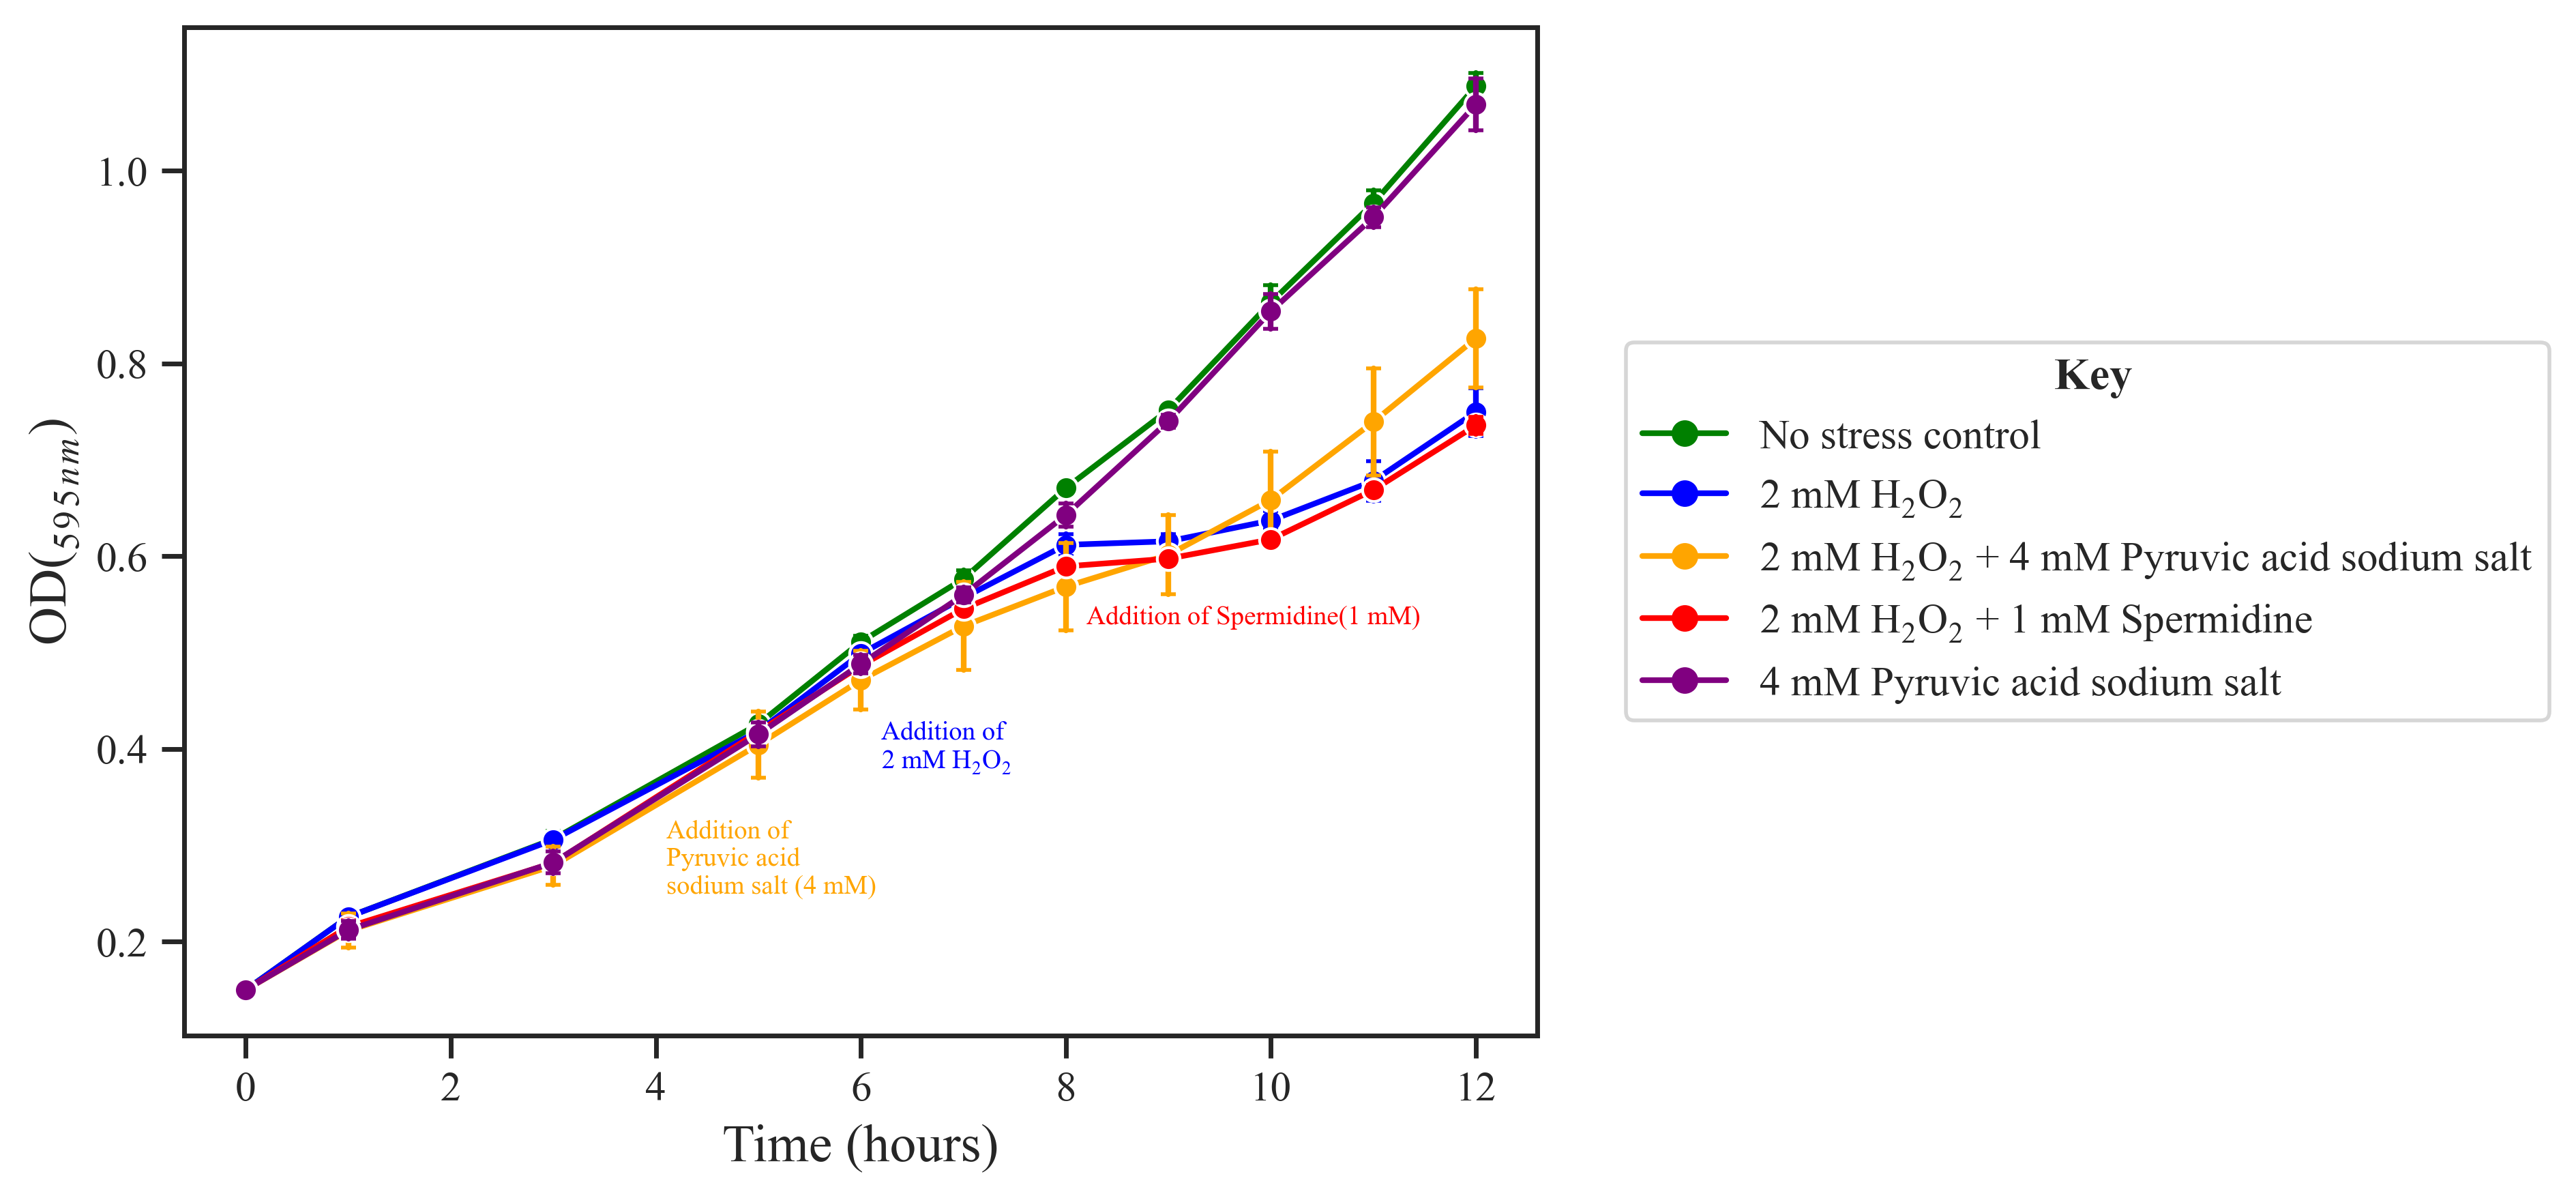

In [447]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text (used for H$_2$O$_2$ and axis subscripts)
# is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

# Create the Seaborn lineplot
fig, ax = plt.subplots()
sns.set()
sns.set_theme(style='white')
sns.set_style('ticks')
palette = ('green', 'blue', 'orange','red', 'purple', 'orange')
sns.lineplot(data=raw_od, errorbar='sd', legend=False, dashes=False, err_style="bars", palette=palette, marker='o',err_kws={'capsize': 2})

custom_labels = {
    # Replace 'Column 1' with your actual DataFrame column name:
    'No stress control': 'No stress control',
    '2mM H2O2':  '2 mM H$_2$O$_2$',
    '2mM H2O2 + 4mM Pyruvic Sodium Acid Salt': '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    '2mM H2O2 + 1mM Spermidine': '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4mM Pyruvic Sodium Acid Salt': '4 mM Pyruvic acid sodium salt',
    'Column 6': 'Custom Sample 6',
    'Column 7': 'Custom Sample 7'
}
# -------------------------------------------------------------

handles = []
labels = []
for column, color in zip(raw_od.columns, palette):
    # Retrieve the custom label. If the key is NOT found in custom_labels,
    # it falls back to the original column name (`column`).
    custom_label = custom_labels.get(column, column) 
    
    # Plot an invisible line just for the legend handle
    handle = ax.plot([], [], color=color, marker='o', label=custom_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(custom_label)

# Add the key to the plot (outside the plot area)
ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

legend = ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontsize='12', fontweight='bold')

# 2. Customize the font for all Legend Entries (labels)
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
    # You can also set text.set_fontsize(10) here if needed
# --- LEGEND FONT CUSTOMIZATION END ---

# Customize plot
plt.xlabel('Time (hours)', size=14)
plt.ylabel(r'OD$(_5$$_9$$_5$$_n$$_m)$', size=14)
# plt.ylim(0, 1.2)
# plt.xlim(0, 250)

font_settings = {'fontname':'Times New Roman'}
# Annotate plot
ax.annotate(text="Addition of" + "\n"+ "2 mM H$_2$O$_2$",xy=(6.2,0.38),xycoords="data",fontsize=7,color="blue",ha="left",**font_settings)
ax.annotate(text="Addition of Spermidine(1 mM)",xy=(8.2,0.53),xycoords="data",fontsize=7,color="red",ha="left",**font_settings)
ax.annotate(text="Addition of" + "\n" + "Pyruvic acid" + "\n" + "sodium salt (4 mM)",xy=(4.1,0.25),xycoords="data",fontsize=7,color="orange",ha="left",**font_settings)



# Save the plot
plt.savefig('growth_curve_OD', dpi=400,bbox_inches='tight')
plt.show()

Import LOG OD dataset

In [449]:
#import data
raw = pd.read_excel (r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\jupyter_notebook_files\growth_curve_analysis\Growth_curve_analysis_data_30_10_2025_plot_data.xlsx", sheet_name='Sheet1')
#Time is set as index - this tells the program that time is x axis
raw.set_index('Time', inplace=True)
#Inspect dataset
raw.head(10)

no stress control  2mM H2O2  2mM H2O2 + 4mM Pyruvic sodium acid salt  \
Time                                                                         
0             -0.823909 -0.823909                                -0.823909   
2             -0.651695 -0.643974                                -0.716699   
3             -0.521434 -0.517126                                -0.591760   
5             -0.368556 -0.381952                                -0.437707   
6             -0.293282 -0.300162                                -0.359519   
7             -0.246417 -0.259637                                -0.323306   
8             -0.173277 -0.222573                                -0.287350   
9             -0.122629 -0.215383                                -0.256490   
10            -0.066007 -0.203426                                -0.221126   
11            -0.016825 -0.183096                                -0.170696   

      2mM H2O2 + 1mM Spermidine  4mM Pyruvic sodium acid salt  
Time                                                           
0                     -0.823909                     -0.823909  
2                     -0.651695                     -0.692504  
3                     -0.551294                     -0.570248  
5                     -0.378824                     -0.395774  
6                     -0.318759                     -0.319664  
7                     -0.263603                     -0.258061  
8                     -0.229148                     -0.201349  
9                     -0.226214                     -0.134304  
10                    -0.211832                     -0.076238  
11                    -0.177832                     -0.022734

Create Seaborn lineplot for LOG OD data for 5 samples

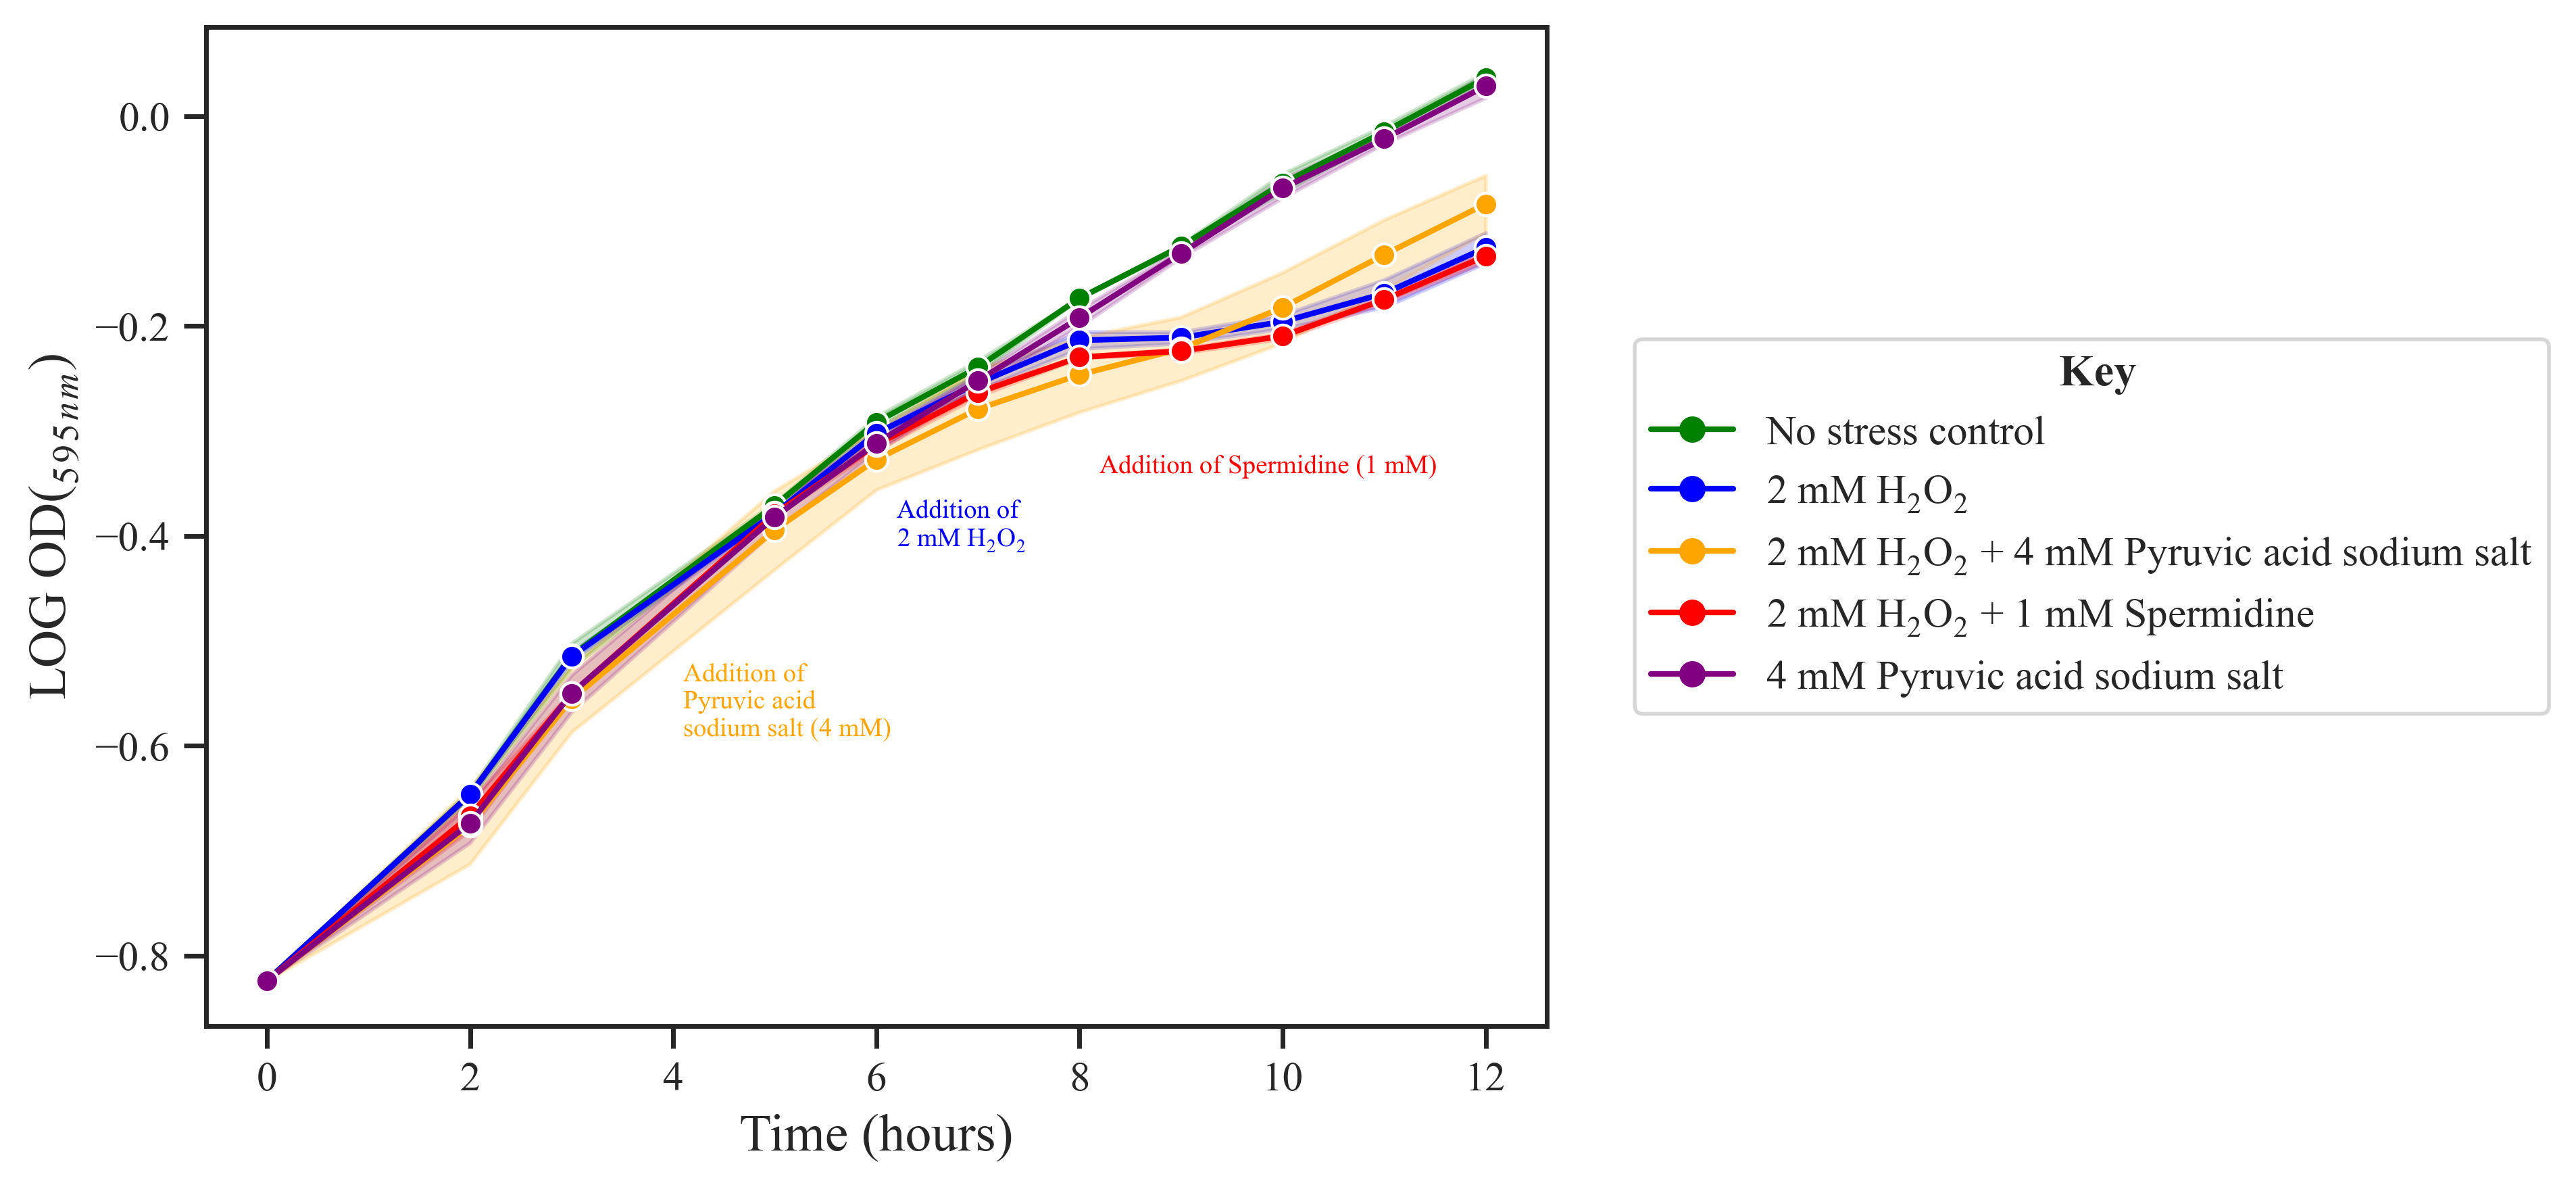

In [451]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text (used for H$_2$O$_2$ and axis subscripts)
# is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

# Create the Seaborn lineplot
fig, ax = plt.subplots()
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")
palette = ('green', 'blue', 'orange','red', 'purple', 'orange')
sns.lineplot(data=raw, errorbar='sd', legend=False, dashes=False, palette=palette, marker='o')

custom_labels = {
    # Replace 'Column 1' with your actual DataFrame column name:
    'No stress control': 'No stress control',
    '2mM H2O2':  '2 mM H$_2$O$_2$',
    '2mM H2O2 + 4mM Pyruvic Sodium Acid Salt': '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    '2mM H2O2 + 1mM Spermidine': '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4mM Pyruvic Sodium Acid Salt': '4 mM Pyruvic acid sodium salt',
    'Column 6': 'Custom Sample 6',
    'Column 7': 'Custom Sample 7'
}
# -------------------------------------------------------------

handles = []
labels = []
for column, color in zip(raw_od.columns, palette):
    # Retrieve the custom label. If the key is NOT found in custom_labels,
    # it falls back to the original column name (`column`).
    custom_label = custom_labels.get(column, column) 
    
    # Plot an invisible line just for the legend handle
    handle = ax.plot([], [], color=color, marker='o', label=custom_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(custom_label)

# Add the key to the plot (outside the plot area)
ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

legend = ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontsize='12', fontweight='bold')

# 2. Customize the font for all Legend Entries (labels)
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
    # You can also set text.set_fontsize(10) here if needed
# --- LEGEND FONT CUSTOMIZATION END ---


# Customize plot
plt.xlabel('Time (hours)', size=14)
plt.ylabel(r'LOG OD$(_5$$_9$$_5$$_n$$_m)$', size=14)
# plt.ylim(0, 1.2)
# plt.xlim(0, 250)

font_settings = {'fontname':'Times New Roman'}
# Annotate plot
ax.annotate(text="Addition of" + "\n"+ "2 mM H$_2$O$_2$",xy=(6.2,-0.41),xycoords="data",fontsize=7,color="blue",ha="left",**font_settings)
ax.annotate(text="Addition of Spermidine (1 mM)",xy=(8.2,-0.34),xycoords="data",fontsize=7,color="red",ha="left",**font_settings)
ax.annotate(text="Addition of" + "\n" + "Pyruvic acid" + "\n" + "sodium salt (4 mM)",xy=(4.1,-0.59),xycoords="data",fontsize=7,color="orange",ha="left",**font_settings)
#vertical line




# Save the plot
plt.savefig('growth_curve_LOGOD1', dpi=400,bbox_inches='tight')
plt.show()

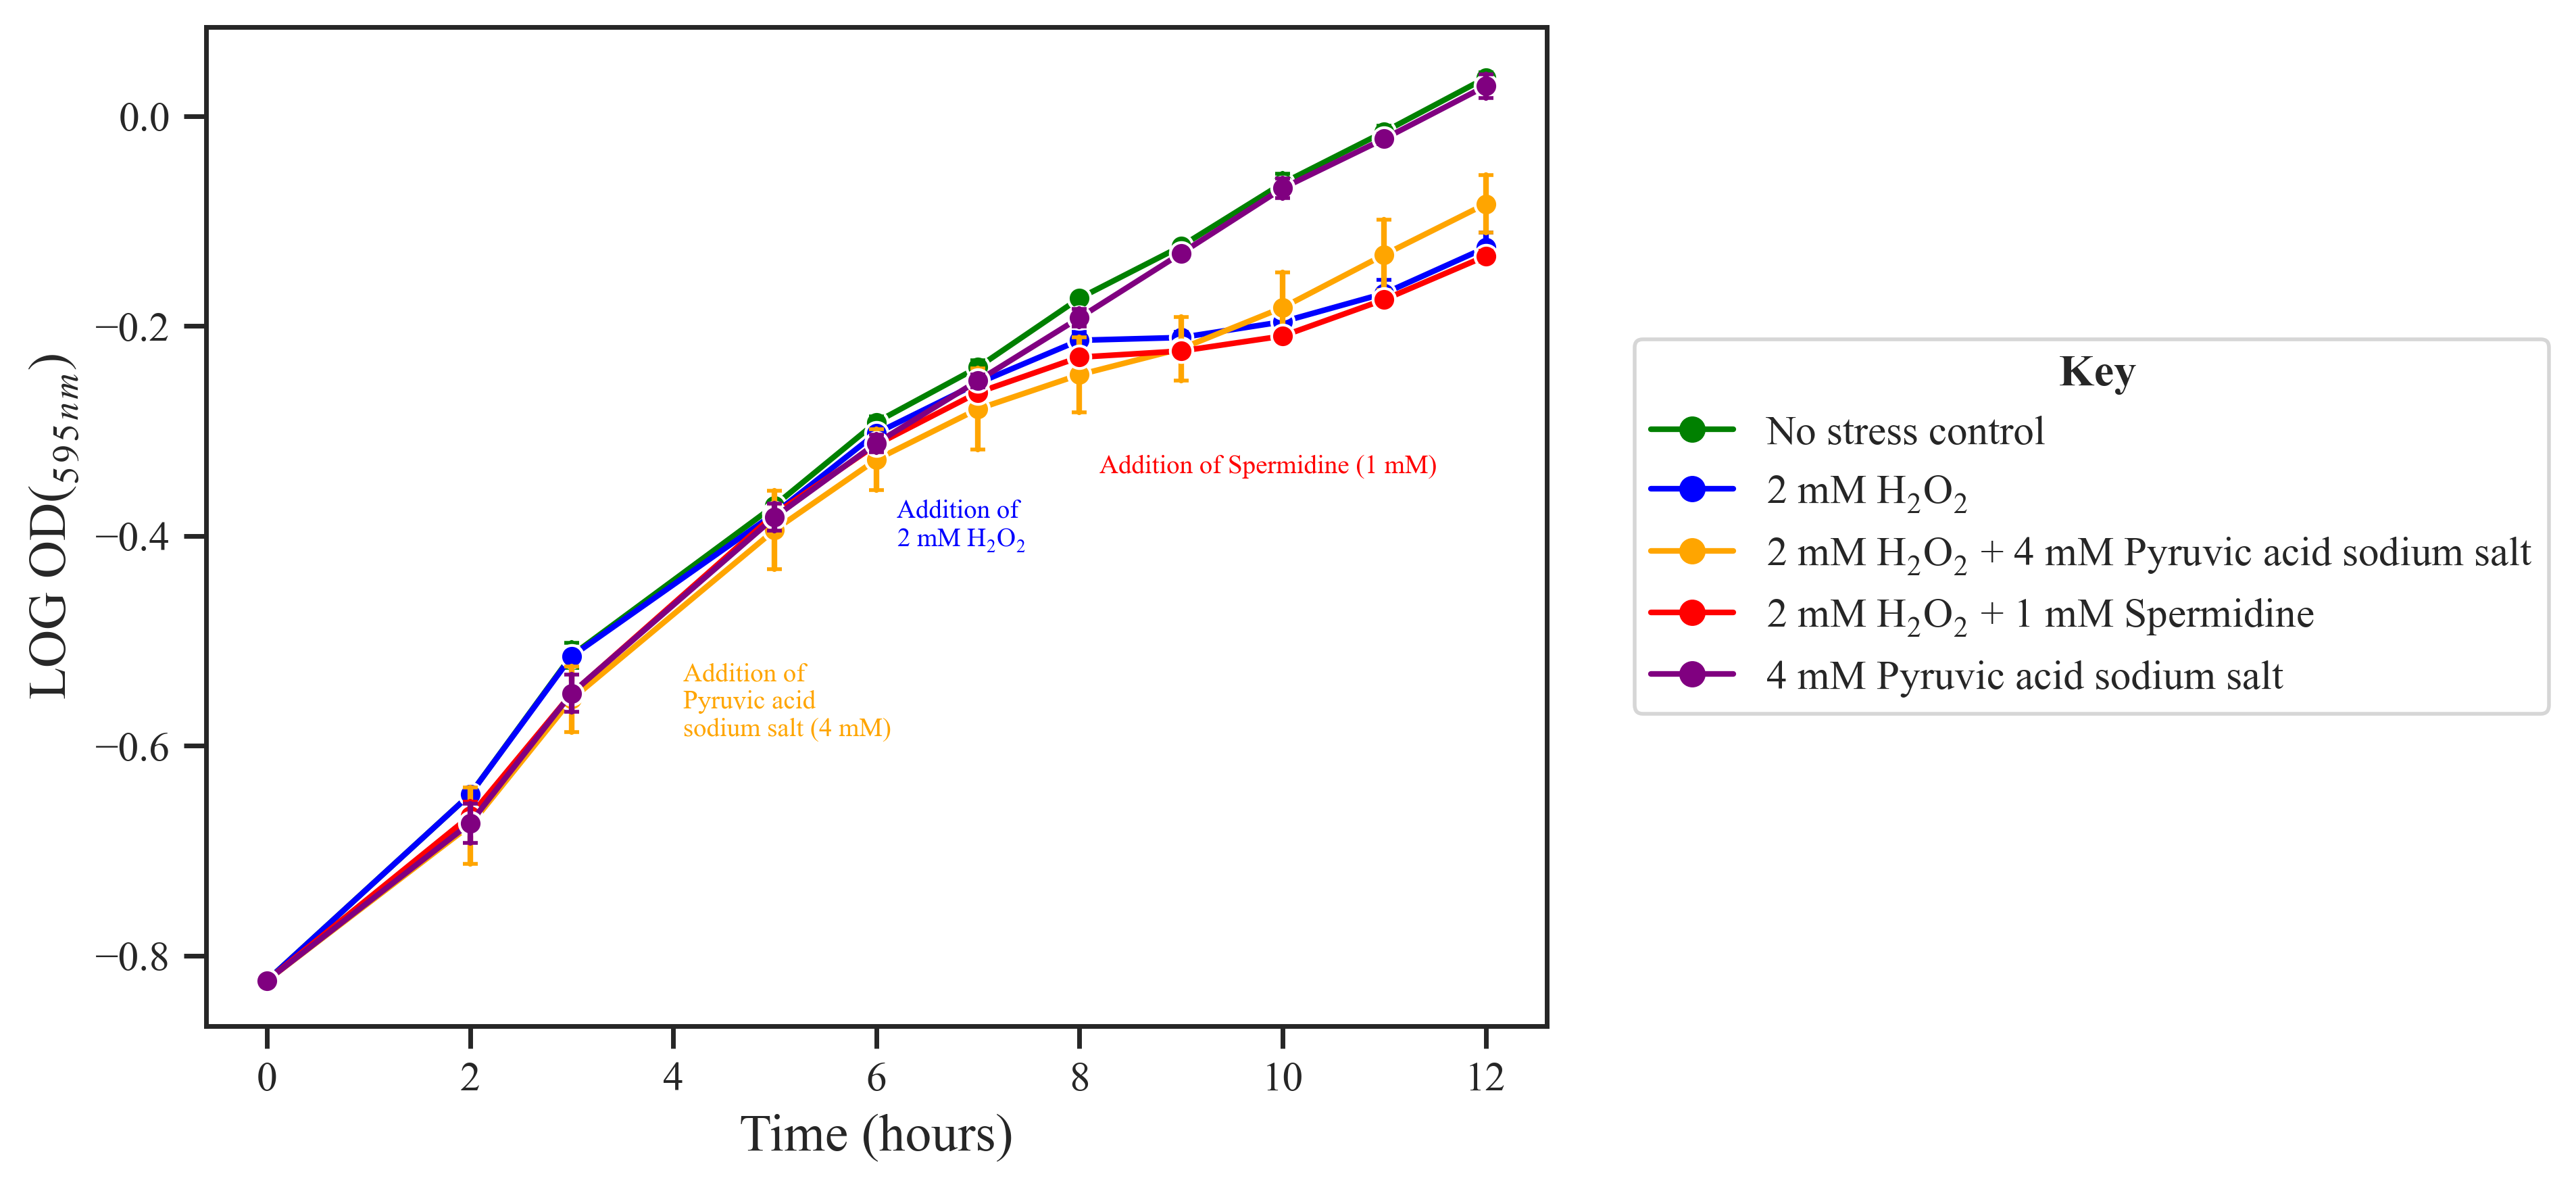

In [452]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text (used for H$_2$O$_2$ and axis subscripts)
# is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

# Create the Seaborn lineplot
fig, ax = plt.subplots()
sns.set()
sns.set_theme(style='white')
sns.set_style('ticks')
palette = ('green', 'blue', 'orange','red', 'purple', 'orange')
sns.lineplot(data=raw, errorbar='sd', legend=False, dashes=False, err_style="bars", palette=palette, marker='o',err_kws={'capsize': 2})

custom_labels = {
    # Replace 'Column 1' with your actual DataFrame column name:
    'No stress control': 'No stress control',
    '2mM H2O2':  '2 mM H$_2$O$_2$',
    '2mM H2O2 + 4mM Pyruvic Sodium Acid Salt': '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    '2mM H2O2 + 1mM Spermidine': '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4mM Pyruvic Sodium Acid Salt': '4 mM Pyruvic acid sodium salt',
    'Column 6': 'Custom Sample 6',
    'Column 7': 'Custom Sample 7'
}
# -------------------------------------------------------------

handles = []
labels = []
for column, color in zip(raw_od.columns, palette):
    # Retrieve the custom label. If the key is NOT found in custom_labels,
    # it falls back to the original column name (`column`).
    custom_label = custom_labels.get(column, column) 
    
    # Plot an invisible line just for the legend handle
    handle = ax.plot([], [], color=color, marker='o', label=custom_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(custom_label)

# Add the key to the plot (outside the plot area)
ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

legend = ax.legend(handles, labels, title=' Key', loc='center left', bbox_to_anchor=(1.05, 0.5))

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontsize='12', fontweight='bold')

# 2. Customize the font for all Legend Entries (labels)
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
    # You can also set text.set_fontsize(10) here if needed
# --- LEGEND FONT CUSTOMIZATION END ---
# Customize plot
plt.xlabel('Time (hours)', size=14)
plt.ylabel(r'LOG OD$(_5$$_9$$_5$$_n$$_m)$', size=14)
# plt.ylim(0, 1.2)
# plt.xlim(0, 250)

font_settings = {'fontname':'Times New Roman'}
# Annotate plot
ax.annotate(text="Addition of" + "\n"+ "2 mM H$_2$O$_2$",xy=(6.2,-0.41),xycoords="data",fontsize=7,color="blue",ha="left",**font_settings)
ax.annotate(text="Addition of Spermidine (1 mM)",xy=(8.2,-0.34),xycoords="data",fontsize=7,color="red",ha="left",**font_settings)
ax.annotate(text="Addition of" + "\n" + "Pyruvic acid" + "\n" + "sodium salt (4 mM)",xy=(4.1,-0.59),xycoords="data",fontsize=7,color="orange",ha="left",**font_settings)


# Save the plot
plt.savefig('growth_curve_LOGOD2', dpi=400,bbox_inches='tight')
plt.show()

Calculating specific growth rate is U= (OD-ODo)/(dt)

In [454]:
clean= pd.read_csv(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\jupyter_notebook_files\Practice\mean_od_summary.csv")

In [455]:
clean.head()

Time Sample        OD  std.deviation
0     0      C -0.823909       0.000000
1     2      C -0.646548       0.004458
2     3      C -0.513913       0.011800
3     5      C -0.370935       0.002569
4     6      C -0.291601       0.005294

In [456]:

#  1. Calculate the Difference and Time Delta 

# Calculate the difference in OD (which is d[ln(OD)]) for consecutive measurements 
# *within each sample group*
clean['d_ln_OD'] = clean.groupby('Sample')['OD'].diff()

# Calculate the difference in Time (dt) for consecutive measurements
clean['dt'] = clean.groupby('Sample')['Time'].diff()

#  2. Calculate Specific Growth Rate (mu) 
# μ = (OD_t2 - OD_t1) / (t_2 - t_1)  <-- Since OD is already ln(OD)
clean['mu'] = clean['d_ln_OD'] / clean['dt']

#  3. Clean Up and Display 
# Drop intermediate columns and the initial rows where mu is NaN
final_growth_rates = clean.drop(columns=['d_ln_OD', 'dt'])

print("--- Specific Growth Rates (μ) ---")
print(final_growth_rates)

--- Specific Growth Rates (μ) ---
    Time Sample        OD  std.deviation        mu
0      0      C -0.823909       0.000000       NaN
1      2      C -0.646548       0.004458  0.088680
2      3      C -0.513913       0.011800  0.132635
3      5      C -0.370935       0.002569  0.071489
4      6      C -0.291601       0.005294  0.079335
5      7      C -0.239359       0.006511  0.052242
6      8      C -0.173493       0.000374  0.065865
7      9      C -0.123977       0.001859  0.049516
8     10      C -0.063883       0.008973  0.060094
9     11      C -0.014899       0.005848  0.048984
10    12      C  0.036472       0.005526  0.051372
11     0      A -0.823909       0.000000       NaN
12     2      A -0.646539       0.002943  0.088685
13     3      A -0.514765       0.004090  0.131774
14     5      A -0.378488       0.003644  0.068139
15     6      A -0.302199       0.003528  0.076289
16     7      A -0.254437       0.006476  0.047762
17     8      A -0.213535       0.008106  0.0409

In [457]:
output_filename2 = 'growth_rates.csv'
final_growth_rates.to_csv(output_filename2, index=False)


In [458]:
growth = pd.read_csv("growth_rates.csv")

Calculate Growth rate for specific intervals

In [460]:
# Define the specific time intervals for calculation
time_intervals = [
    (0, 3), (3, 5), (5, 6), (6, 7), (7, 8),
    (8, 9), (6, 9), (9, 10), (10, 11), (11, 12)
]

# List to hold the results of growth rate calculations
growth_rate_results = []

for t_start, t_end in time_intervals:
    # Filter the DataFrame to get the starting and ending OD for each sample
    
    # Get OD at t_end (OD_t2)
    # Use idxmin() to find the row with the minimum time difference from t_end,
    # ensuring we get the reading closest to or at the end time.
    od_t2 = clean[clean['Time'] <= t_end].groupby('Sample')['Time'].idxmax()
    end_points = clean.loc[od_t2]
    end_points = end_points.rename(columns={'OD': 'OD_t2', 'Time': 'Time_t2'})
    
    # Get OD at t_start (OD_t1)
    # Use idxmin() to find the row with the minimum time difference from t_start.
    od_t1 = clean[clean['Time'] >= t_start].groupby('Sample')['Time'].idxmin()
    start_points = clean.loc[od_t1]
    start_points = start_points.rename(columns={'OD': 'OD_t1', 'Time': 'Time_t1'})

    # Merge the start and end points for calculation
    # Only keep samples that exist in *both* start and end time points
    merged = pd.merge(start_points[['Sample', 'OD_t1', 'Time_t1']],
                      end_points[['Sample', 'OD_t2', 'Time_t2']],
                      on='Sample',
                      how='inner')
    
    # Calculate the average specific growth rate (mu)
    # Check if Time_t2 is greater than Time_t1 to avoid division by zero or negative time
    merged['Time_Delta'] = merged['Time_t2'] - merged['Time_t1']
    merged['OD_Delta'] = merged['OD_t2'] - merged['OD_t1']
    
    # Calculate mu, setting it to NaN if Time_Delta is zero or the interval is invalid
    merged['mu'] = np.where(merged['Time_Delta'] > 0,
                           merged['OD_Delta'] / merged['Time_Delta'],
                           np.nan)

    # Format the results
    result = merged[['Sample', 'mu']].copy()
    result['Interval'] = f'{t_start}-{t_end} hrs'
    
    growth_rate_results.append(result)

# Combine all interval results into a single DataFrame
final_rates_df = pd.concat(growth_rate_results, ignore_index=True)

# Pivot the table to have Samples as rows and Intervals as columns (optional but common for presentation)
final_rates_pivot = final_rates_df.pivot(index='Sample', columns='Interval', values='mu')

# Export to CSV 
output_filename = 'interval_growth_rates.csv'
final_rates_pivot.to_csv(output_filename)


# Display the resulting table
print("\n--- Final Interval Growth Rate Table (μ) ---")
print(final_rates_pivot)


--- Final Interval Growth Rate Table (μ) ---
Interval   0-3 hrs  10-11 hrs  11-12 hrs   3-5 hrs   5-6 hrs   6-7 hrs  \
Sample                                                                   
A         0.103048   0.026993   0.043609  0.068139  0.076289  0.047762   
B         0.089417   0.050399   0.048421  0.080664  0.067031  0.048259   
C         0.103332   0.048984   0.051372  0.071489  0.079335  0.052242   
D         0.091214   0.034686   0.041460  0.085547  0.066086  0.049738   
E         0.091306   0.047074   0.050281  0.083957  0.070441  0.059535   

Interval   6-9 hrs   7-8 hrs   8-9 hrs  9-10 hrs  
Sample                                            
A         0.030429  0.040902  0.002623  0.015019  
B         0.035240  0.032681  0.024779  0.039169  
C         0.055874  0.065865  0.049516  0.060094  
D         0.029766  0.033708  0.005853  0.014302  
E         0.060285  0.060034  0.061286  0.062173  


In [461]:
pd.read_csv("interval_growth_rates.csv")

Sample   0-3 hrs  10-11 hrs  11-12 hrs   3-5 hrs   5-6 hrs   6-7 hrs  \
0      A  0.103048   0.026993   0.043609  0.068139  0.076289  0.047762   
1      B  0.089417   0.050399   0.048421  0.080664  0.067031  0.048259   
2      C  0.103332   0.048984   0.051372  0.071489  0.079335  0.052242   
3      D  0.091214   0.034686   0.041460  0.085547  0.066086  0.049738   
4      E  0.091306   0.047074   0.050281  0.083957  0.070441  0.059535   

    6-9 hrs   7-8 hrs   8-9 hrs  9-10 hrs  
0  0.030429  0.040902  0.002623  0.015019  
1  0.035240  0.032681  0.024779  0.039169  
2  0.055874  0.065865  0.049516  0.060094  
3  0.029766  0.033708  0.005853  0.014302  
4  0.060285  0.060034  0.061286  0.062173

Calculate growth rates for Triplicate data from raw LOG OD

In [463]:

clean_new = pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\220013700_GROWTH_CURVE_DATA_30_10_2025.xlsx", sheet_name = "Sheet2")

# Rename 'Sample' to 'Replicate_ID' for clear grouping
clean_new = clean_new.rename(columns={'Sample': 'Replicate_ID'})

# --- 2. Data Cleaning and Type Conversion ---
# Convert 'Time' and 'OD' columns to numeric.
clean_new['Time'] = pd.to_numeric(clean_new['Time'], errors='coerce')
clean_new['OD'] = pd.to_numeric(clean_new['OD'], errors='coerce')

# Drop any rows where the conversion failed
clean_new = clean_new.dropna(subset=['Time', 'OD'])


# --- 3. Define Intervals and Calculate Growth Rates (Wide Format) ---
time_intervals = [
    (0, 2), (2, 3),(3,5), (5, 6), (6, 7), (7, 8),
    (8, 9), (9, 10), (10, 11), (11, 12)
]

growth_rate_results = []

for t_start, t_end in time_intervals:
    
    # Get OD at t_end (OD_t2): Latest reading <= t_end
    od_t2_index = clean_new[clean_new['Time'] <= t_end].groupby('Replicate_ID')['Time'].idxmax()
    end_points = clean_new.loc[od_t2_index].rename(columns={'OD': 'OD_t2', 'Time': 'Time_t2'})
    
    # Get OD at t_start (OD_t1): Earliest reading >= t_start
    od_t1_index = clean_new[clean_new['Time'] >= t_start].groupby('Replicate_ID')['Time'].idxmin()
    start_points = clean_new.loc[od_t1_index].rename(columns={'OD': 'OD_t1', 'Time': 'Time_t1'})

    # Merge points
    merged = pd.merge(start_points[['Replicate_ID', 'OD_t1', 'Time_t1']],
                      end_points[['Replicate_ID', 'OD_t2', 'Time_t2']],
                      on='Replicate_ID', how='inner')
    
    # Calculate mu
    merged['Time_Delta'] = merged['Time_t2'] - merged['Time_t1']
    merged['OD_Delta'] = merged['OD_t2'] - merged['OD_t1']
    
    merged['mu'] = np.where(merged['Time_Delta'] > 0,
                            merged['OD_Delta'] / merged['Time_Delta'],
                            np.nan)

    # Format and store results
    result = merged[['Replicate_ID', 'mu']].copy()
    result['Interval'] = f'{t_start}-{t_end} hrs'
    growth_rate_results.append(result)

# Combine results into a single Wide DataFrame
final_rates_df = pd.concat(growth_rate_results, ignore_index=True)
final_rates_pivot = final_rates_df.pivot(index='Replicate_ID', columns='Interval', values='mu')

# Sort columns
sorted_intervals = [f'{t_start}-{t_end} hrs' for t_start, t_end in time_intervals]
final_rates_pivot = final_rates_pivot[sorted_intervals]

# --- 4. Convert to Long Format for Seaborn ---
final_rates_long = final_rates_pivot.reset_index().melt(
    id_vars=['Replicate_ID'],      # Column to keep as identifier
    var_name='Time_Interval',      # New column name for the old column headers
    value_name='Growth_Rate'       # New column name for the values
)


# --- 5. Export and Display ---

# Export Wide Format
output_wide_filename = 'replicate_growth_rates_wide.csv'
final_rates_pivot.to_csv(output_wide_filename)

# Export Long Format
output_long_filename = 'replicate_growth_rates_long_seaborn.csv'
final_rates_long.to_csv(output_long_filename, index=False)

print("\n--- Head of the Long Format DataFrame (Seaborn Ready) ---")
print(final_rates_long.head(10))


--- Head of the Long Format DataFrame (Seaborn Ready) ---
  Replicate_ID Time_Interval  Growth_Rate
0           A1       0-2 hrs     0.089967
1           A2       0-2 hrs     0.089009
2           A3       0-2 hrs     0.087078
3           B1       0-2 hrs     0.053605
4           B2       0-2 hrs     0.089009
5           B3       0-2 hrs     0.079181
6           C1       0-2 hrs     0.086107
7           C2       0-2 hrs     0.089967
8           C3       0-2 hrs     0.089967
9           D1       0-2 hrs     0.086107


In [464]:

# --- 1. Load the long-format CSV file ---
file_name = 'replicate_growth_rates_long_seaborn.csv'
df_long = pd.read_csv(file_name)

# --- 2. Apply Modifications ---

# 1. Create the new 'Sample' column by extracting the first character of 'Replicate_ID'
# This converts A1, A2, C1, etc. to A, A, C, etc.
df_long['Sample'] = df_long['Replicate_ID'].str[0]

# 2. Drop the original 'Replicate_ID' column
df_final = df_long.drop(columns=['Replicate_ID'])

# 3. Reorder columns to put 'Sample' first
df_final = df_final[['Sample', 'Time_Interval', 'Growth_Rate']]

# --- 3. Save the modified DataFrame ---
output_filename = 'group_growth_rates_final.csv'
df_final.to_csv(output_filename, index=False)

print(f"File successfully modified and saved to {output_filename}")
print("\nFinal Grouped DataFrame Head:")
print(df_final.head(10))

File successfully modified and saved to group_growth_rates_final.csv

Final Grouped DataFrame Head:
  Sample Time_Interval  Growth_Rate
0      A       0-2 hrs     0.089967
1      A       0-2 hrs     0.089009
2      A       0-2 hrs     0.087078
3      B       0-2 hrs     0.053605
4      B       0-2 hrs     0.089009
5      B       0-2 hrs     0.079181
6      C       0-2 hrs     0.086107
7      C       0-2 hrs     0.089967
8      C       0-2 hrs     0.089967
9      D       0-2 hrs     0.086107


In [465]:
df_final.to_csv("growth_rate_triplicates",index=False)

In [466]:
growth_rate_triplicates = pd.read_csv("growth_rate_triplicates")
growth_rate_triplicates.head()

Sample Time_Interval  Growth_Rate
0      A       0-2 hrs     0.089967
1      A       0-2 hrs     0.089009
2      A       0-2 hrs     0.087078
3      B       0-2 hrs     0.053605
4      B       0-2 hrs     0.089009

Plotting a boxplot to visualise growth rate data distribution

<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\3859752533.py:41: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Growth Rate ($\mu$) ', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')


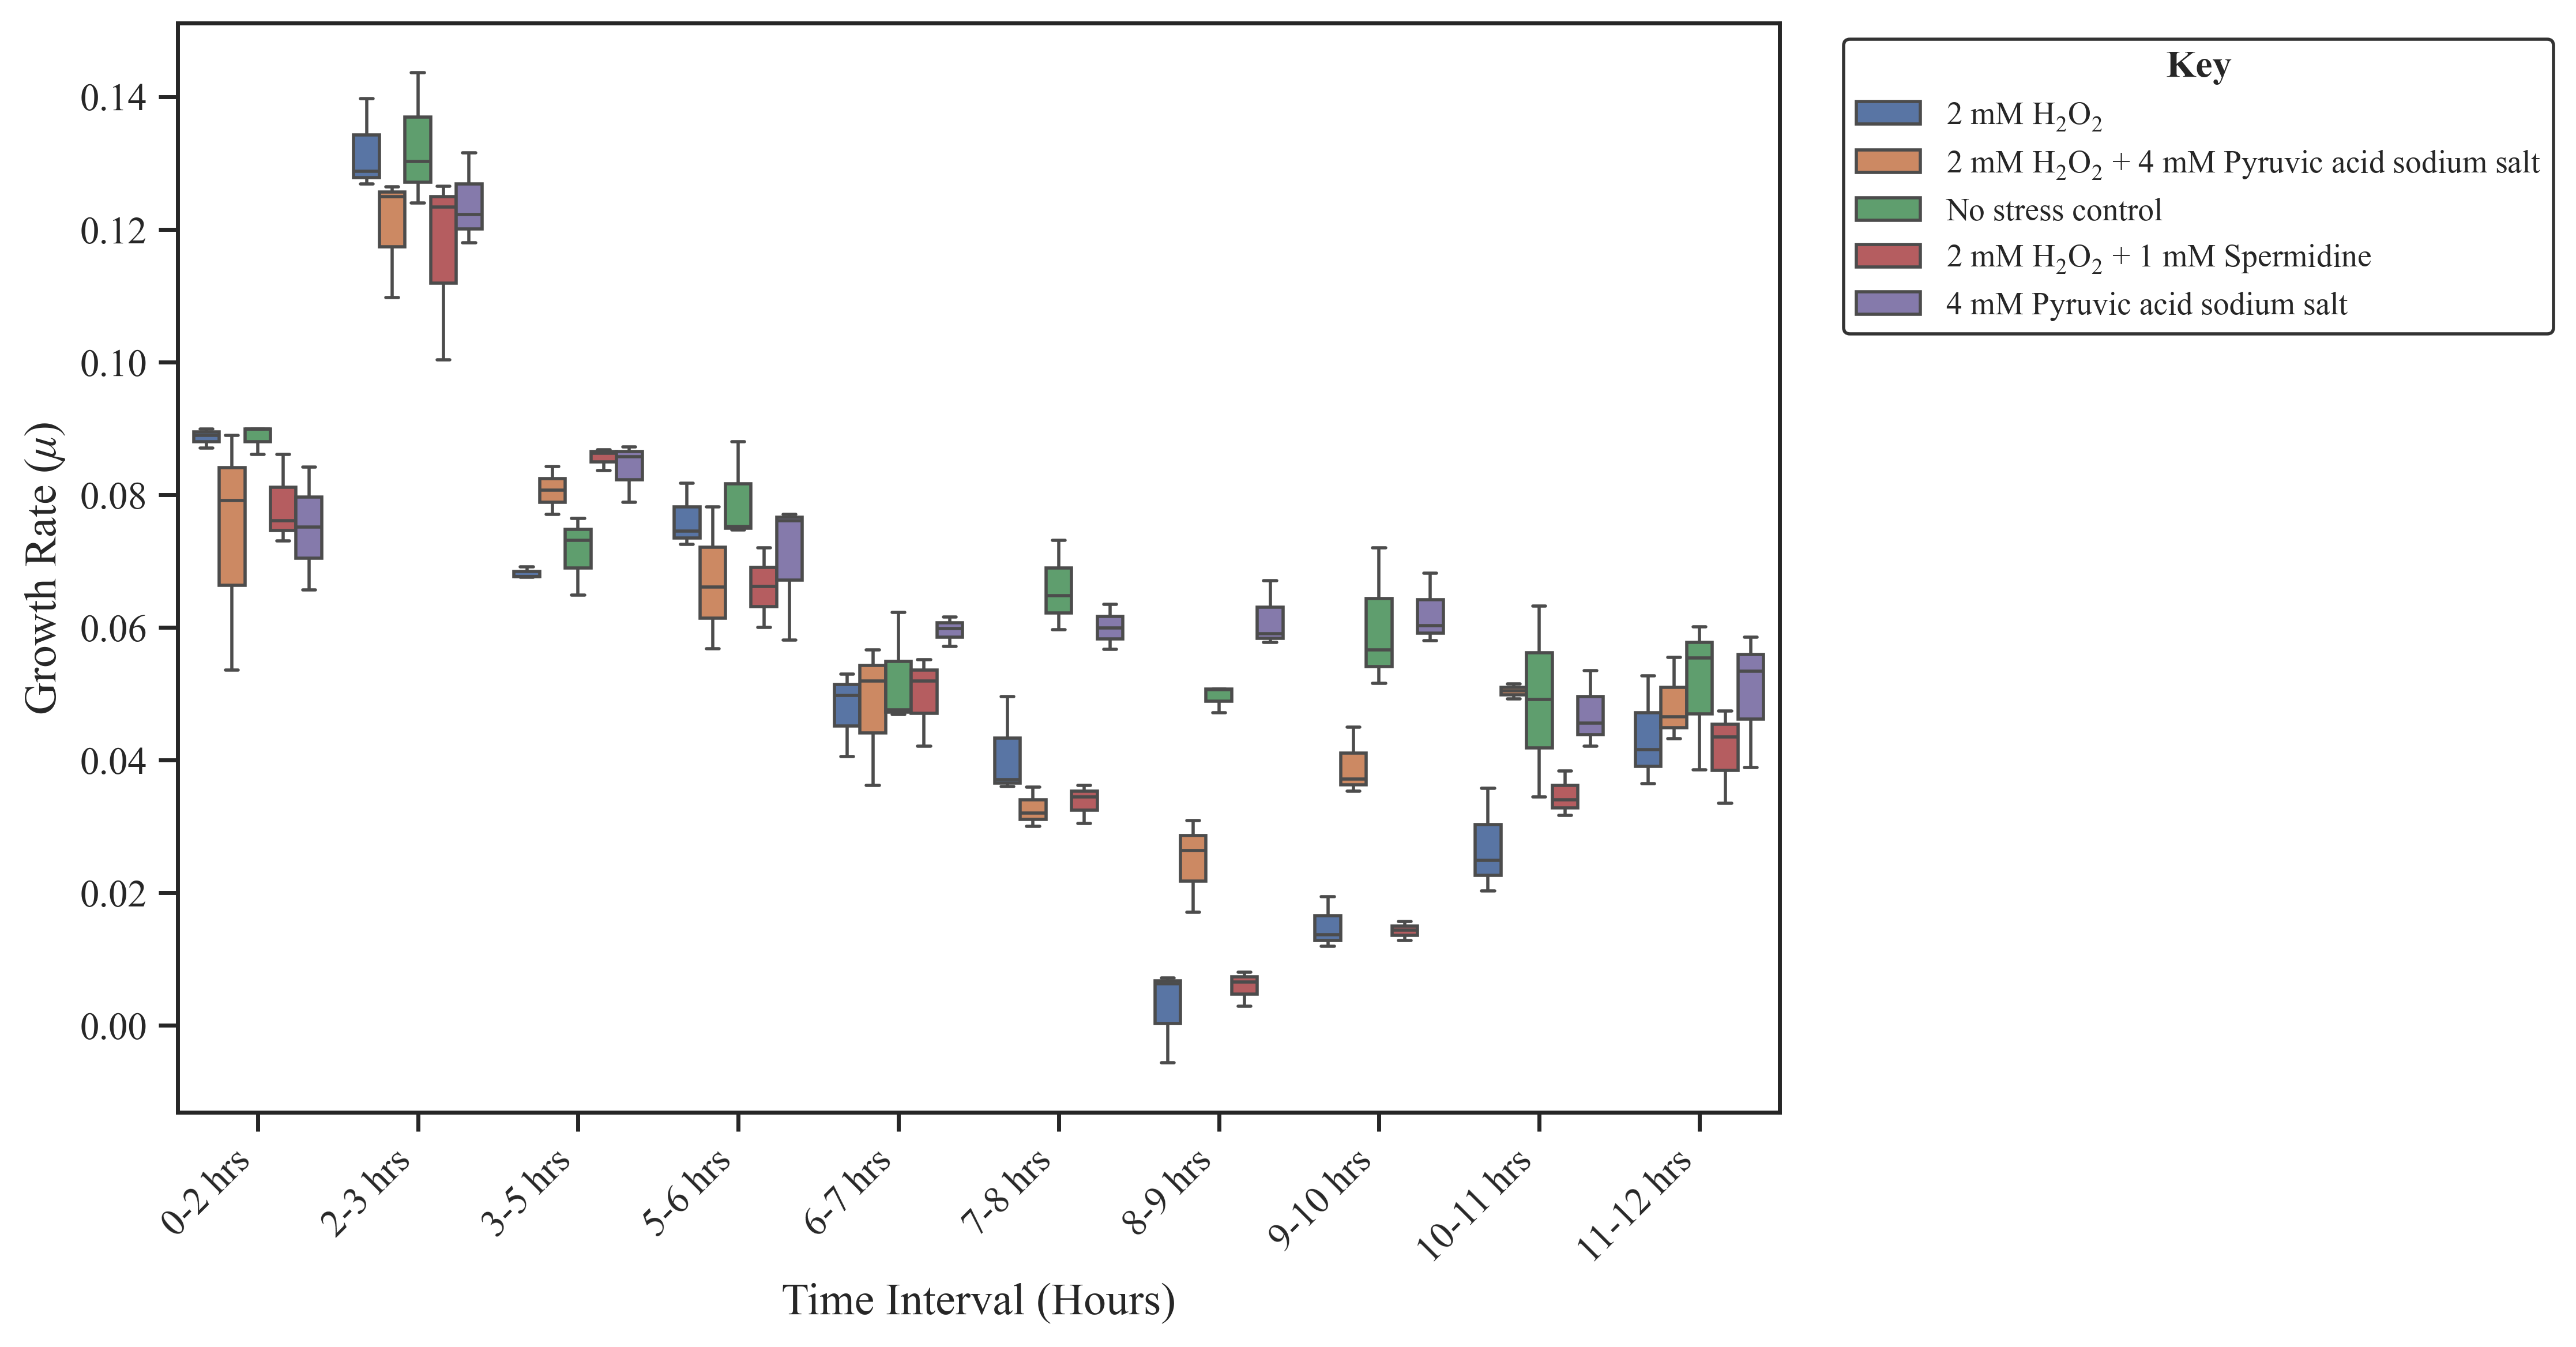

In [468]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# 1. Set a larger figure size to give labels more room (12x6)
plt.figure(figsize=(12, 6))

# Create the plot and get the axes object
ax = sns.boxplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    orient="v",
    hue="Sample")

# --- AXES MODIFICATIONS TO PREVENT OVERLAP ---

# 2. Rotate the X-axis tick labels
ROTATION_ANGLE = 45 # Rotate by 45 degrees
plt.xticks(rotation=ROTATION_ANGLE, ha='right') # ha='right' aligns the rotated label correctly

# 3. Ensure the font sizes are set (as in the previous step)
AXES_LABEL_FONTSIZE = 14
TICK_LABEL_FONTSIZE = 12

ax.set_xlabel('Time Interval (Hours)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.set_ylabel('Growth Rate ($\mu$) ', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE) # Only needed if different from default

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

# --- LEGEND MODIFICATIONS (Your original code) ---
handles, labels = ax.get_legend_handles_labels()


new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'
]

legend = ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)


# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---

# 4. Use tight_layout with padding to finalise the fit
# The rect parameter reserves space for the legend on the right.
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('Growth_rate_boxplot_intervals', dpi=400,bbox_inches='tight')
plt.show()


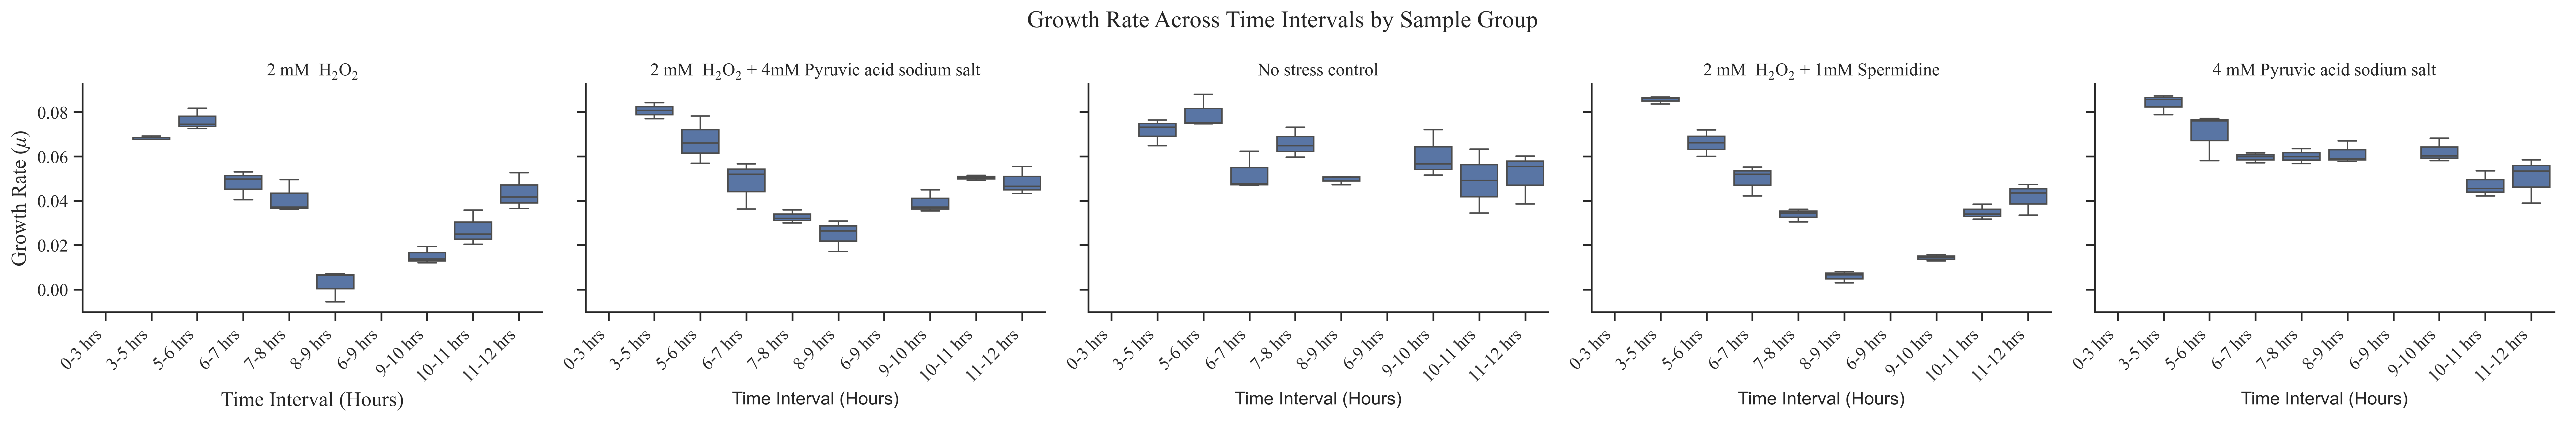

In [582]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")
# Use catplot with kind='box' and 'col' to facet by 'Sample'
time_order = ["0-3 hrs", "3-5 hrs", "5-6 hrs", "6-7 hrs", "7-8 hrs", "8-9 hrs","6-9 hrs", "9-10 hrs", "10-11 hrs", "11-12 hrs"]
sample_renaming_map = { 'A': '2 mM  H$_2$O$_2$',
                       'B': '2 mM  H$_2$O$_2$ + 4mM Pyruvic acid sodium salt',
                       'C': 'No stress control',
                       'D': '2 mM  H$_2$O$_2$ + 1mM Spermidine',
                       'E': '4 mM Pyruvic acid sodium salt'}
g = sns.catplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    kind="box",
    col="Sample", # This splits the plot into columns, one for each unique 'Sample'
    col_wrap=5,  # Arranges the 5 plots side-by-side
    height=4,
    aspect=1.2,
    order=time_order 
)

for ax in g.axes.flat:
    original_title = ax.get_title()
    try:
        sample_key = original_title.split("=")[1].strip()
    except:
        sample_key = original_title
    new_label = sample_renaming_map.get(sample_key, original_title)
    ax.set_title(new_label, fontsize=12,fontfamily='Times New Roman')
   


    
# Rotate x-axis labels and set clear titles/labels
g.set_xticklabels(rotation=45, ha="right",fontfamily='Times New Roman')


# FIX APPLIED: Use a raw string (r"...") to prevent Python from interpreting '\m' in '\mu' as an escape sequence
g.set_axis_labels("Time Interval (Hours)", r"Growth Rate ($\mu$)") 
g.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
g.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Growth Rate Across Time Intervals by Sample Group", fontsize=16,fontfamily='Times New Roman')
g.fig.axes[0].set_ylabel(r'Growth Rate ($\mu$)', fontname='Times New Roman', size=14)

# Apply font to the main X-axis label
g.fig.axes[0].set_xlabel('Time Interval (Hours)', fontname='Times New Roman', size=14)
plt.tight_layout()
plt.savefig('Growth_rate_catplot_intervals', dpi=400,bbox_inches='tight')
plt.show()


Visulise data via bargraph

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\102907283.py:77: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')


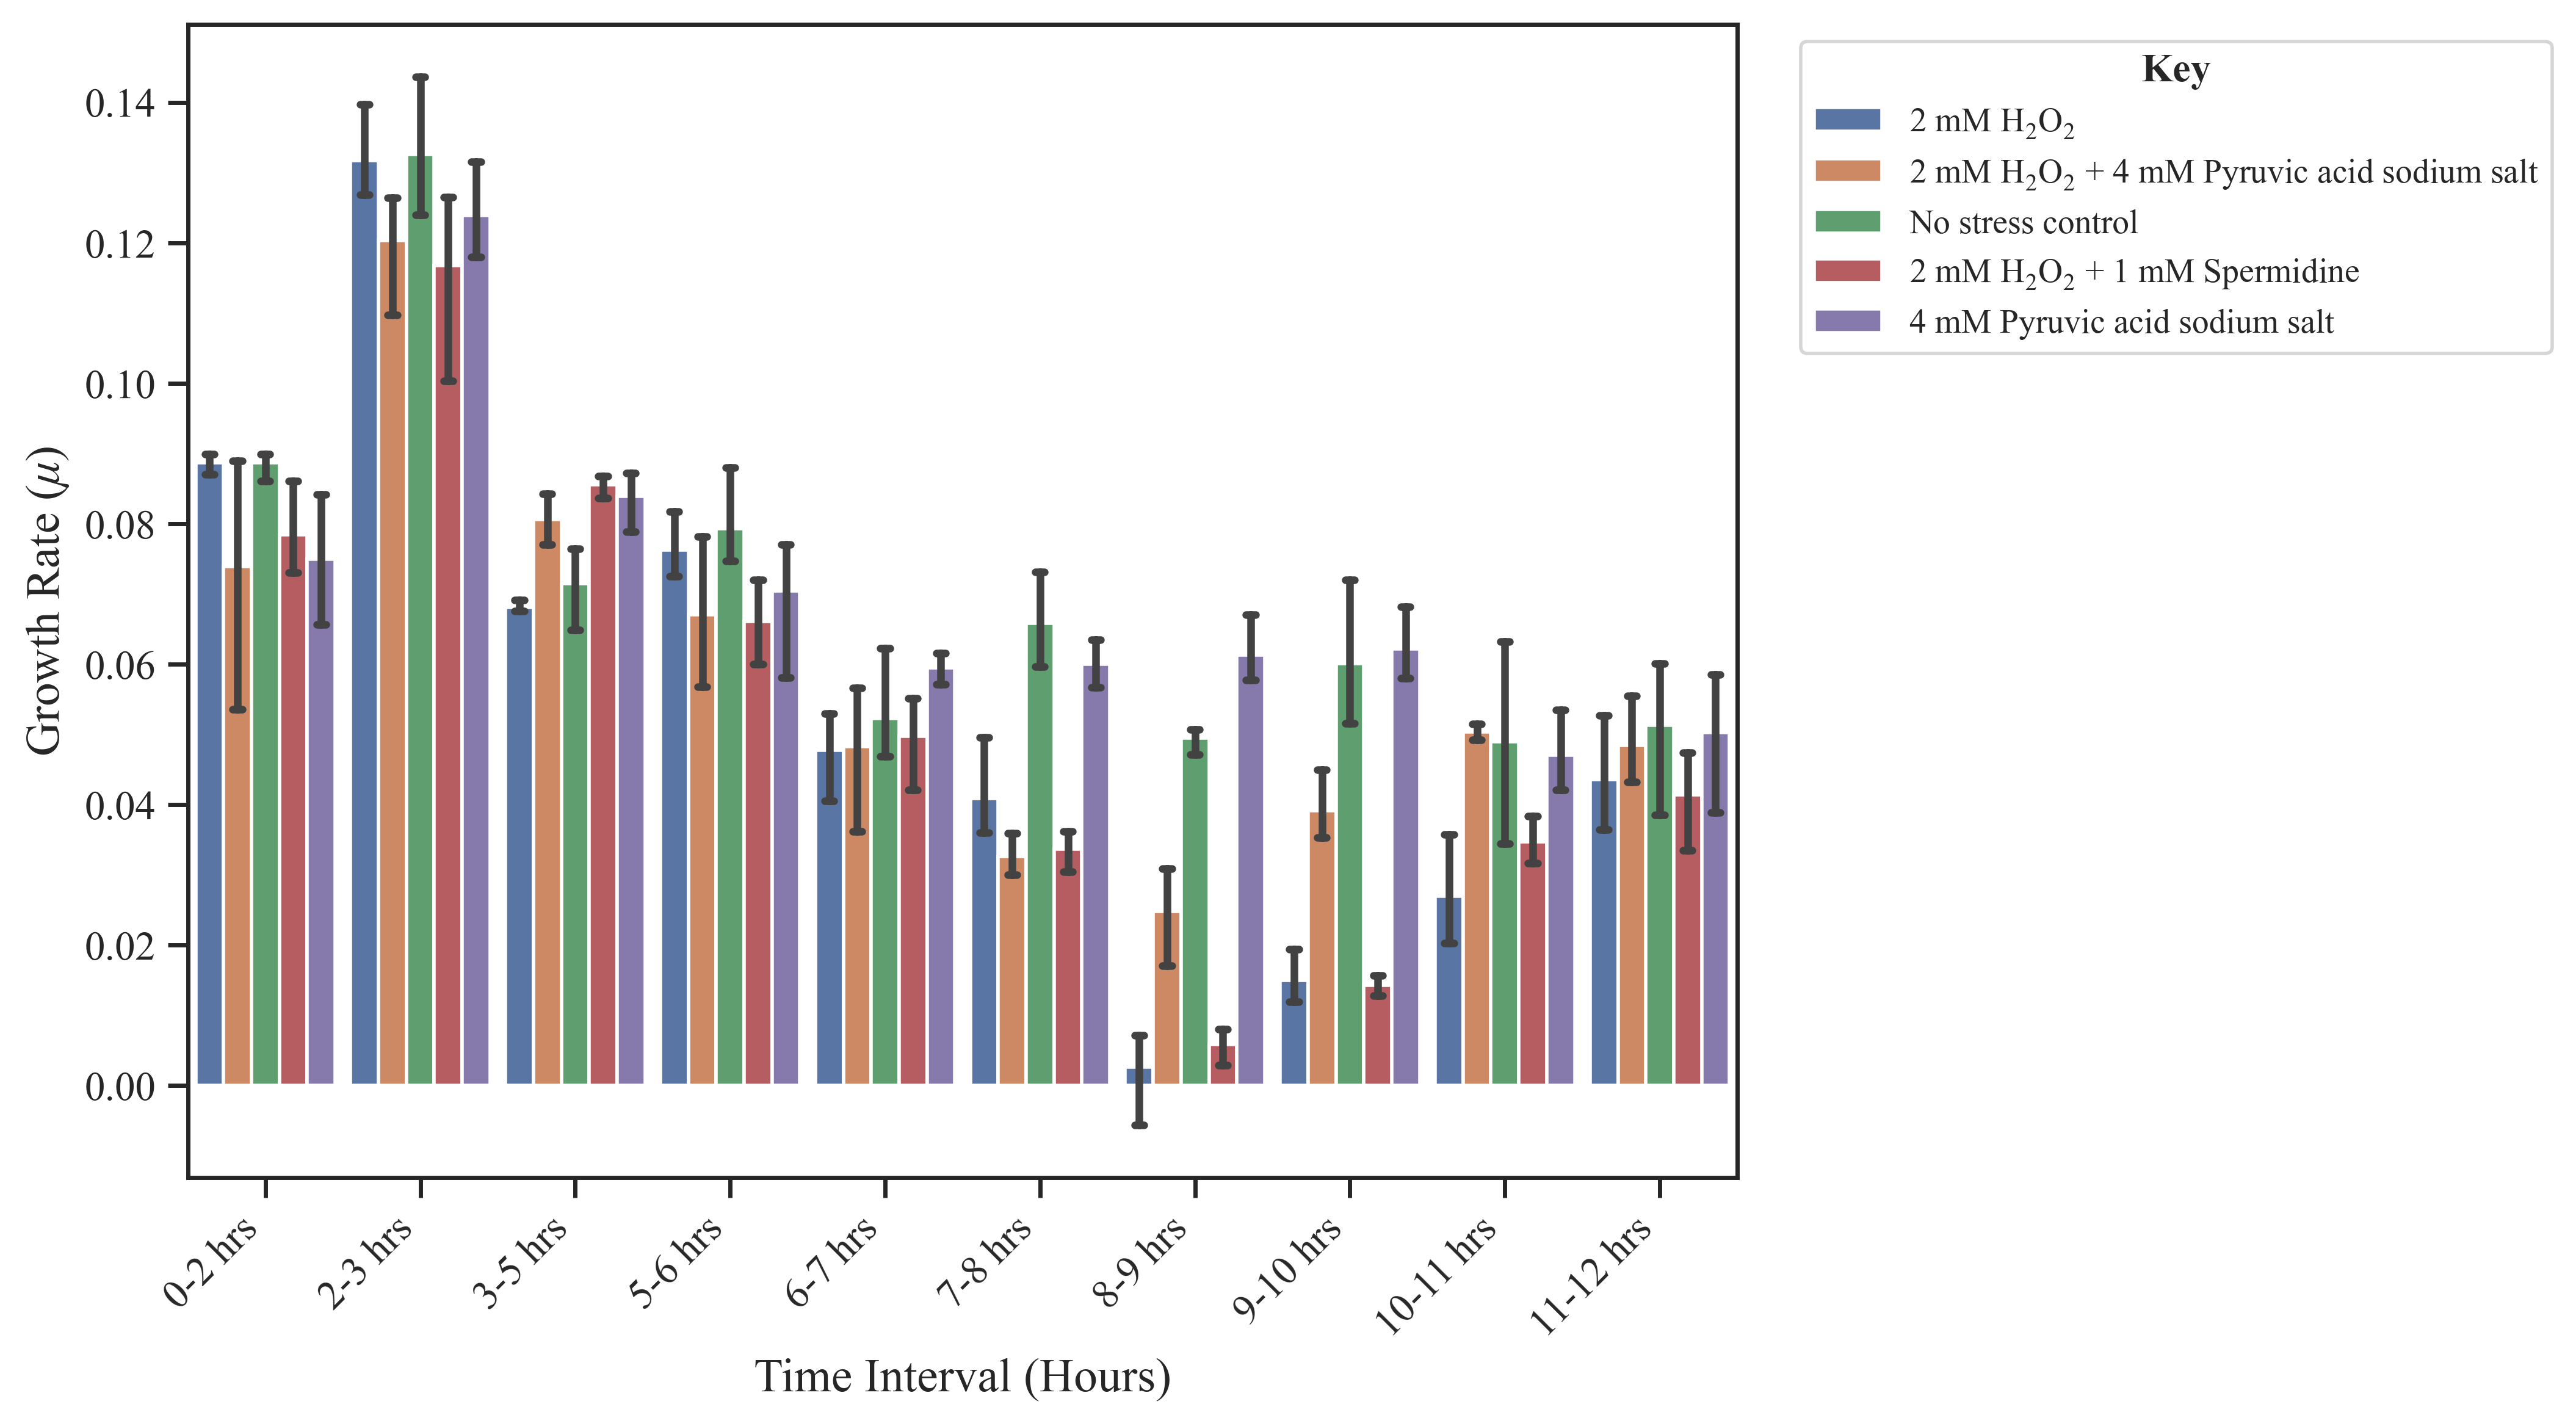

In [471]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# Increased width slightly to accommodate the rotated labels and legend.
plt.figure(figsize=(12, 6))

# Create the plot and get the axes object
ax = sns.barplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Sample",
    capsize=0.3,
    width=0.9
)

# --- 2. LEGEND MODIFICATIONS ---
handles, labels = ax.get_legend_handles_labels()

# Note: Ensure the order of 'new_labels' matches the order of 'labels' (A, B, C, D, E)
# The order from ax.get_legend_handles_labels() is usually alphabetical by the hue key.
# Adjusting your new_labels list to match standard alphabetical order (A, B, C, D, E) for safety:
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'            
]

legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True
)

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
# AXES LABEL AND TICK MODIFICATIONS (Anti-Overlap Fix)
ROTATION_ANGLE = 45
AXES_LABEL_FONTSIZE = 14
TICK_LABEL_FONTSIZE = 12

# Fix for overlapping X labels
plt.xticks(rotation=ROTATION_ANGLE, ha='right', fontsize=TICK_LABEL_FONTSIZE,fontfamily='Times New Roman')

# Set axis labels and Y tick size
ax.set_xlabel('Time Interval (Hours)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE)

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

# Ensures everything fits, reserving space for the legend on the right
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.savefig('Growth_rate_bargraph_intervals', dpi=400,bbox_inches='tight')
plt.show()

Visulise data via Linegraph

<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\3510429328.py:80: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')


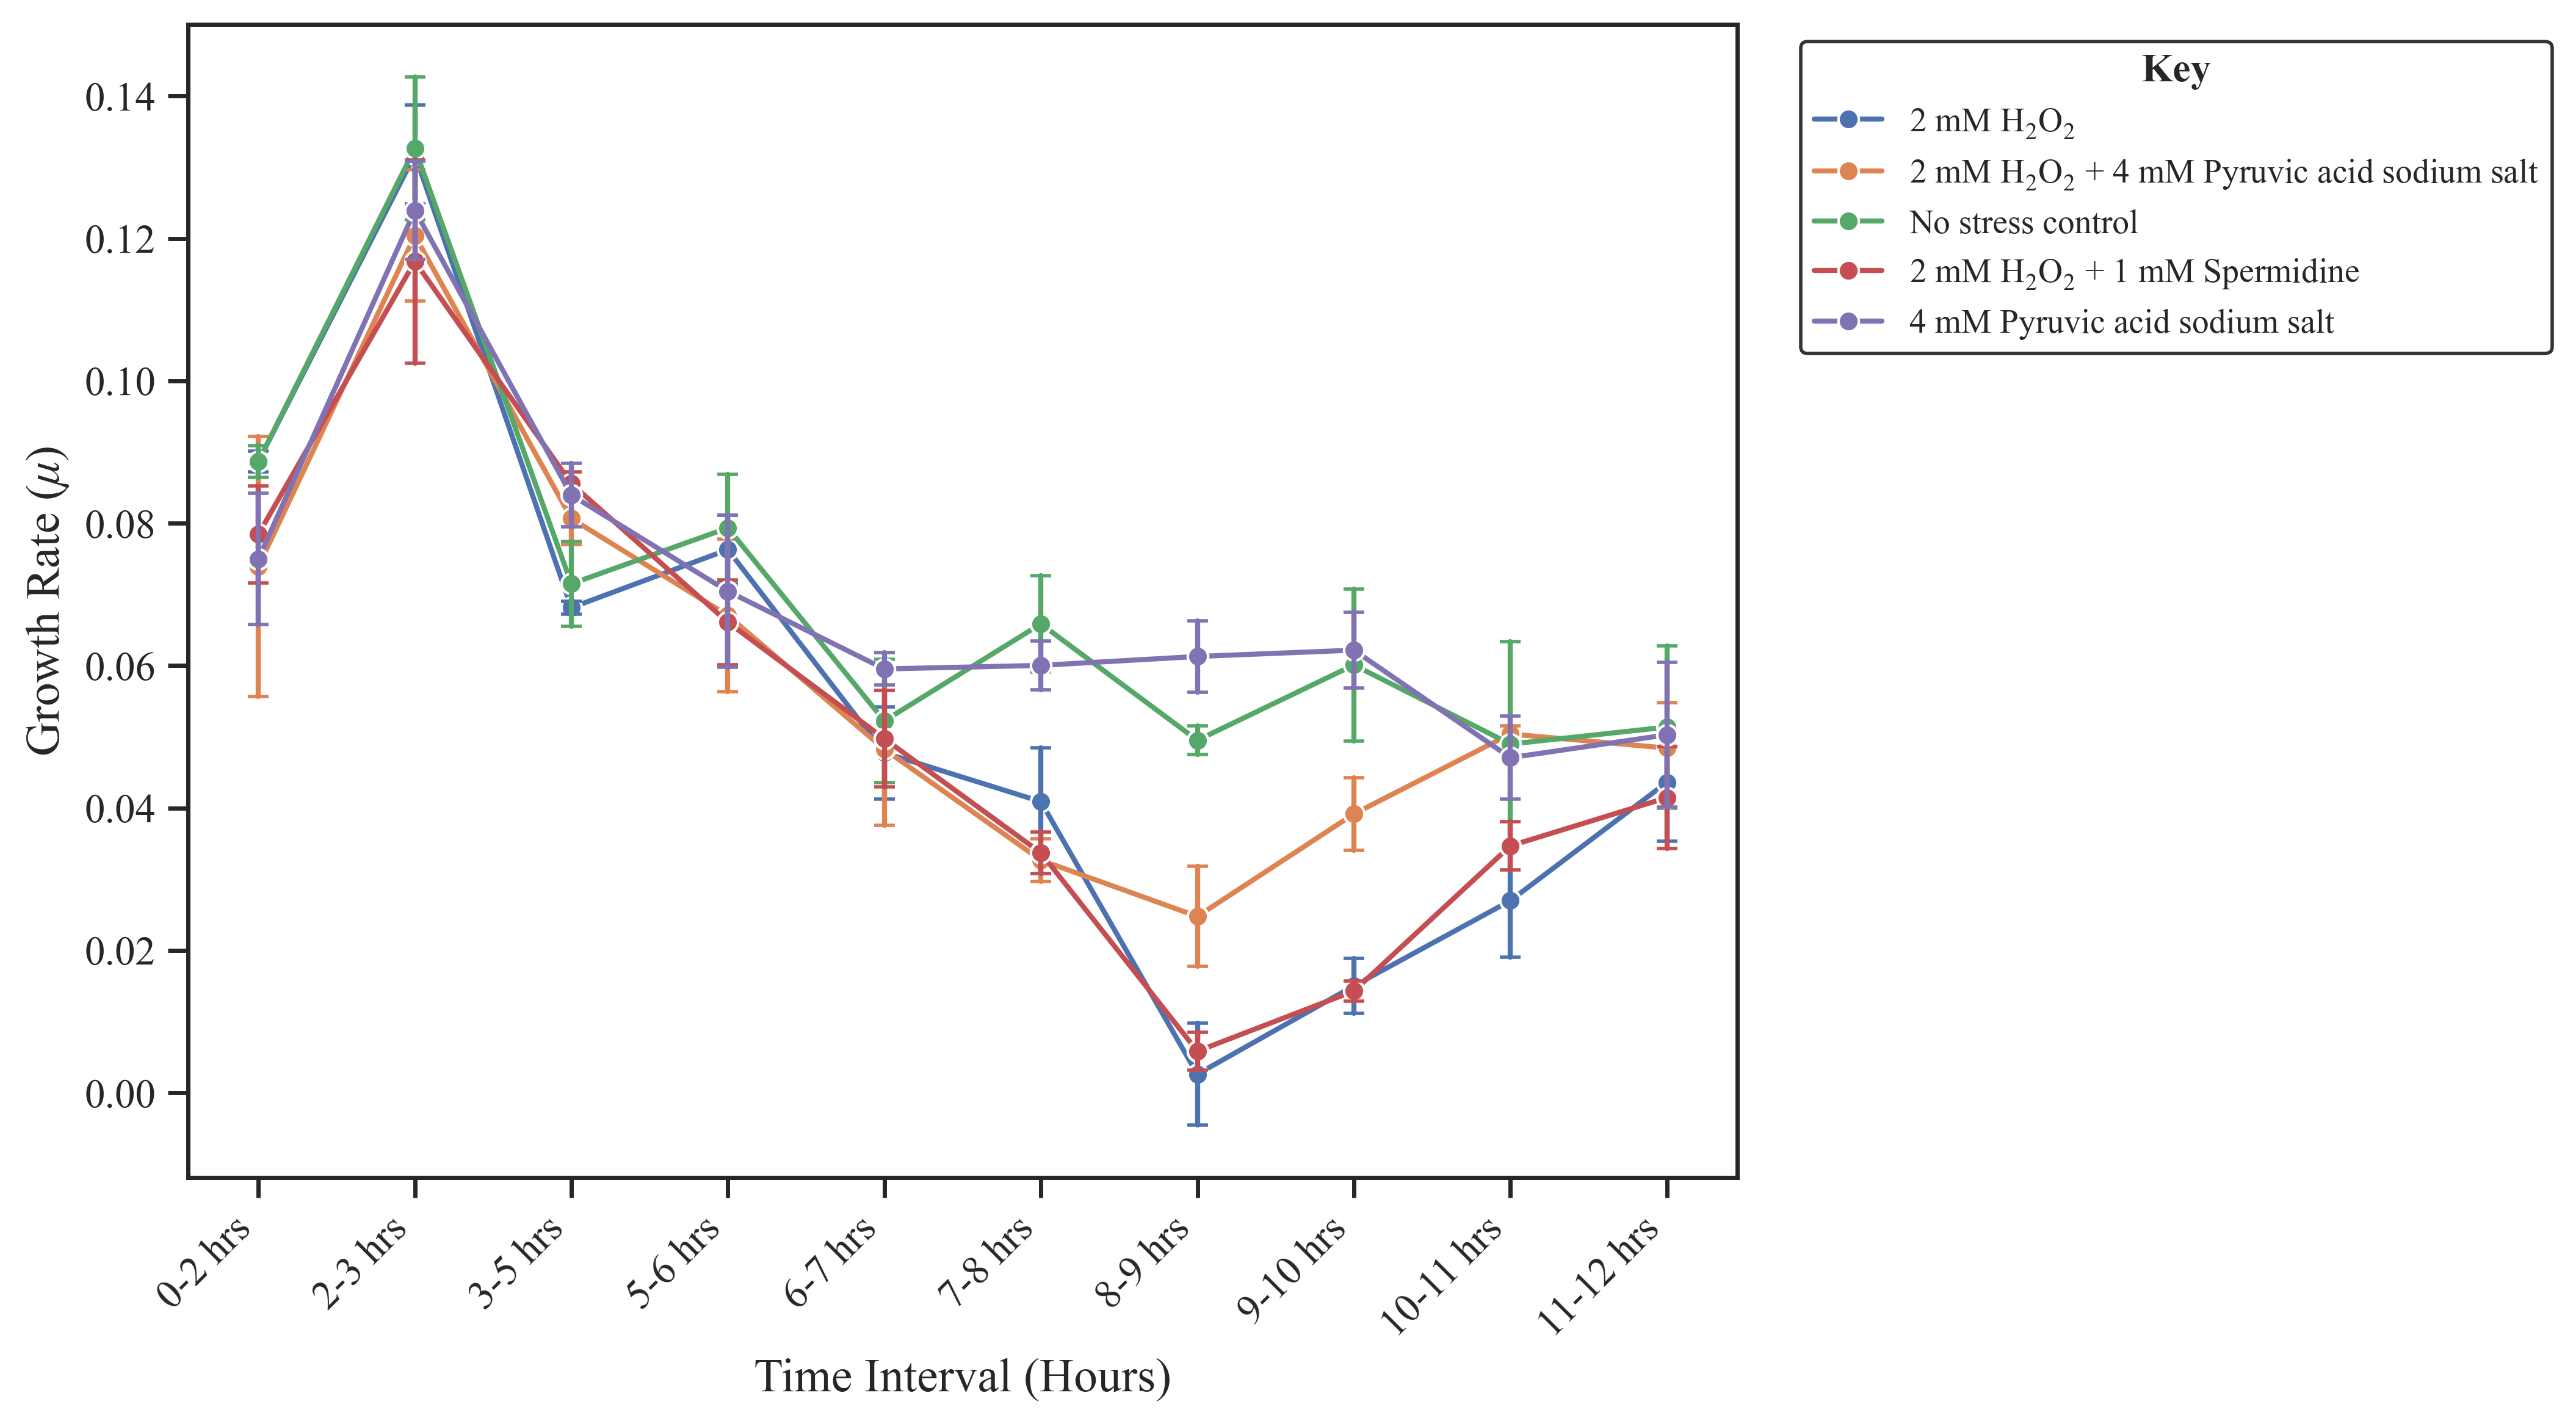

In [473]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# CRITICAL FIX 1: Define the figure size BEFORE creating the plot
# Increased width (12) to help accommodate rotated labels and the legend.
plt.figure(figsize=(12, 6))

# Create the line plot and get the axes object
ax = sns.lineplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Sample",
    errorbar="sd",
    marker="o",
    err_style="bars",
    err_kws={'capsize': 3}
)


# LEGEND MODIFICATIONS 
handles, labels = ax.get_legend_handles_labels()

# These labels match the assumed alphabetical order (A, B, C, D, E) of the 'Sample' column
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'          
]

legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
# --- 3. AXES LABEL AND TICK MODIFICATIONS (Anti-Overlap Fix) ---
ROTATION_ANGLE = 45
AXES_LABEL_FONTSIZE = 14
TICK_LABEL_FONTSIZE = 12

# Fix for overlapping X labels: Rotate and set font size
plt.xticks(rotation=ROTATION_ANGLE, ha='right', fontsize=TICK_LABEL_FONTSIZE,fontfamily='Times New Roman')

# Set axis labels and Y tick size
ax.set_xlabel('Time Interval (Hours)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE)

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

# Ensures everything fits, reserving space for the legend on the right (0.9 to 1.0)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('Growth_rate_lineplot_intervals1', dpi=400,bbox_inches='tight')
plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\2861921812.py:77: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')


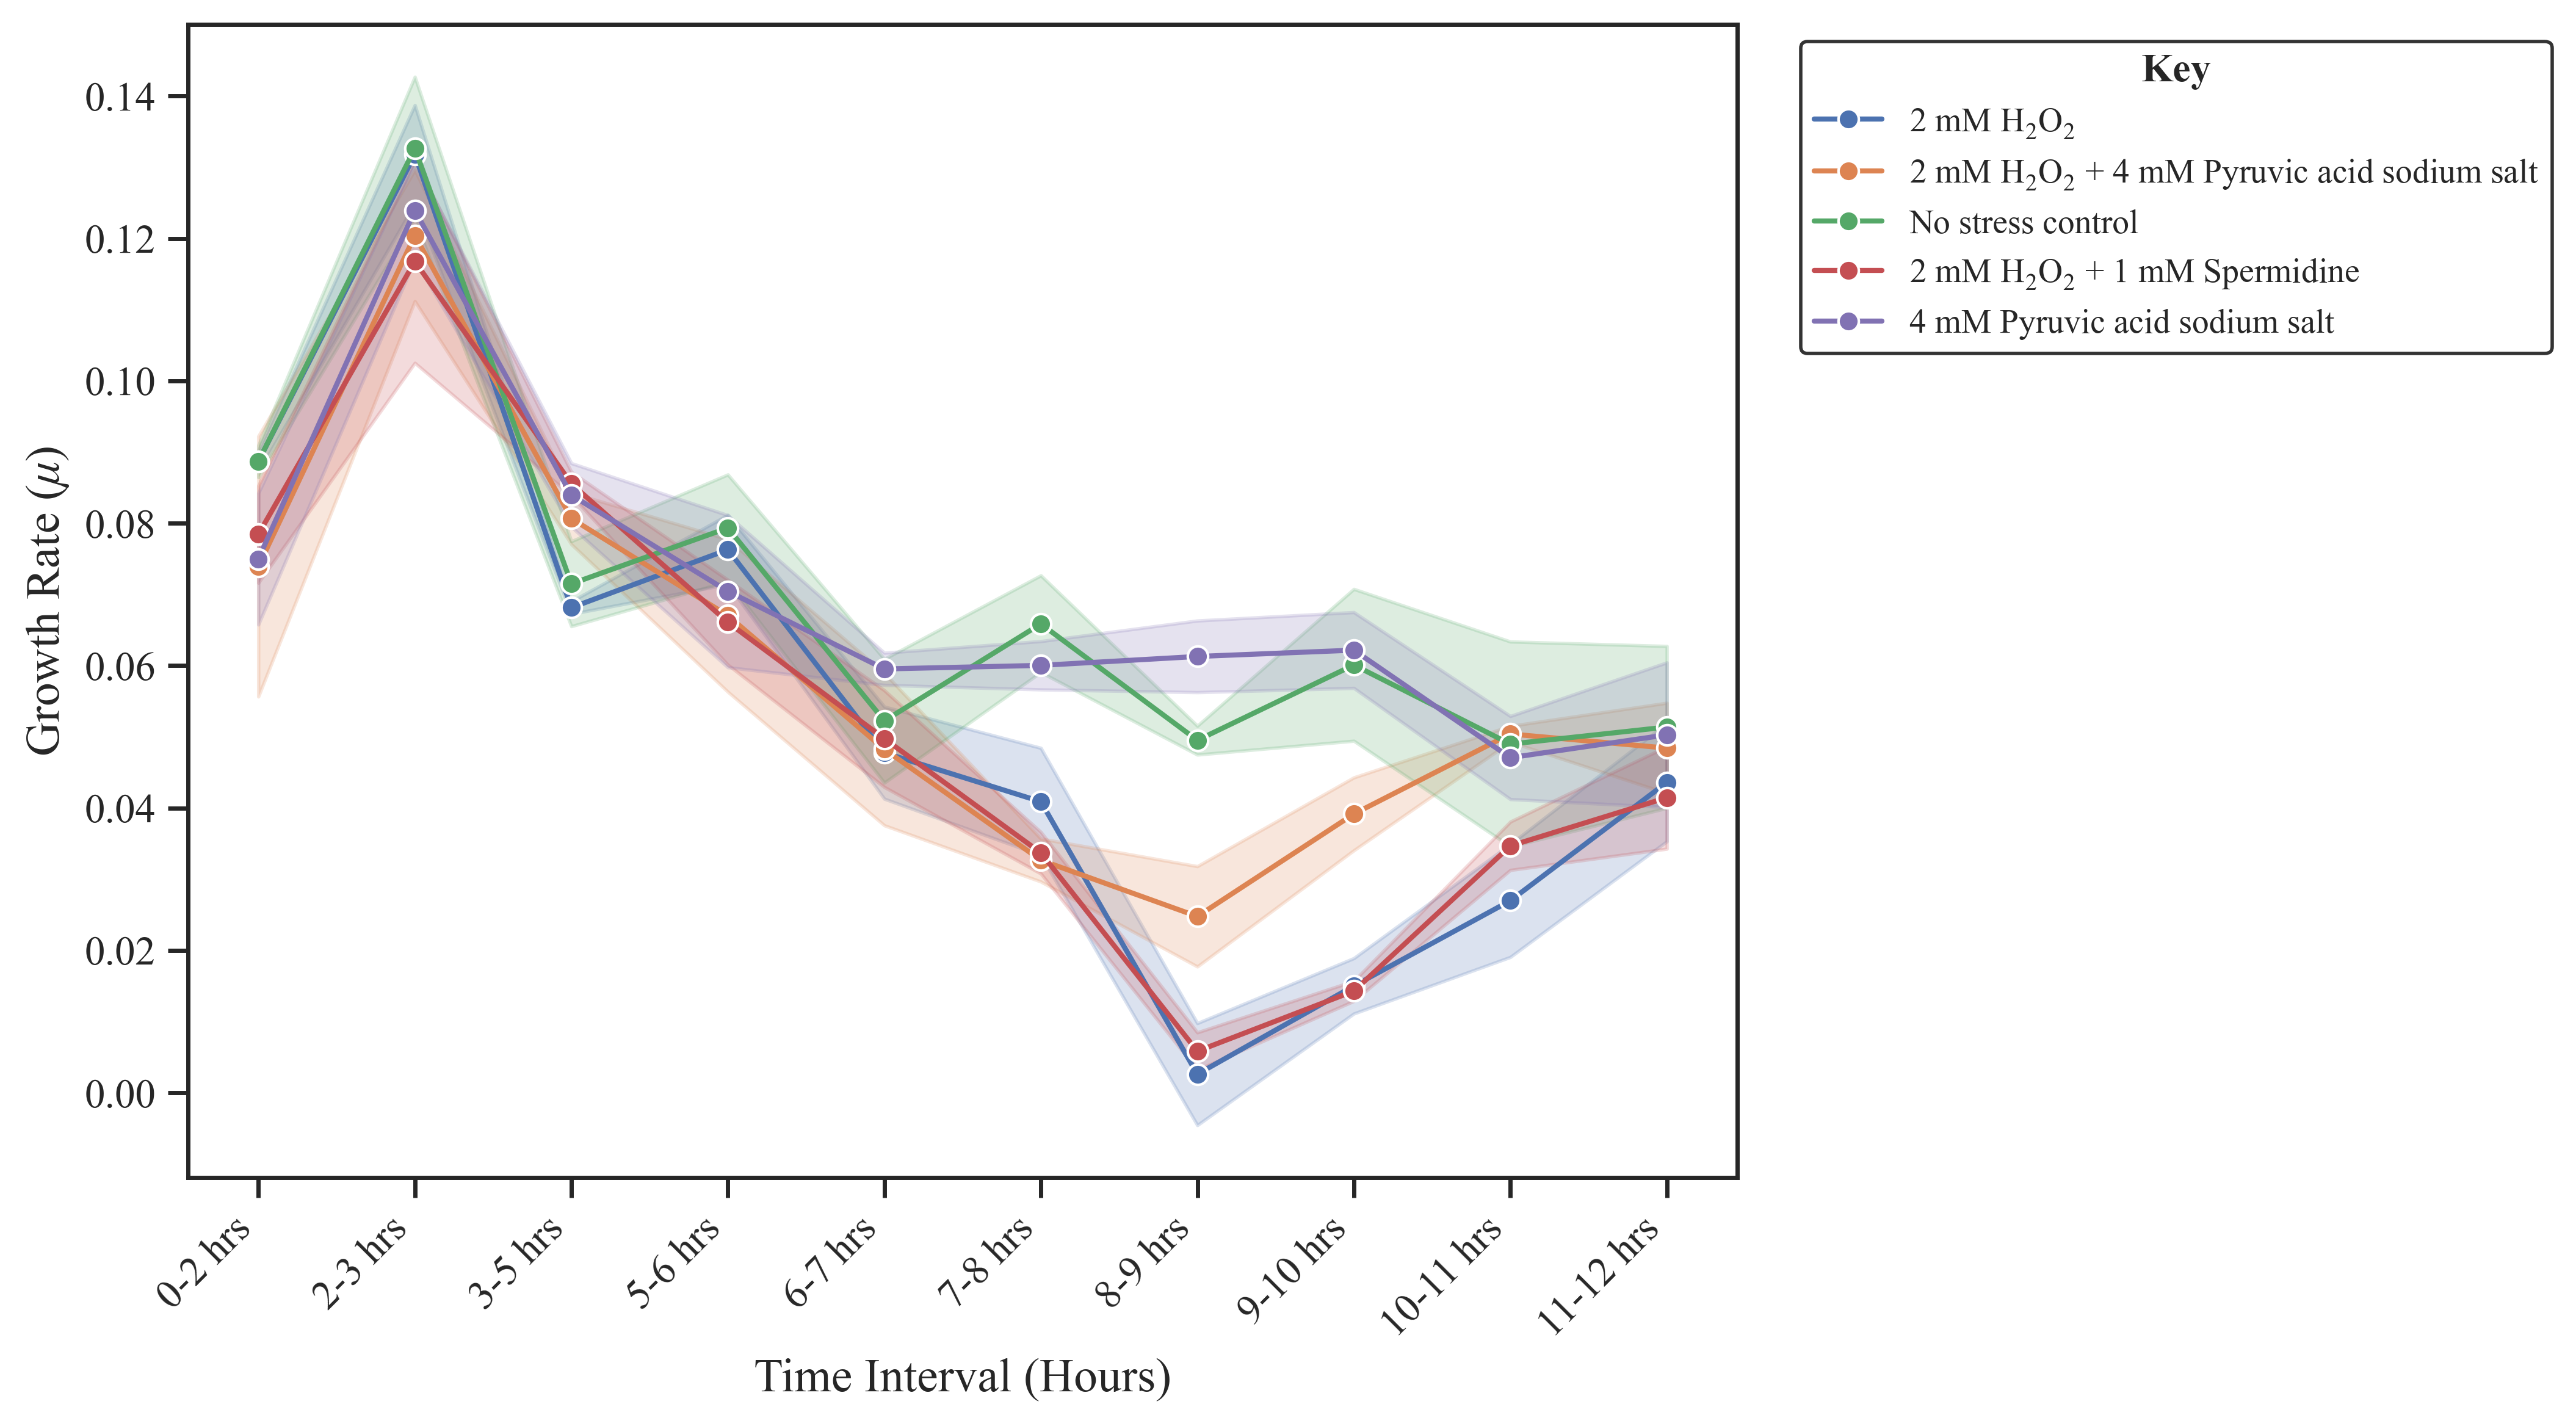

In [474]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# CRITICAL FIX 1: Define the figure size BEFORE creating the plot
# Increased width (12) to help accommodate rotated labels and the legend.
plt.figure(figsize=(12, 6))

# Create the line plot and get the axes object
ax = sns.lineplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Sample",
    errorbar="sd",
    marker="o")


# LEGEND MODIFICATIONS 
handles, labels = ax.get_legend_handles_labels()

# These labels match the assumed alphabetical order (A, B, C, D, E) of the 'Sample' column
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'          
]

legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
# --- 3. AXES LABEL AND TICK MODIFICATIONS (Anti-Overlap Fix) ---
ROTATION_ANGLE = 45
AXES_LABEL_FONTSIZE = 14
TICK_LABEL_FONTSIZE = 12

# Fix for overlapping X labels: Rotate and set font size
plt.xticks(rotation=ROTATION_ANGLE, ha='right', fontsize=TICK_LABEL_FONTSIZE,fontfamily='Times New Roman')

# Set axis labels and Y tick size
ax.set_xlabel('Time Interval (Hours)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE)

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

# Ensures everything fits, reserving space for the legend on the right (0.9 to 1.0)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('Growth_rate_lineplot_intervals2', dpi=400,bbox_inches='tight')
plt.show()

<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\692144473.py:79: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')


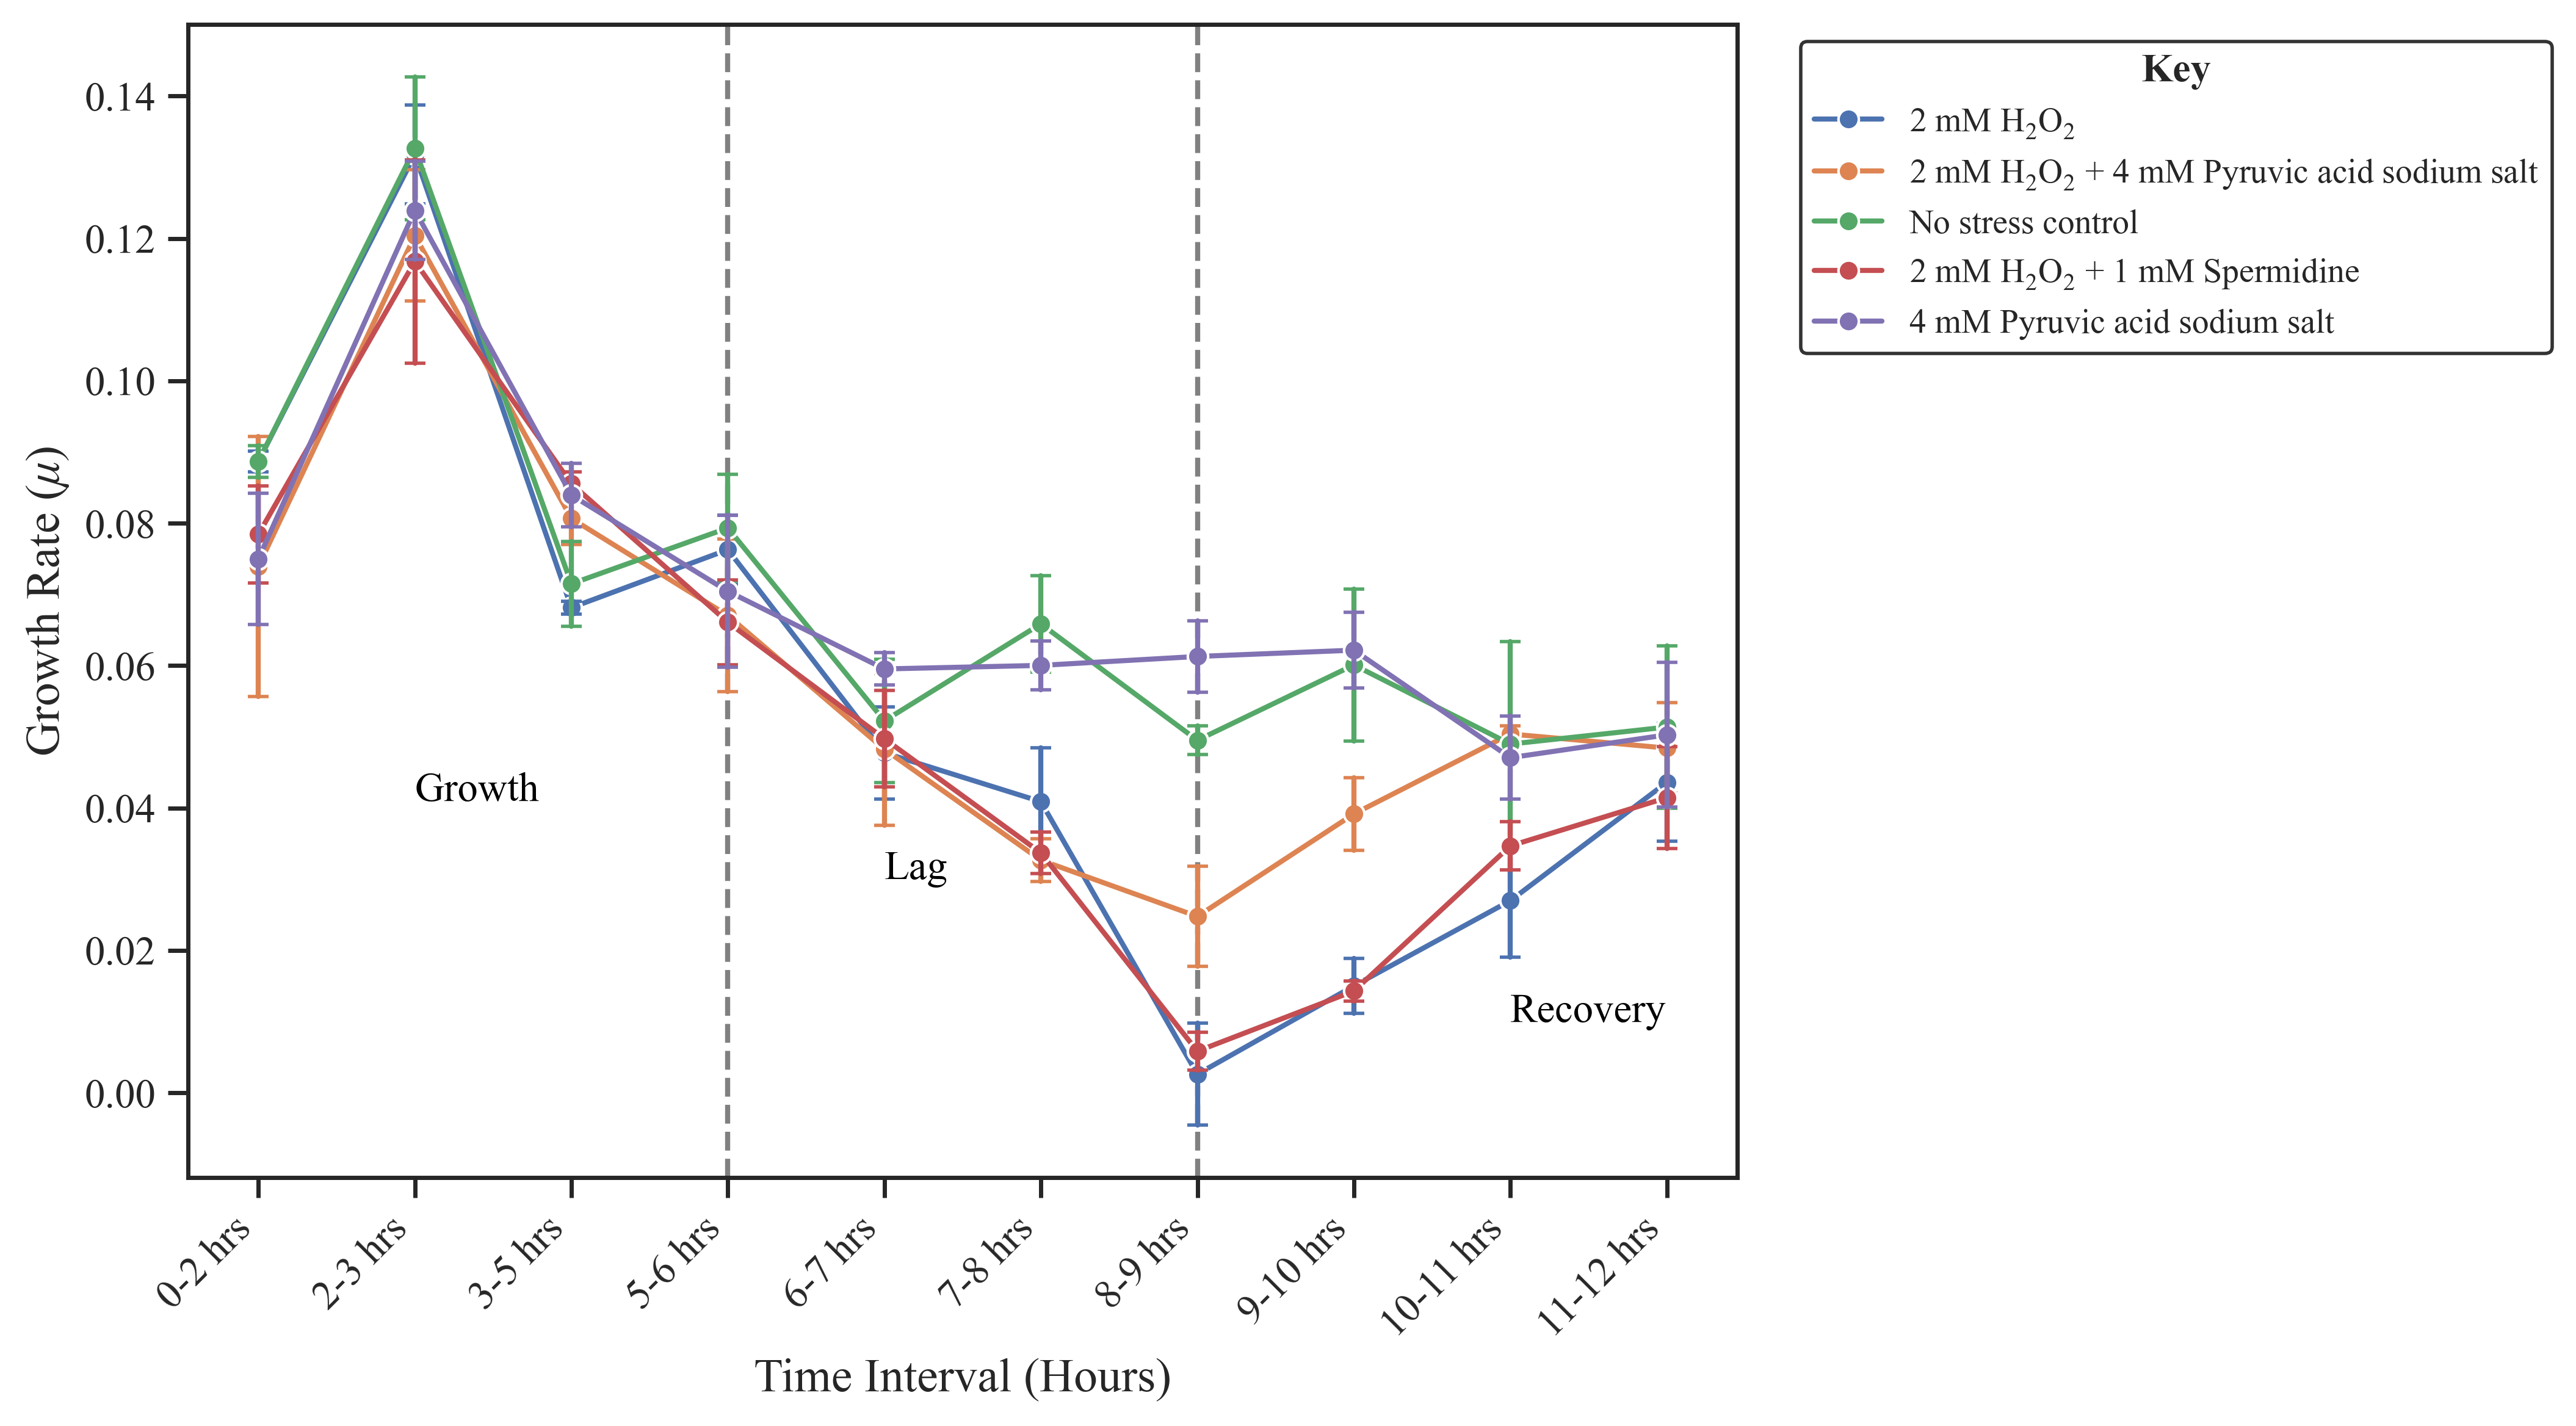

In [475]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# CRITICAL FIX 1: Define the figure size BEFORE creating the plot
# Increased width (12) to help accommodate rotated labels and the legend.
plt.figure(figsize=(12, 6))

# Create the line plot and get the axes object
ax = sns.lineplot(
    data=growth_rate_triplicates,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Sample",
    errorbar="sd",
    marker="o",
    err_style="bars",
    err_kws={'capsize': 3}
)

# --- 2. LEGEND MODIFICATIONS ---
handles, labels = ax.get_legend_handles_labels()

# These labels match the assumed alphabetical order (A, B, C, D, E) of the 'Sample' column
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'             # Corresponds to E
]

legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)
# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---

#  AXES LABEL AND TICK MODIFICATIONS (Anti-Overlap Fix) 
ROTATION_ANGLE = 45
AXES_LABEL_FONTSIZE = 14
TICK_LABEL_FONTSIZE = 12

# Fix for overlapping X labels: Rotate and set font size
plt.xticks(rotation=ROTATION_ANGLE, ha='right', fontsize=TICK_LABEL_FONTSIZE,fontfamily='Times New Roman')

# Set axis labels and Y tick size
ax.set_xlabel('Time Interval (Hours)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.set_ylabel('Growth Rate ($\mu$)', fontsize=AXES_LABEL_FONTSIZE,fontfamily='Times New Roman')
ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE)

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
# 
# Ensures everything fits, reserving space for the legend on the right (0.9 to 1.0)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Annotate plot
ax.annotate(text="Growth",xy=(1,0.041),xycoords="data",fontsize=12,color="black",ha="left",fontfamily='Times New Roman')
ax.annotate(text="Lag",xy=(4,0.03),xycoords="data",fontsize=12,color="black",ha="left",fontfamily='Times New Roman')
ax.annotate(text="Recovery",xy=(8,0.01),xycoords="data",fontsize=12,color="black",ha="left",fontfamily='Times New Roman')

#vertical line
ax.axvline(x=3,color="grey",linestyle="--",linewidth=1.5,zorder=0)
ax.axvline(x=6,color="grey",linestyle="--",linewidth=1.5,zorder=0)
plt.savefig('Growth_rate_lineplot_intervals3', dpi=400,bbox_inches='tight')
plt.show()

A Pairwise Tukey Honestly Significant Difference (HSD) test to determine if the mean difference between any two groups in a set of groups is statistically significant for specific/selected intervals of interest:
0-5hrs
6-8hrs
9-12hrs

Preparing data and getting growth rates at specific intervals

In [478]:
# --- 1. Load Data ---
clean_new2 = pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\220013700_GROWTH_CURVE_DATA_30_10_2025.xlsx", sheet_name = "Sheet2")

# Rename 'Sample' to 'Replicate_ID' for clear grouping
clean_new2 = clean_new2.rename(columns={'Sample': 'Replicate_ID'})

# --- 2. Data Cleaning and Type Conversion ---
# Convert 'Time' and 'OD' columns to numeric.
clean_new2['Time'] = pd.to_numeric(clean_new2['Time'], errors='coerce')
clean_new2['OD'] = pd.to_numeric(clean_new2['OD'], errors='coerce')

# Drop any rows where the conversion failed
clean_new2 = clean_new2.dropna(subset=['Time', 'OD'])


# --- 3. Define Intervals and Calculate Growth Rates (Wide Format) ---
time_intervals = [
    (0,6),(6,8),(9,12)]

growth_rate_results = []

for t_start, t_end in time_intervals:
    
    # Get OD at t_end (OD_t2): Latest reading <= t_end
    od_t2_index = clean_new[clean_new['Time'] <= t_end].groupby('Replicate_ID')['Time'].idxmax()
    end_points = clean_new.loc[od_t2_index].rename(columns={'OD': 'OD_t2', 'Time': 'Time_t2'})
    
    # Get OD at t_start (OD_t1): Earliest reading >= t_start
    od_t1_index = clean_new[clean_new['Time'] >= t_start].groupby('Replicate_ID')['Time'].idxmin()
    start_points = clean_new.loc[od_t1_index].rename(columns={'OD': 'OD_t1', 'Time': 'Time_t1'})

    # Merge points
    merged = pd.merge(start_points[['Replicate_ID', 'OD_t1', 'Time_t1']],
                      end_points[['Replicate_ID', 'OD_t2', 'Time_t2']],
                      on='Replicate_ID', how='inner')
    
    # Calculate mu
    merged['Time_Delta'] = merged['Time_t2'] - merged['Time_t1']
    merged['OD_Delta'] = merged['OD_t2'] - merged['OD_t1']
    
    merged['mu'] = np.where(merged['Time_Delta'] > 0,
                            merged['OD_Delta'] / merged['Time_Delta'],
                            np.nan)

    # Format and store results
    result = merged[['Replicate_ID', 'mu']].copy()
    result['Interval'] = f'{t_start}-{t_end} hrs'
    growth_rate_results.append(result)

# Combine results into a single Wide DataFrame
final_rates_df = pd.concat(growth_rate_results, ignore_index=True)
final_rates_pivot = final_rates_df.pivot(index='Replicate_ID', columns='Interval', values='mu')

# Sort columns
sorted_intervals = [f'{t_start}-{t_end} hrs' for t_start, t_end in time_intervals]
final_rates_pivot = final_rates_pivot[sorted_intervals]

# --- 4. Convert to Long Format for Seaborn ---
final_rates_long = final_rates_pivot.reset_index().melt(
    id_vars=['Replicate_ID'],      # Column to keep as identifier
    var_name='Time_Interval',      # New column name for the old column headers
    value_name='Growth_Rate'       # New column name for the values
)


# --- 5. Export and Display ---

# Export Wide Format
output_wide_filename = 'replicate_growth_rates_wide2.csv'
final_rates_pivot.to_csv(output_wide_filename)

# Export Long Format
output_long_filename = 'interval_graowth_rate_specific.csv'
final_rates_long.to_csv(output_long_filename, index=False)


In [479]:
interval_rate=pd.read_csv('interval_graowth_rate_specific.csv')
interval_rate.head()


Replicate_ID Time_Interval  Growth_Rate
0           A1       0-6 hrs     0.087291
1           A2       0-6 hrs     0.086273
2           A3       0-6 hrs     0.087291
3           B1       0-6 hrs     0.077398
4           B2       0-6 hrs     0.084342

In [480]:

df = interval_rate
# --- STEP 1: CREATE A NEW COLUMN FOR THE MAIN SAMPLE GROUP ---
# We assume the last character in the SAMPLE_COLUMN is the replicate number.
# We will create a new column, 'Main_Sample', by taking everything *except* the last character.

SAMPLE_COLUMN = 'Replicate_ID' # The original column with A1, A2, etc.
MAIN_SAMPLE_COLUMN = 'Main_Sample' # The new column with A, B, C, etc.
TIME_COLUMN = 'Time_Interval'

# Apply the transformation: take the string up to the last character
df[MAIN_SAMPLE_COLUMN] = df[SAMPLE_COLUMN].str[:-1]

# --- STEP 2: ADJUST THE ANALYSIS TO USE THE NEW COLUMN ---

# Get a list of the unique MAIN sample names (A, B, C, etc.)
unique_main_samples = df[MAIN_SAMPLE_COLUMN].unique()

# Dictionary to store Tukey's HSD results summaries
tukey_results_interval_comparison = {}

# Define the intervals you want to compare
target_intervals = ['0-6 hrs', '6-8 hrs', '9-12 hrs']

# Perform Tukey's HSD for EACH MAIN sample group
for main_sample_name in unique_main_samples:
    # 1. Filter the data for the current MAIN SAMPLE (e.g., all rows where Main_Sample == 'A')
    sample_data = df[df[MAIN_SAMPLE_COLUMN] == main_sample_name].copy()
    
    # 2. Filter the data for the specific time intervals you are interested in
    sample_data = sample_data[sample_data[TIME_COLUMN].isin(target_intervals)].copy()

    # Crucial check: Ensure there is enough data for the test (N > 2 groups)
    if len(sample_data[TIME_COLUMN].unique()) < 2:
        print(f"\n--- Skipping Tukey's HSD for {main_sample_name} ---")
        print("Not enough unique time intervals available.")
        continue
    


    print(f"\n--- Running Tukey's HSD for differences in {TIME_COLUMN} for: {main_sample_name} ---")

    # Perform Tukey's HSD test
    try:
        # Key Change: 'groups' is still Time_Interval, but 'endog' now pools A1, A2, A3 data.
        tukey_hsd = pairwise_tukeyhsd(
            endog=sample_data['Growth_Rate'],
            groups=sample_data[TIME_COLUMN], # Groups are the time bins
            alpha=0.05
        )
        
        # Store and print the result summary table
        result_text = tukey_hsd.summary().as_text()
        tukey_results_interval_comparison[main_sample_name] = result_text
        print(result_text)

    except Exception as e:
        error_message = f"Error during Tukey HSD for Main Sample {main_sample_name}: {e}"
        tukey_results_interval_comparison[main_sample_name] = error_message
        print(error_message)

# Optional: Save all results into a text file
with open('tukey_hsd_grouped_interval_comparison_summary.txt', 'w') as f:
    f.write("Tukey's HSD Post-Hoc Analysis: Interval Comparison within Grouped Samples\n\n")
    for main_sample_name, result in tukey_results_interval_comparison.items():
        f.write(f"\n-----------------------------------------------\n")
        f.write(f"Tukey's HSD Test for Main Sample Group: {main_sample_name}\n")
        f.write("-----------------------------------------------\n")
        f.write(result)

print("\nAll grouped Tukey's HSD results summaries have been saved to tukey_hsd_grouped_interval_comparison_summary.txt")


--- Running Tukey's HSD for differences in Time_Interval for: A ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
0-6 hrs  6-8 hrs  -0.0426    0.0 -0.0519 -0.0333   True
0-6 hrs 9-12 hrs  -0.0584    0.0 -0.0677 -0.0491   True
6-8 hrs 9-12 hrs  -0.0158 0.0048 -0.0251 -0.0065   True
-------------------------------------------------------

--- Running Tukey's HSD for differences in Time_Interval for: B ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
0-6 hrs  6-8 hrs  -0.0423    0.0 -0.0516  -0.033   True
0-6 hrs 9-12 hrs  -0.0368    0.0 -0.0461 -0.0275   True
6-8 hrs 9-12 hrs   0.0055 0.2398 -0.0038  0.0148  False
-------------------------------------------------------

--- Running Tukey's HSD for differences in Time_Interval for: C ---
  Multipl

In [481]:
df = interval_rate

# --- 0. Define Custom Label Mapping ---
# Use this dictionary to replace the short identifiers (A, B, C, etc.)
# with the full descriptive sample names in the output.
sample_name_mapping = {
    'A': '2 mM Hydrogen Peroxide',
    'B': '2 mM Hydrogen Peroxide + 4 mM Pyruvic acid sodium salt',
    'C': 'No stress control',
    'D': '2 mM Hydrogen Peroxide + 1 mM Spermidine',
    'E': '4 mM Pyruvic acid sodium salt',
    # Add any other identifiers (F, G, etc.) if they exist in your data
}

# --- STEP 1: CREATE A NEW COLUMN FOR THE MAIN SAMPLE GROUP ---
# We assume the last character in the SAMPLE_COLUMN is the replicate number.
# We will create a new column, 'Main_Sample', by taking everything *except* the last character.

SAMPLE_COLUMN = 'Replicate_ID' # The original column with A1, A2, etc.
MAIN_SAMPLE_COLUMN = 'Main_Sample' # The new column with A, B, C, etc.
TIME_COLUMN = 'Time_Interval'

# Apply the transformation: take the string up to the last character
df[MAIN_SAMPLE_COLUMN] = df[SAMPLE_COLUMN].str[:-1]

# --- STEP 2: ADJUST THE ANALYSIS TO USE THE NEW COLUMN ---

# Get a list of the unique MAIN sample names (A, B, C, etc.)
unique_main_samples = df[MAIN_SAMPLE_COLUMN].unique()

# Dictionary to store Tukey's HSD results summaries
# We will use the DESCRIPTIVE name as the key for clarity
tukey_results_interval_comparison = {}

# Define the intervals you want to compare
target_intervals = ['0-6 hrs', '6-8 hrs', '9-12 hrs']

# Perform Tukey's HSD for EACH MAIN sample group
for main_sample_name in unique_main_samples:
    # Look up the descriptive name. Fall back to the short name if not found.
    descriptive_name = sample_name_mapping.get(main_sample_name, main_sample_name)
    
    # 1. Filter the data for the current MAIN SAMPLE (e.g., all rows where Main_Sample == 'A')
    sample_data = df[df[MAIN_SAMPLE_COLUMN] == main_sample_name].copy()
    
    # 2. Filter the data for the specific time intervals you are interested in
    sample_data = sample_data[sample_data[TIME_COLUMN].isin(target_intervals)].copy()

    # Crucial check: Ensure there is enough data for the test (N > 2 groups)
    if len(sample_data[TIME_COLUMN].unique()) < 2:
        print(f"\n--- Skipping Tukey's HSD for {descriptive_name} ---")
        print("Not enough unique time intervals available.")
        # Store a note in the results dictionary under the descriptive name
        tukey_results_interval_comparison[descriptive_name] = "Skipped: Not enough unique time intervals available."
        continue
    
    # --- OUTPUT CHANGE HERE: Use the descriptive_name for printing ---
    print(f"\n--- Running Tukey's HSD for differences in {TIME_COLUMN} for: {descriptive_name} ---")

    # Perform Tukey's HSD test
    try:
        # Key Change: 'groups' is still Time_Interval, but 'endog' now pools A1, A2, A3 data.
        tukey_hsd = pairwise_tukeyhsd(
            endog=sample_data['Growth_Rate'],
            groups=sample_data[TIME_COLUMN], # Groups are the time bins
            alpha=0.05
        )
        
        # Store and print the result summary table
        result_text = tukey_hsd.summary().as_text()
        # --- STORAGE CHANGE HERE: Use the descriptive_name as the dictionary key ---
        tukey_results_interval_comparison[descriptive_name] = result_text
        print(result_text)

    except Exception as e:
        error_message = f"Error during Tukey HSD for Main Sample {descriptive_name}: {e}"
        # --- STORAGE CHANGE HERE: Use the descriptive_name as the dictionary key ---
        tukey_results_interval_comparison[descriptive_name] = error_message
        print(error_message)

# Optional: Save all results into a text file
with open('tukey_hsd_grouped_interval_comparison_summary.txt', 'w') as f:
    f.write("Tukey's HSD Post-Hoc Analysis: Interval Comparison within Grouped Samples\n\n")
    # --- FILE WRITING CHANGE HERE: The loop iterates over descriptive names (as they are the keys) ---
    for descriptive_name, result in tukey_results_interval_comparison.items():
        f.write(f"\n-----------------------------------------------\n")
        f.write(f"Tukey's HSD Test for Main Sample Group: {descriptive_name}\n")
        f.write("-----------------------------------------------\n")
        f.write(result)

print("\nAll grouped Tukey's HSD results summaries have been saved to tukey_hsd_grouped_interval_comparison_summary.txt")


--- Running Tukey's HSD for differences in Time_Interval for: 2 mM Hydrogen Peroxide ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
0-6 hrs  6-8 hrs  -0.0426    0.0 -0.0519 -0.0333   True
0-6 hrs 9-12 hrs  -0.0584    0.0 -0.0677 -0.0491   True
6-8 hrs 9-12 hrs  -0.0158 0.0048 -0.0251 -0.0065   True
-------------------------------------------------------

--- Running Tukey's HSD for differences in Time_Interval for: 2 mM Hydrogen Peroxide + 4 mM Pyruvic acid sodium salt ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
0-6 hrs  6-8 hrs  -0.0423    0.0 -0.0516  -0.033   True
0-6 hrs 9-12 hrs  -0.0368    0.0 -0.0461 -0.0275   True
6-8 hrs 9-12 hrs   0.0055 0.2398 -0.0038  0.0148  False
-------------------------------------------------------

---

In [482]:
#--- Running Tukey's HSD for differences in Time_Interval for: A ---
  #Multiple Comparison of Means - Tukey HSD, FWER=0.05  
#=======================================================
 #group1  group2  meandiff p-adj   lower   upper  reject
#-------------------------------------------------------
#0-5 hrs  6-8 hrs  -0.0448    0.0 -0.0541 -0.0354   True
#0-5 hrs 9-12 hrs  -0.0605    0.0 -0.0699 -0.0512   True
#6-8 hrs 9-12 hrs  -0.0158 0.0049 -0.0251 -0.0065   True
#-------------------------------------------------------

Treatment A - 2mM H2O2 @6 hours

Time intervals (0-5hrs),(6-8hrs),(9-12hrs):
all statistically significant : Time intervals are statistically different from eachother

Breaking up the growth rates per interval for A-2mM H2O2 

In [485]:
HP1=pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\jupyter_notebook_files\Practice\H2O2_GROWTH_RATE_INTERVAL.xlsx", sheet_name="Sheet1")
HP1.head()

Time  Growth Rate    Sample
0     0     0.000000  2mM H2O2
1     2     0.089967  2mM H2O2
2     3     0.126848  2mM H2O2
3     5     0.067587  2mM H2O2
4     6     0.081790  2mM H2O2

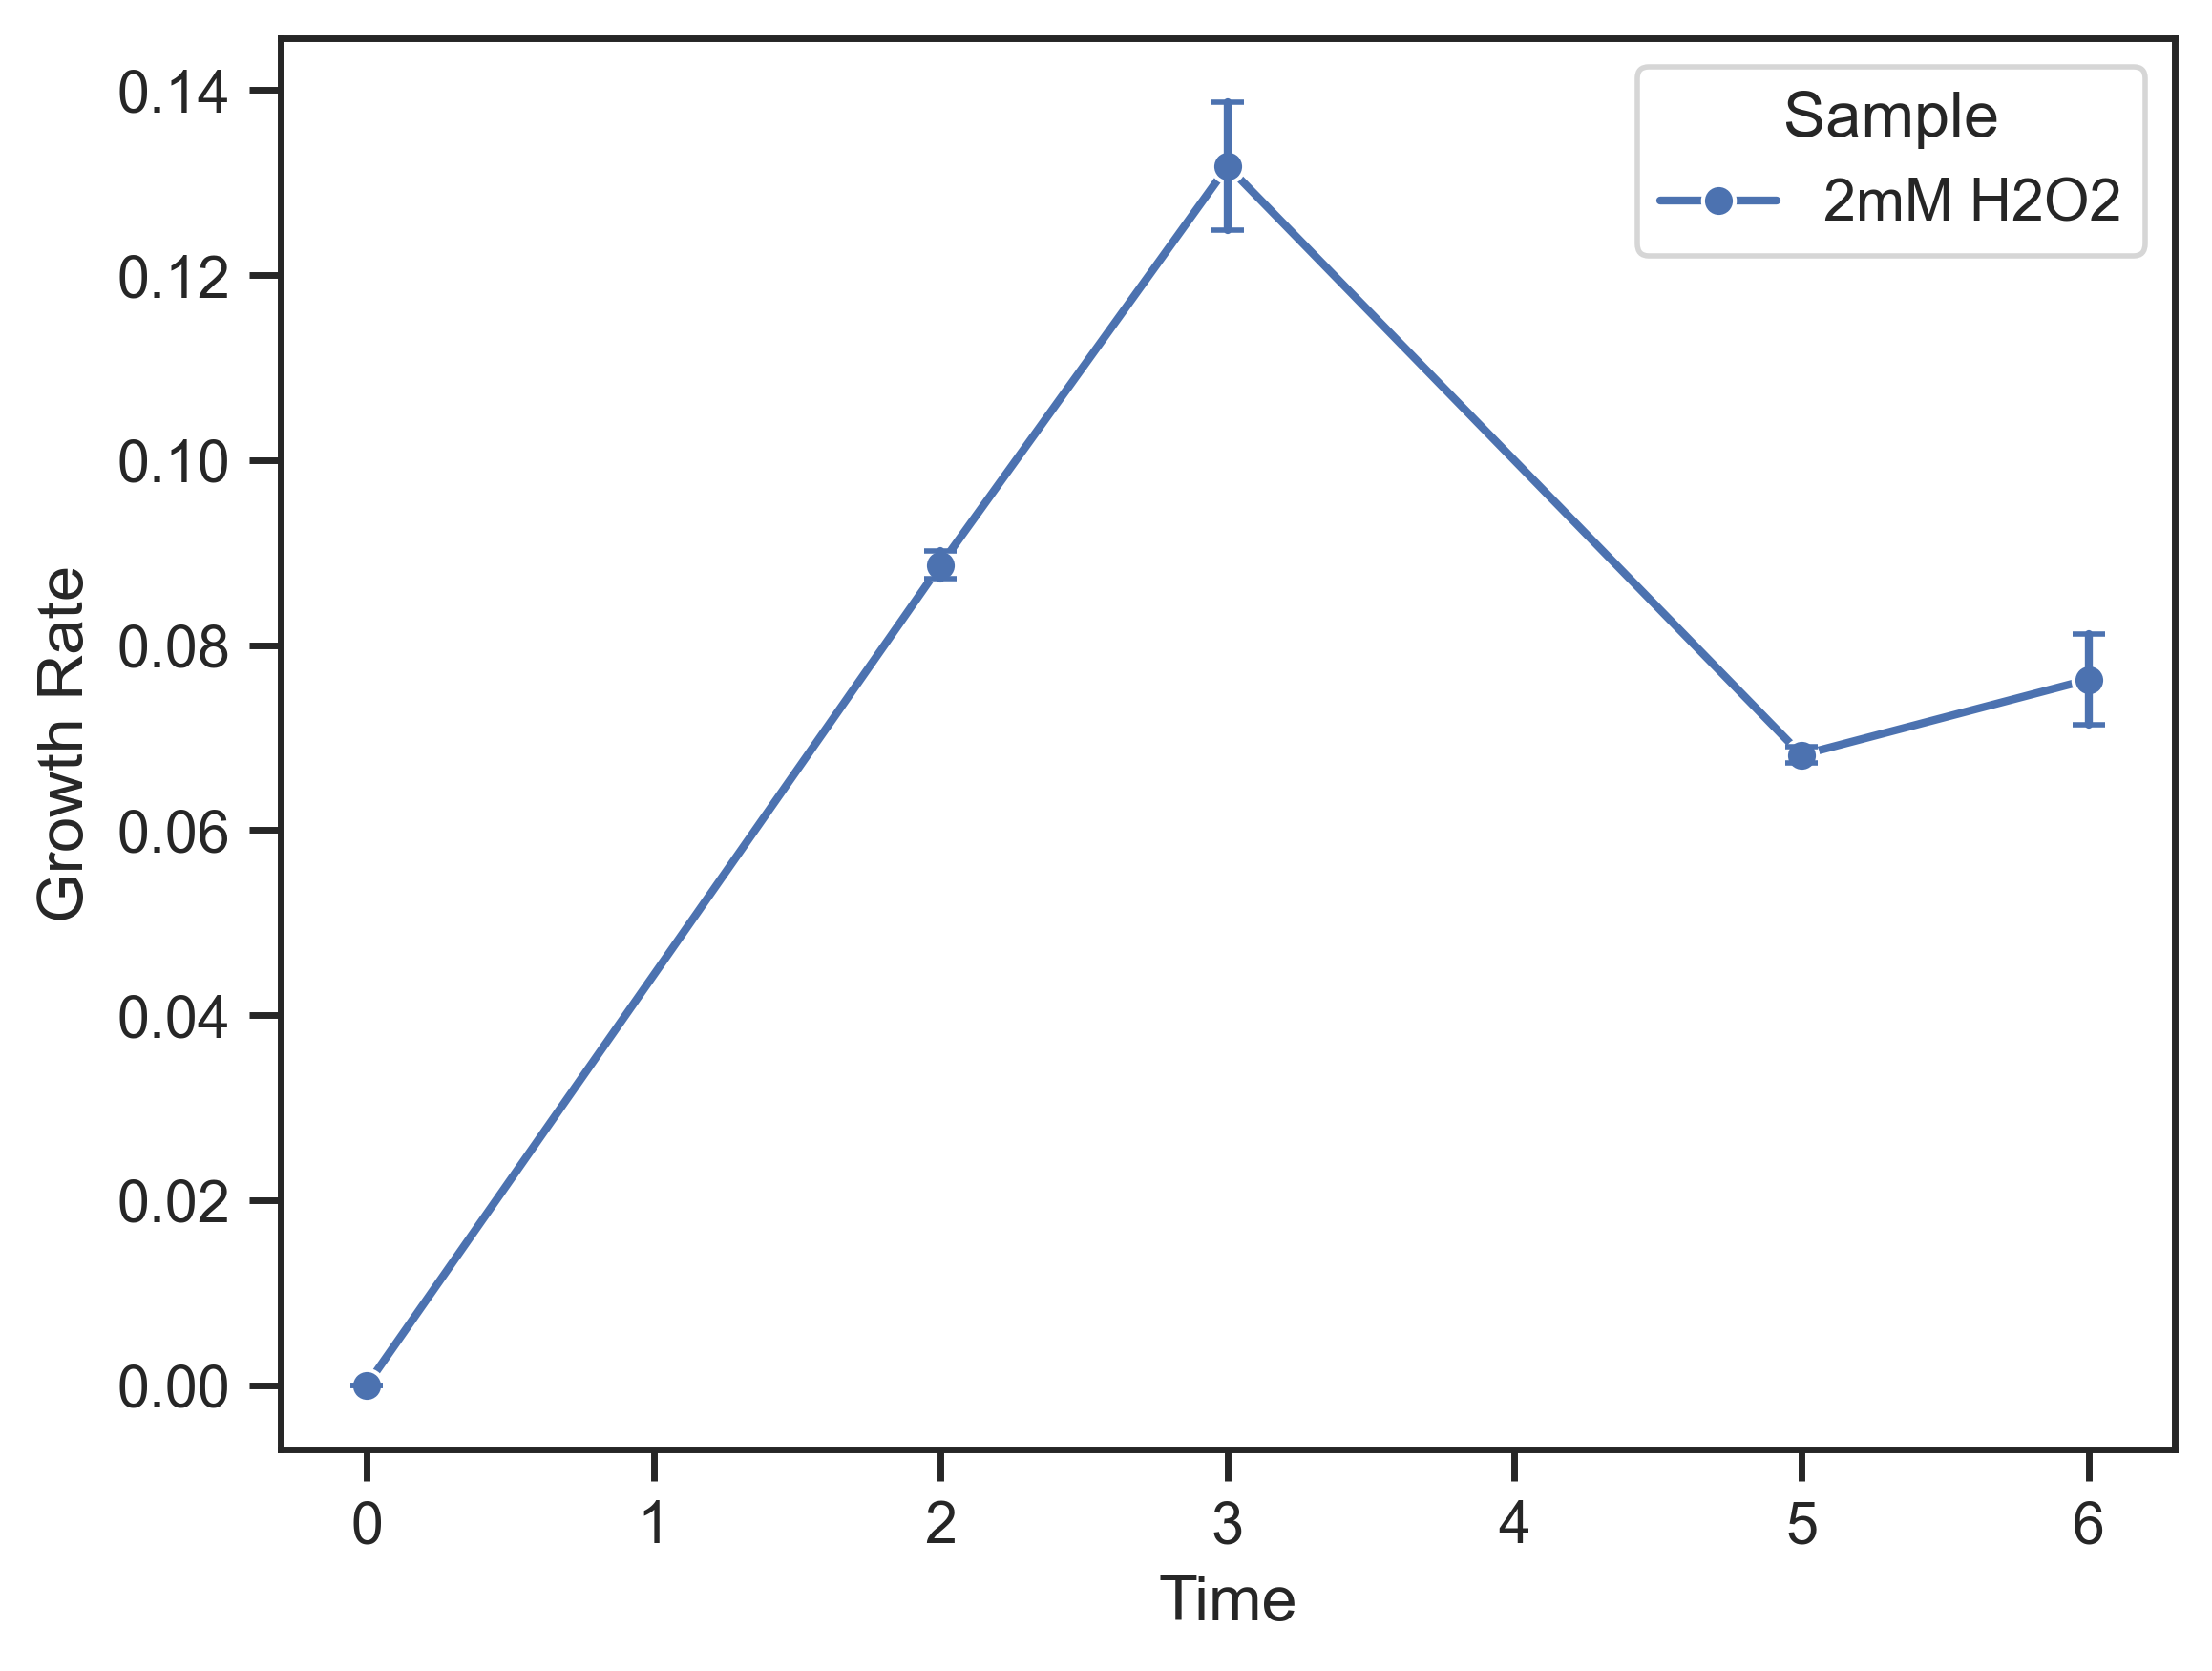

In [486]:
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")
ax=sns.lineplot(data=HP1,x="Time",y="Growth Rate",hue="Sample",errorbar="sd",marker="o",err_style="bars",err_kws={'capsize': 3})
plt.show()

In [487]:
HP2=pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\jupyter_notebook_files\Practice\H2O2_GROWTH_RATE_INTERVAL.xlsx", sheet_name="Sheet2")
HP2.head()

Time  Growth Rate    Sample
0     6     0.081790  2mM H2O2
1     7     0.040525  2mM H2O2
2     8     0.037064  2mM H2O2
3     6     0.072551  2mM H2O2
4     7     0.049783  2mM H2O2

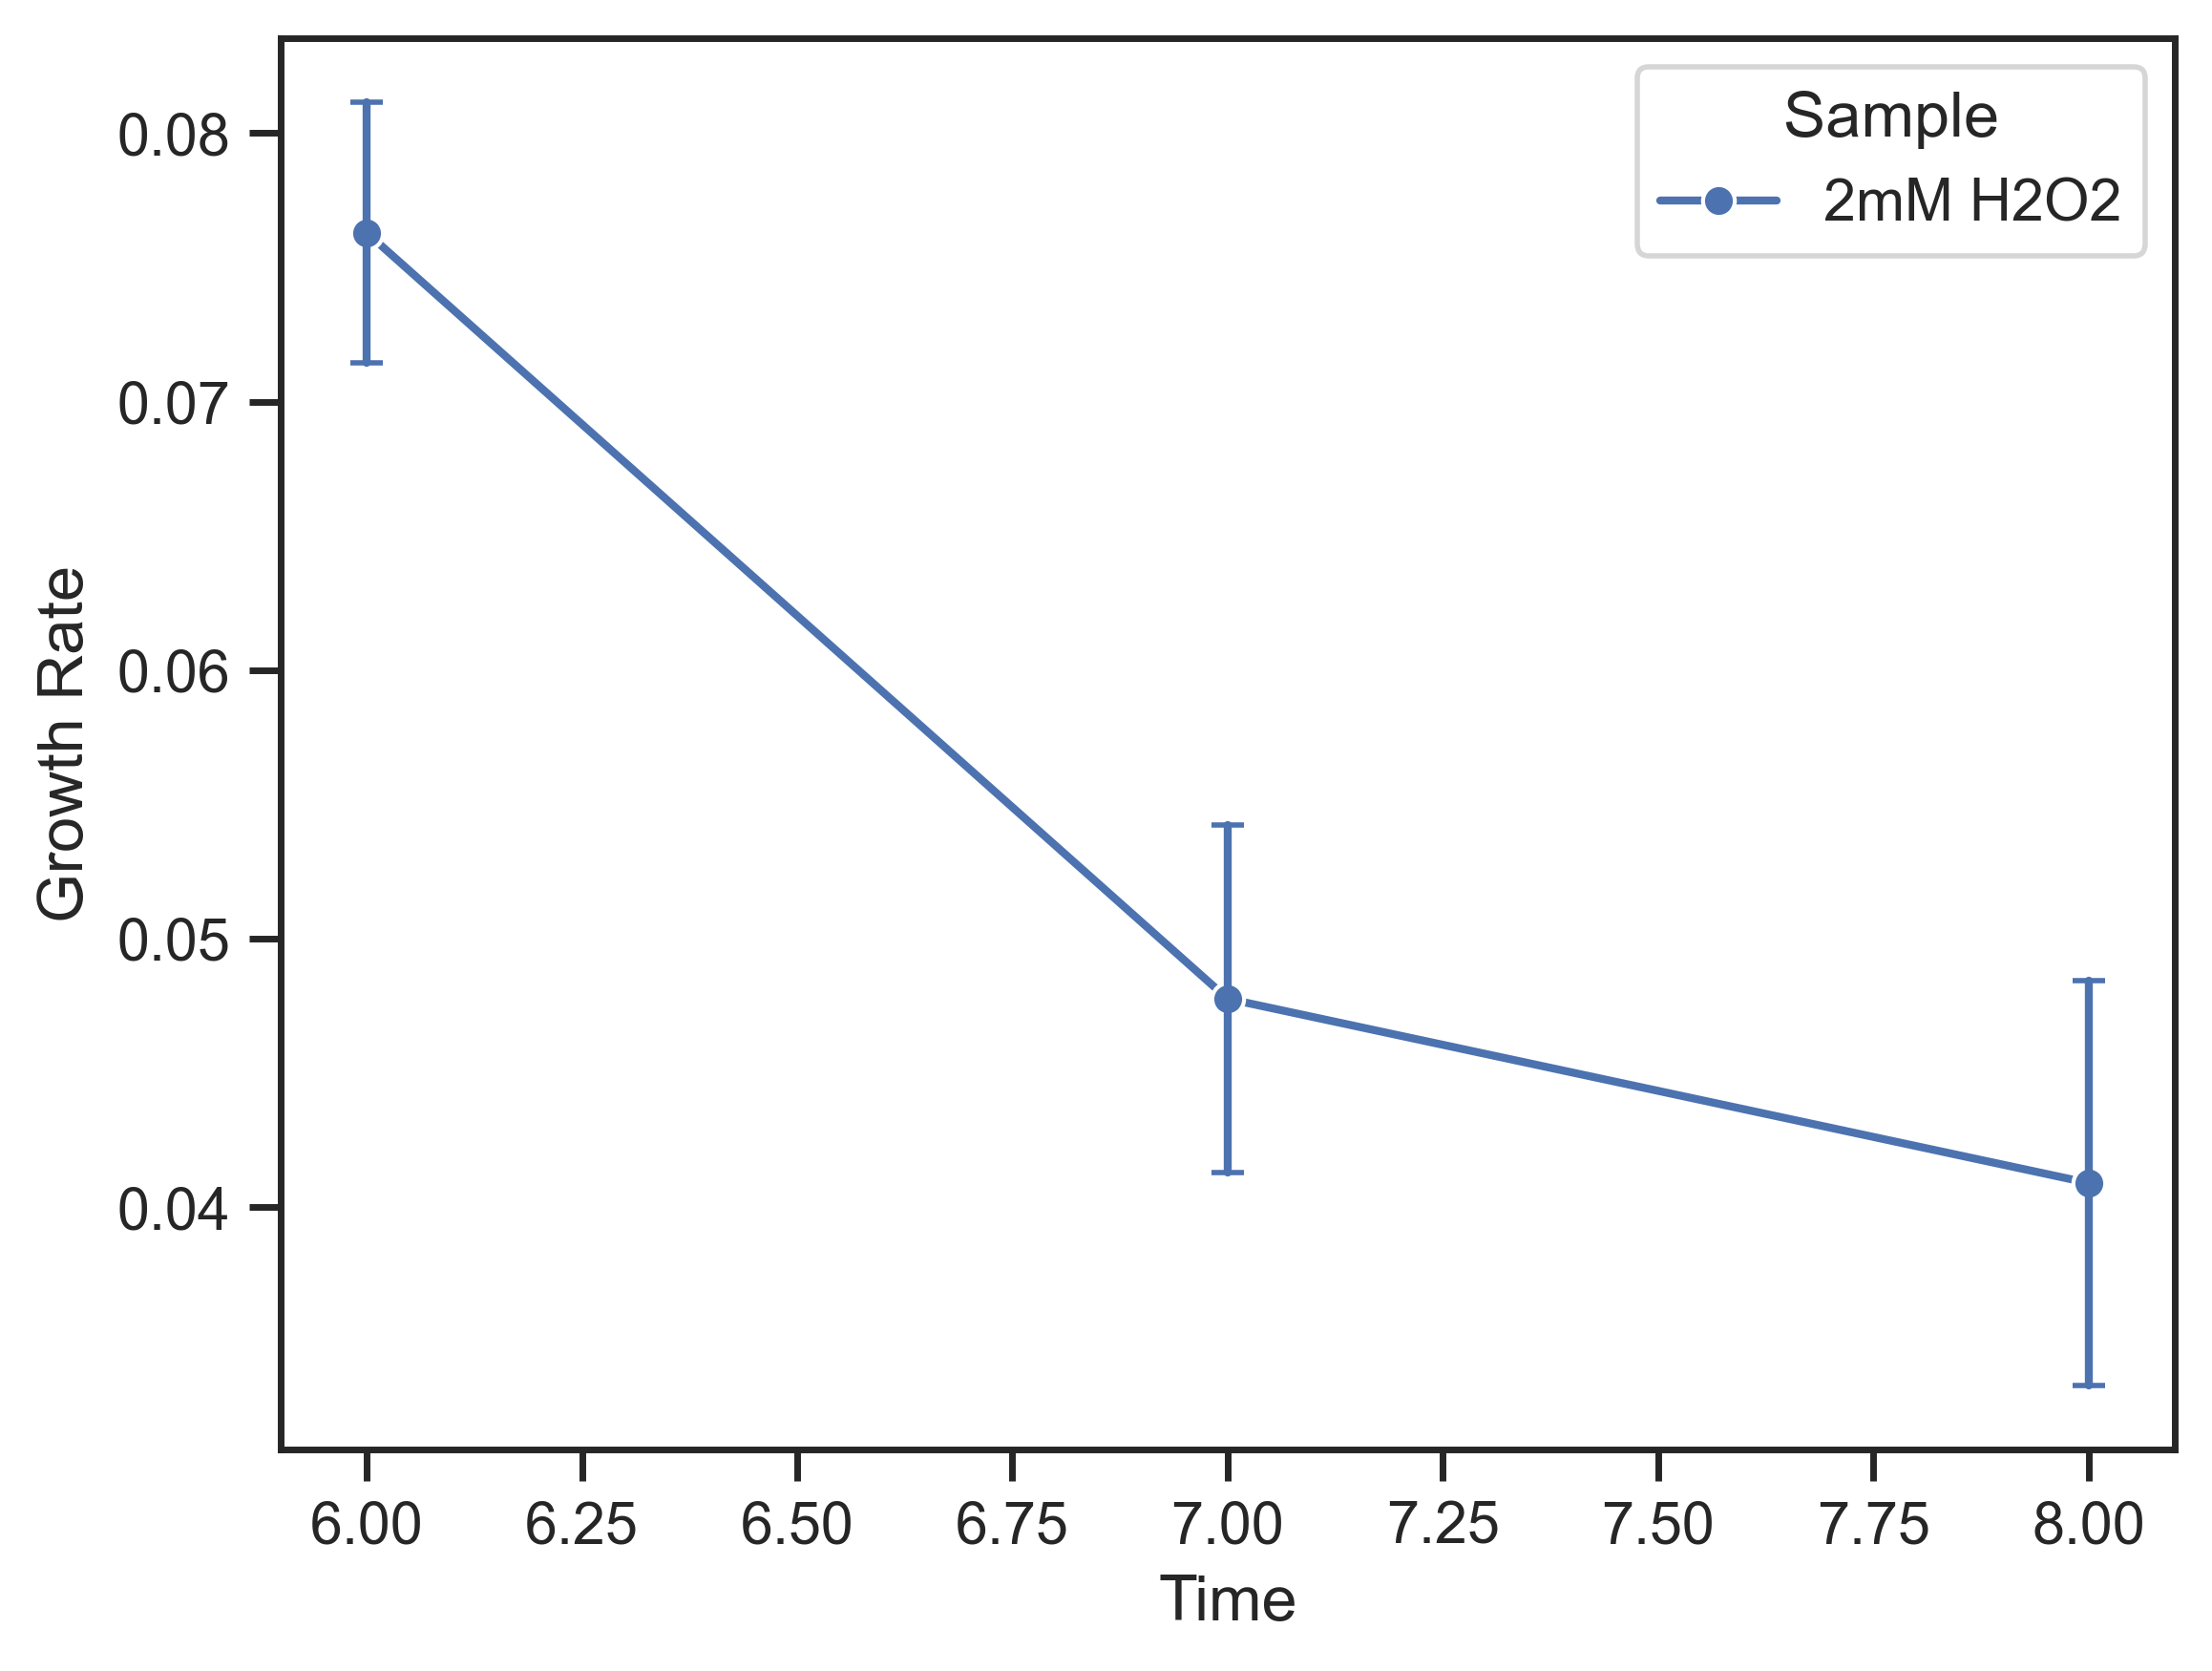

In [488]:
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")
ax=sns.lineplot(data=HP2,x="Time",y="Growth Rate",hue="Sample",errorbar="sd",marker="o",err_style="bars",err_kws={'capsize': 3})
plt.show()

In [489]:
HP3=pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\jupyter_notebook_files\Practice\H2O2_GROWTH_RATE_INTERVAL.xlsx", sheet_name="Sheet3")
HP3.head()

Time  Growth Rate    Sample
0     9     0.072551  2mM H2O2
1    10     0.011957  2mM H2O2
2    11     0.020330  2mM H2O2
3    12     0.041633  2mM H2O2
4     9    -0.005631  2mM H2O2

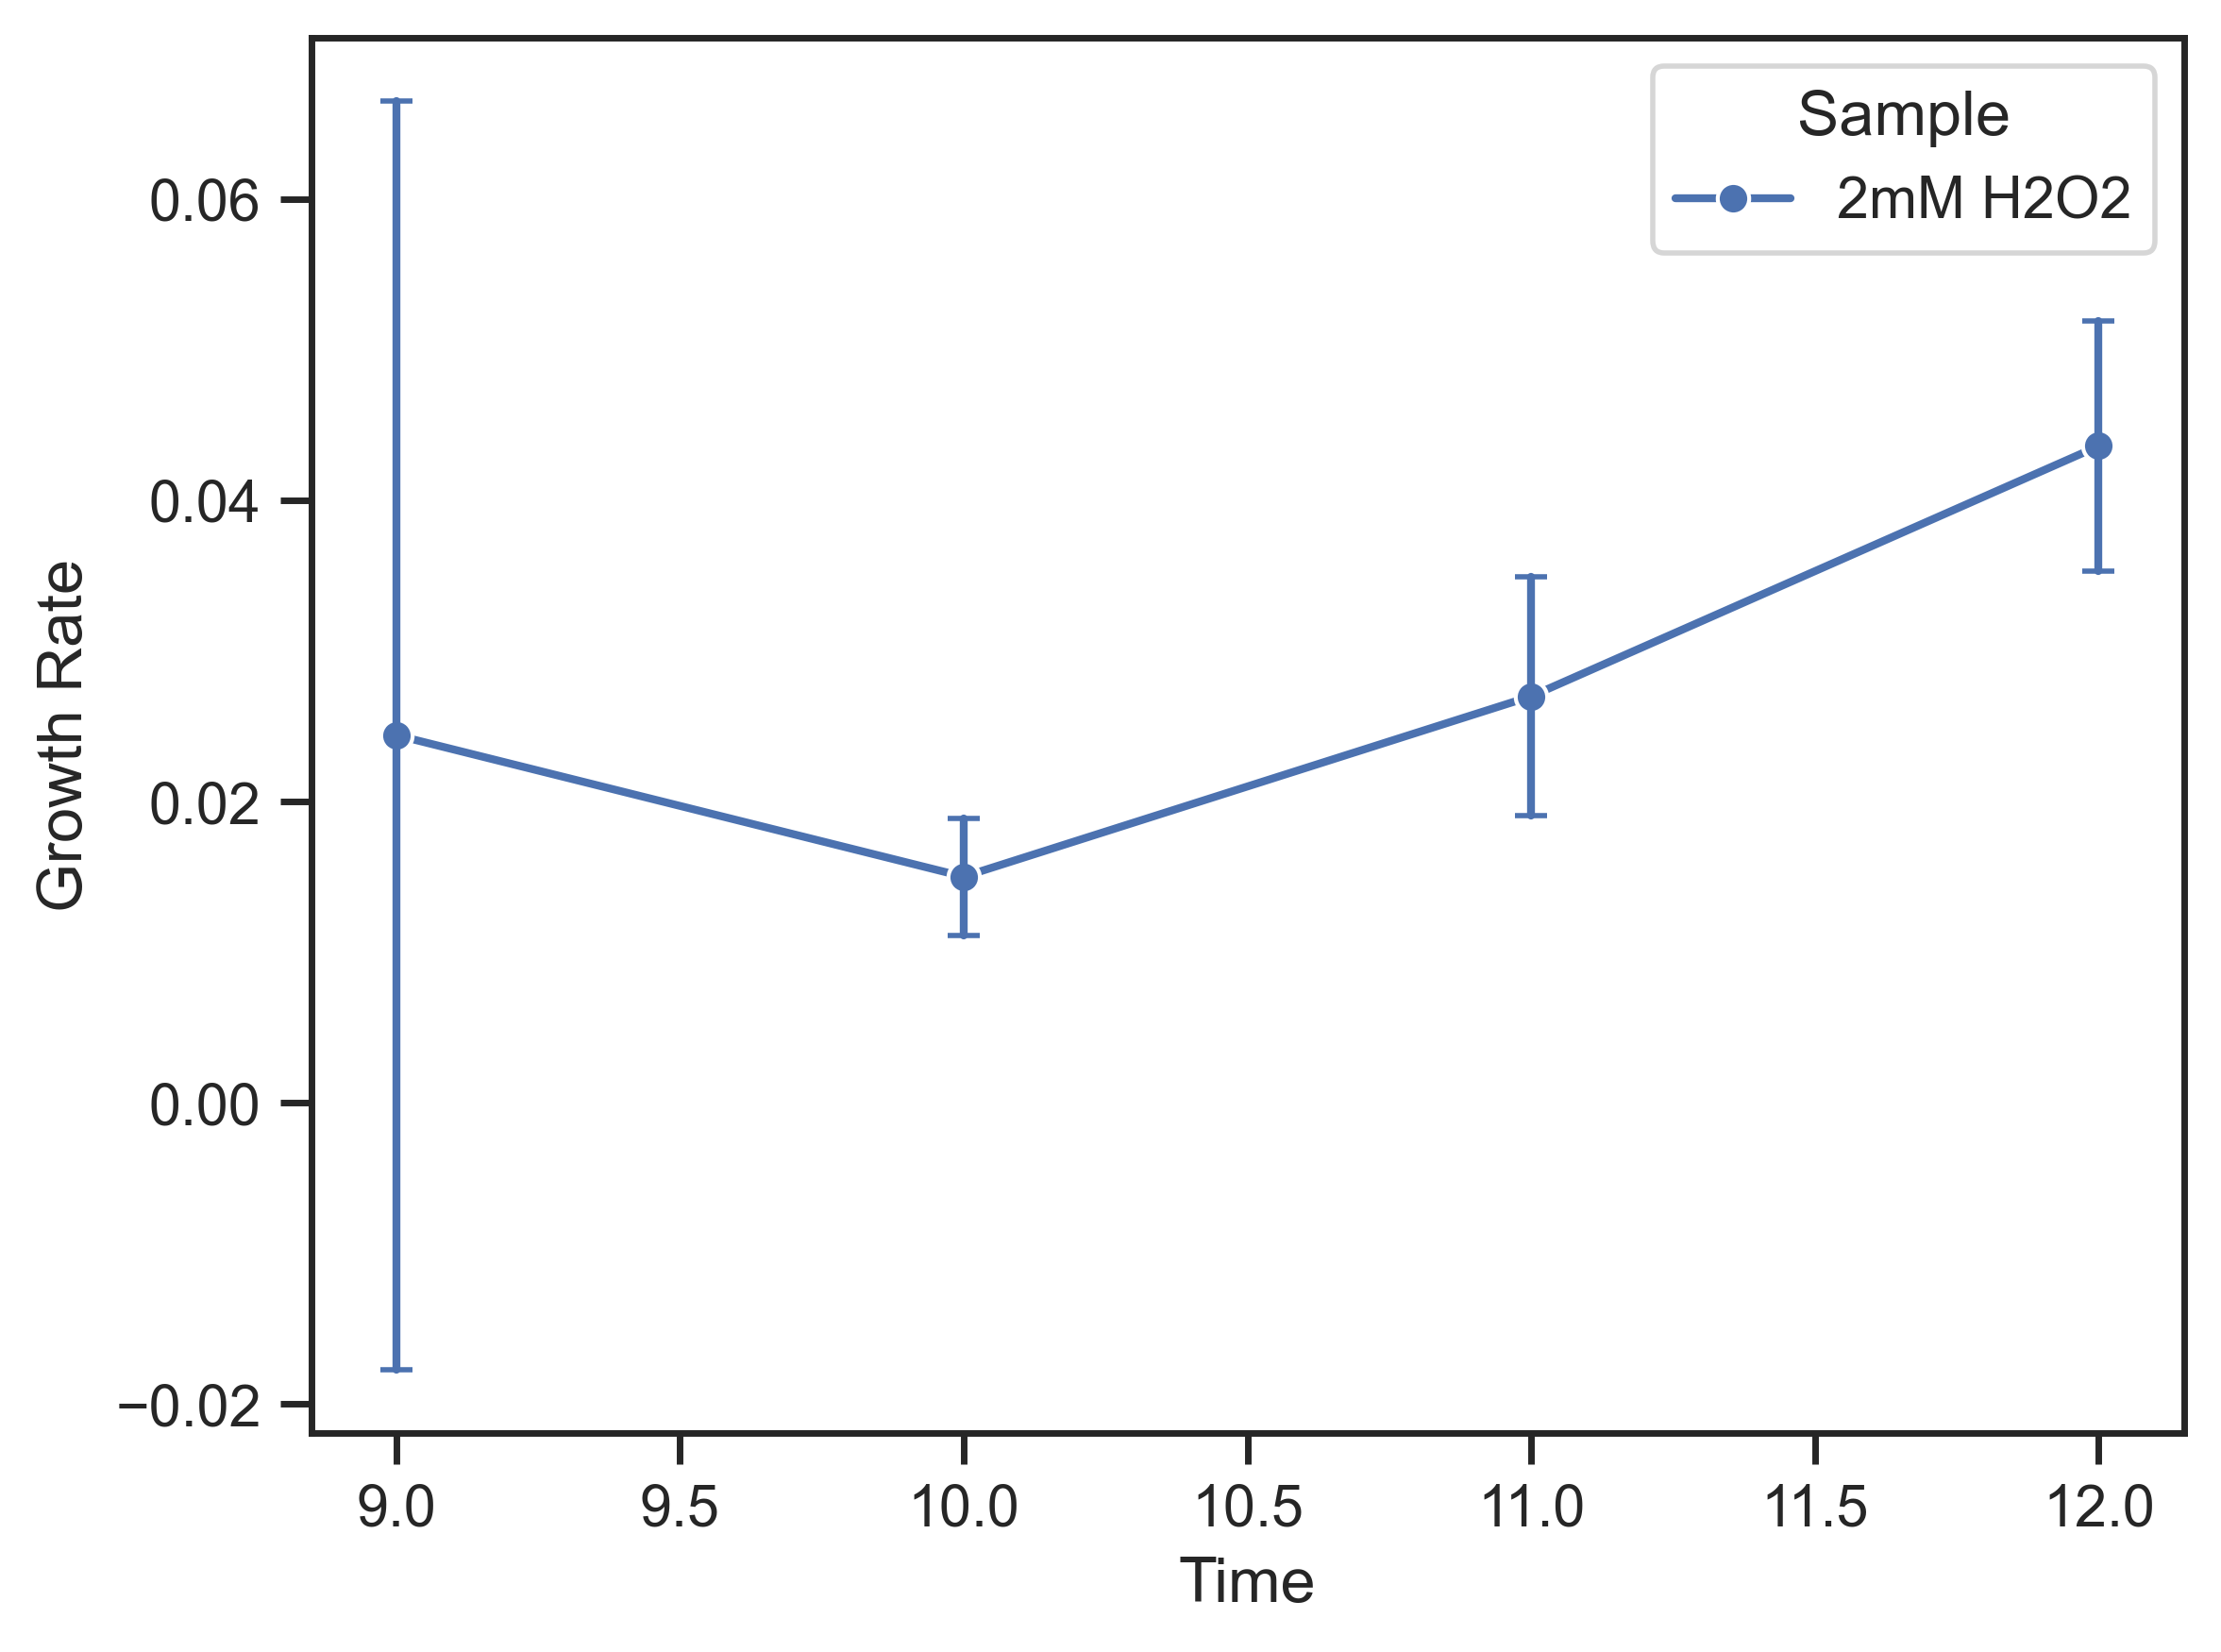

In [490]:
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")
ax=sns.lineplot(data=HP3,x="Time",y="Growth Rate",hue="Sample",errorbar="sd",marker="o",err_style="bars",err_kws={'capsize': 3})
plt.show()

<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:95: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\1235561103.py:95: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


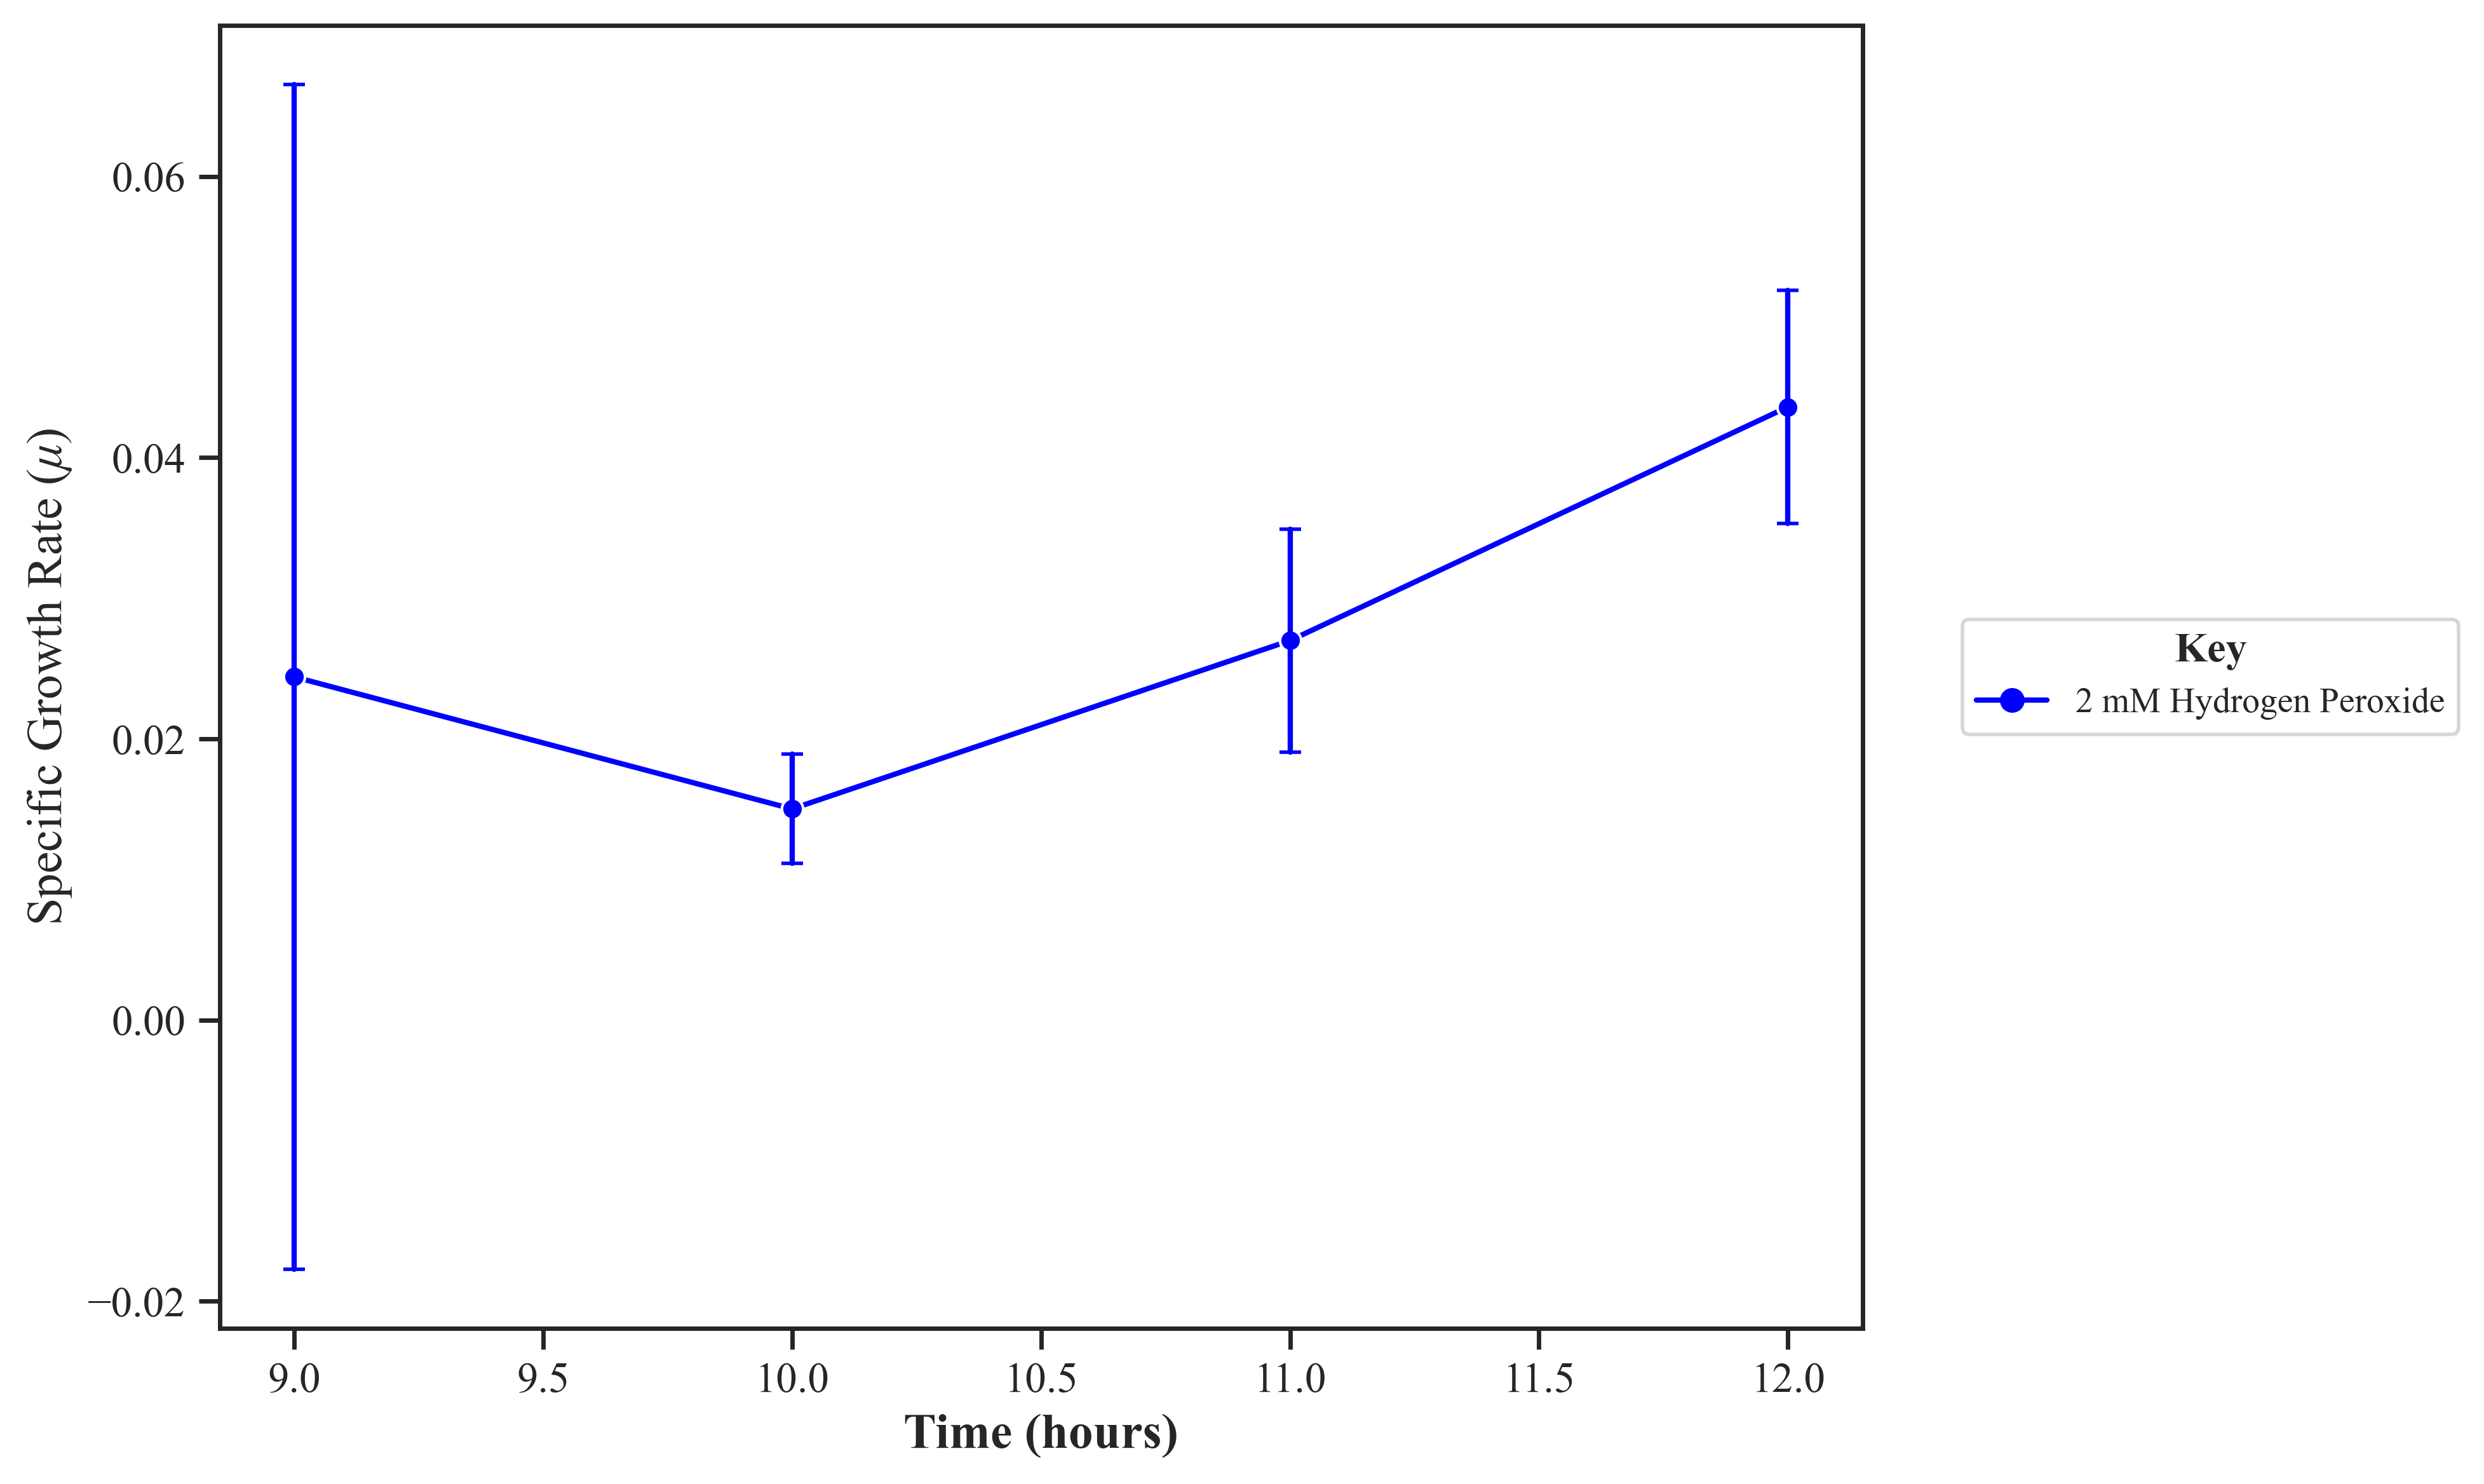

In [491]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

fig, ax = plt.subplots(figsize=(10, 6))
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# 2. Define custom settings
# Define the *single* sample ID you want to plot
TARGET_SAMPLE_ID = '2mM H2O2' # <--- CUSTOMIZATION POINT: Change this to 'B', 'C', 'D', or 'E'

# Define the descriptive labels for your samples
sample_name_mapping = {
    '2mM H2O2': '2 mM Hydrogen Peroxide',
    
}

# Define the colors for the lines
custom_palette_map = {
    '2mM H2O2': 'blue'
}

# Get the specific color and descriptive name for the target sample
plot_color = custom_palette_map.get(TARGET_SAMPLE_ID, 'black')
descriptive_label = sample_name_mapping.get(TARGET_SAMPLE_ID, TARGET_SAMPLE_ID)

# 3. Filter the Data for the Target Sample
HP3_filtered = HP3[HP3['Sample'] == TARGET_SAMPLE_ID].copy()

if HP3_filtered.empty:
    print(f"Error: No data found for sample ID '{TARGET_SAMPLE_ID}'. Please check your HP3 DataFrame.")
    plt.close(fig) # Close the figure if there's an error
else:
    # 4. Generate the Seaborn Lineplot (Single line plot)
    sns.lineplot(
        data=HP3_filtered,
        x="Time",
        y="Growth Rate",
        # NOTE: 'hue' is removed since we only plot one sample
        errorbar="sd",
        marker="o",
        err_style="bars",
        err_kws={'capsize': 3},
        color=plot_color,       # Use the specific color
        legend=False,           
        ax=ax                   
    )

    # 5. Custom Legend Generation (Simplified for one entry)
    handles = []
    labels = []
    
    # Create the single legend entry using the descriptive label
    handle = ax.plot([], [], color=plot_color, marker='o', label=descriptive_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(descriptive_label)

    # Add the custom legend to the plot (outside the plot area)
    legend=ax.legend(
        handles,
        labels,
        title='Key',
        loc='center left',
        bbox_to_anchor=(1.05, 0.5), # Place legend outside plot area
        frameon=True,
        fontsize=10,
        title_fontsize=12
    )

    # --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
    # 6. Custom X and Y Axis Labels
    ax.set_xlabel('Time (hours)', fontsize=14, fontweight='bold',fontfamily='Times New Roman')
    # Custom Y-label using Matplotlib's raw text for subscripts
    ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


    # 7. Final Plot Aesthetics
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Update the title to reflect the single sample being plotted
 

    # Ensure everything fits nicely
    plt.tight_layout()
    plt.savefig('Specific_Growth_rate_9_12', dpi=400,bbox_inches='tight')
    plt.show()

<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:95: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\1355100917.py:95: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


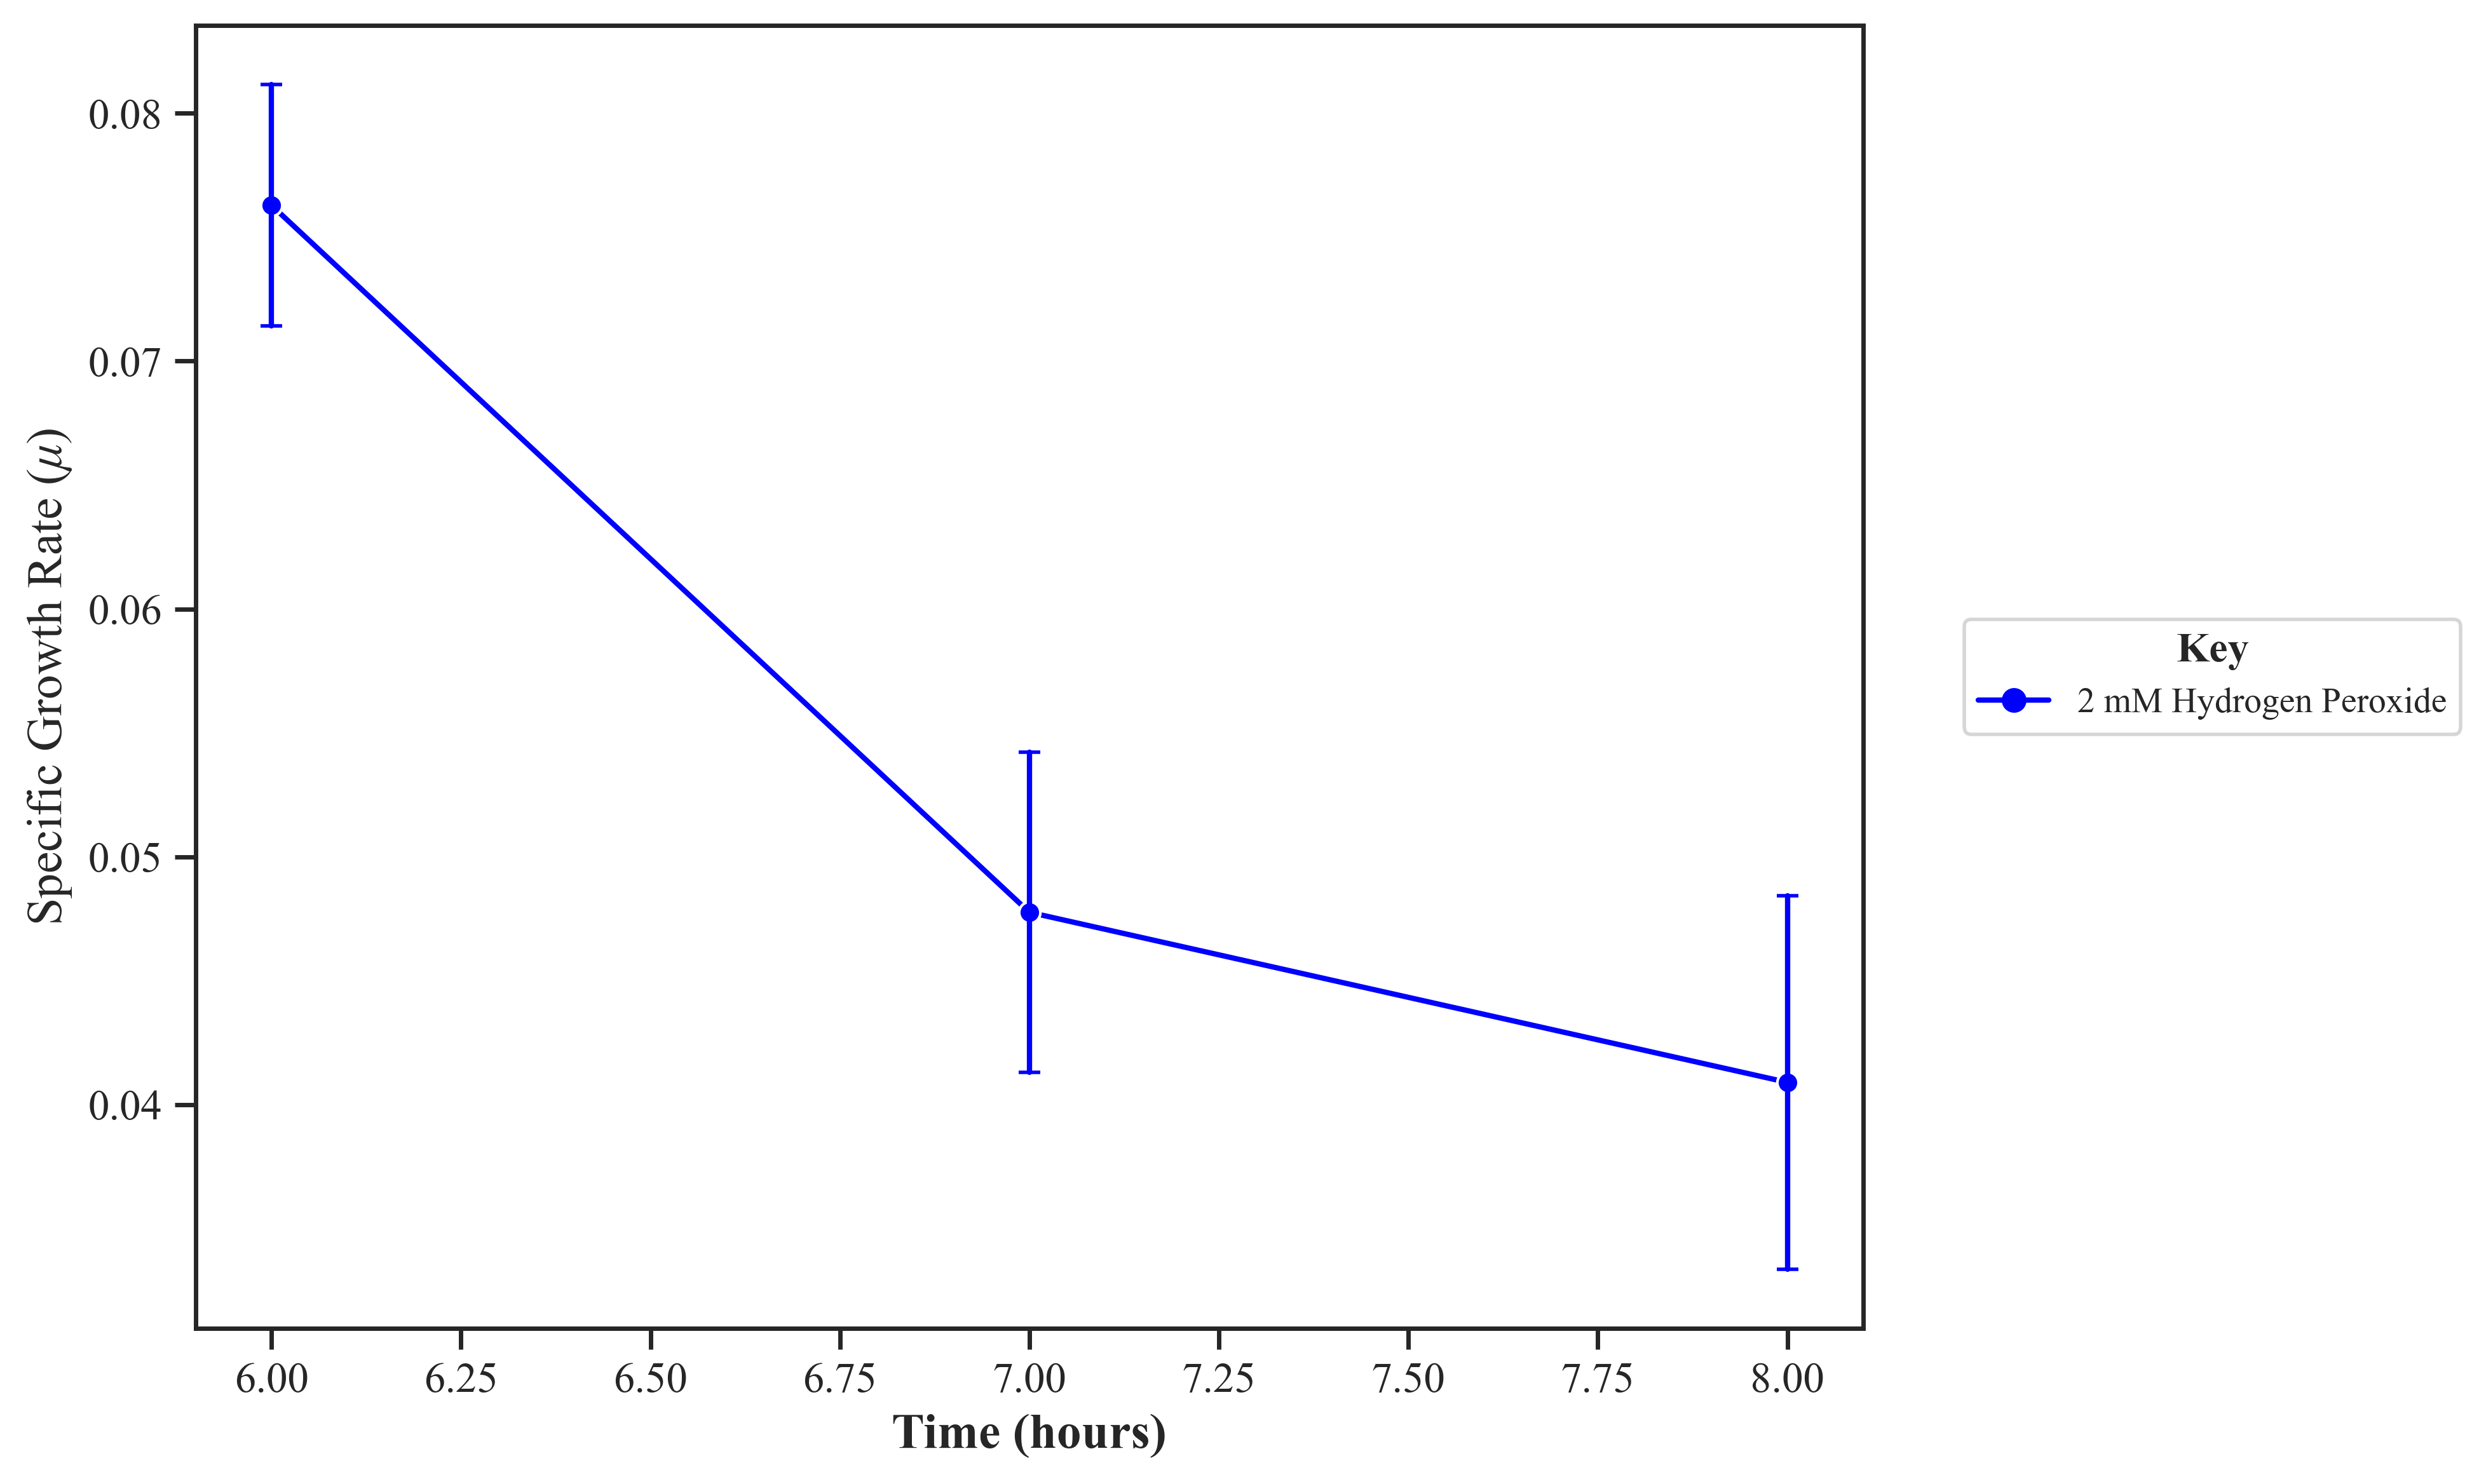

In [492]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

fig, ax = plt.subplots(figsize=(10, 6))
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# 2. Define custom settings
# Define the *single* sample ID you want to plot
TARGET_SAMPLE_ID = '2mM H2O2' # <--- CUSTOMIZATION POINT: Change this to 'B', 'C', 'D', or 'E'

# Define the descriptive labels for your samples
sample_name_mapping = {
    '2mM H2O2': '2 mM Hydrogen Peroxide',
    
}

# Define the colors for the lines
custom_palette_map = {
    '2mM H2O2': 'blue'
}

# Get the specific color and descriptive name for the target sample
plot_color = custom_palette_map.get(TARGET_SAMPLE_ID, 'black')
descriptive_label = sample_name_mapping.get(TARGET_SAMPLE_ID, TARGET_SAMPLE_ID)

# 3. Filter the Data for the Target Sample
HP2_filtered = HP2[HP2['Sample'] == TARGET_SAMPLE_ID].copy()

if HP2_filtered.empty:
    print(f"Error: No data found for sample ID '{TARGET_SAMPLE_ID}'. Please check your HP3 DataFrame.")
    plt.close(fig) # Close the figure if there's an error
else:
    # 4. Generate the Seaborn Lineplot (Single line plot)
    sns.lineplot(
        data=HP2_filtered,
        x="Time",
        y="Growth Rate",
        # NOTE: 'hue' is removed since we only plot one sample
        errorbar="sd",
        marker="o",
        err_style="bars",
        err_kws={'capsize': 3},
        color=plot_color,       # Use the specific color
        legend=False,           
        ax=ax                   
    )

    # 5. Custom Legend Generation (Simplified for one entry)
    handles = []
    labels = []
    
    # Create the single legend entry using the descriptive label
    handle = ax.plot([], [], color=plot_color, marker='o', label=descriptive_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(descriptive_label)

    # Add the custom legend to the plot (outside the plot area)
    legend=ax.legend(
        handles,
        labels,
        title='Key',
        loc='center left',
        bbox_to_anchor=(1.05, 0.5), # Place legend outside plot area
        frameon=True,
        fontsize=10,
        title_fontsize=12
    )

    # --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
    # 6. Custom X and Y Axis Labels
    ax.set_xlabel('Time (hours)', fontsize=14, fontweight='bold',fontfamily='Times New Roman')
    # Custom Y-label using Matplotlib's raw text for subscripts
    ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


    # 7. Final Plot Aesthetics
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Update the title to reflect the single sample being plotted
 

    # Ensure everything fits nicely
    plt.tight_layout()
    plt.savefig('Specific_Growth_rate_6_8', dpi=400,bbox_inches='tight')
    plt.show()

<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:95: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\3196597383.py:95: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


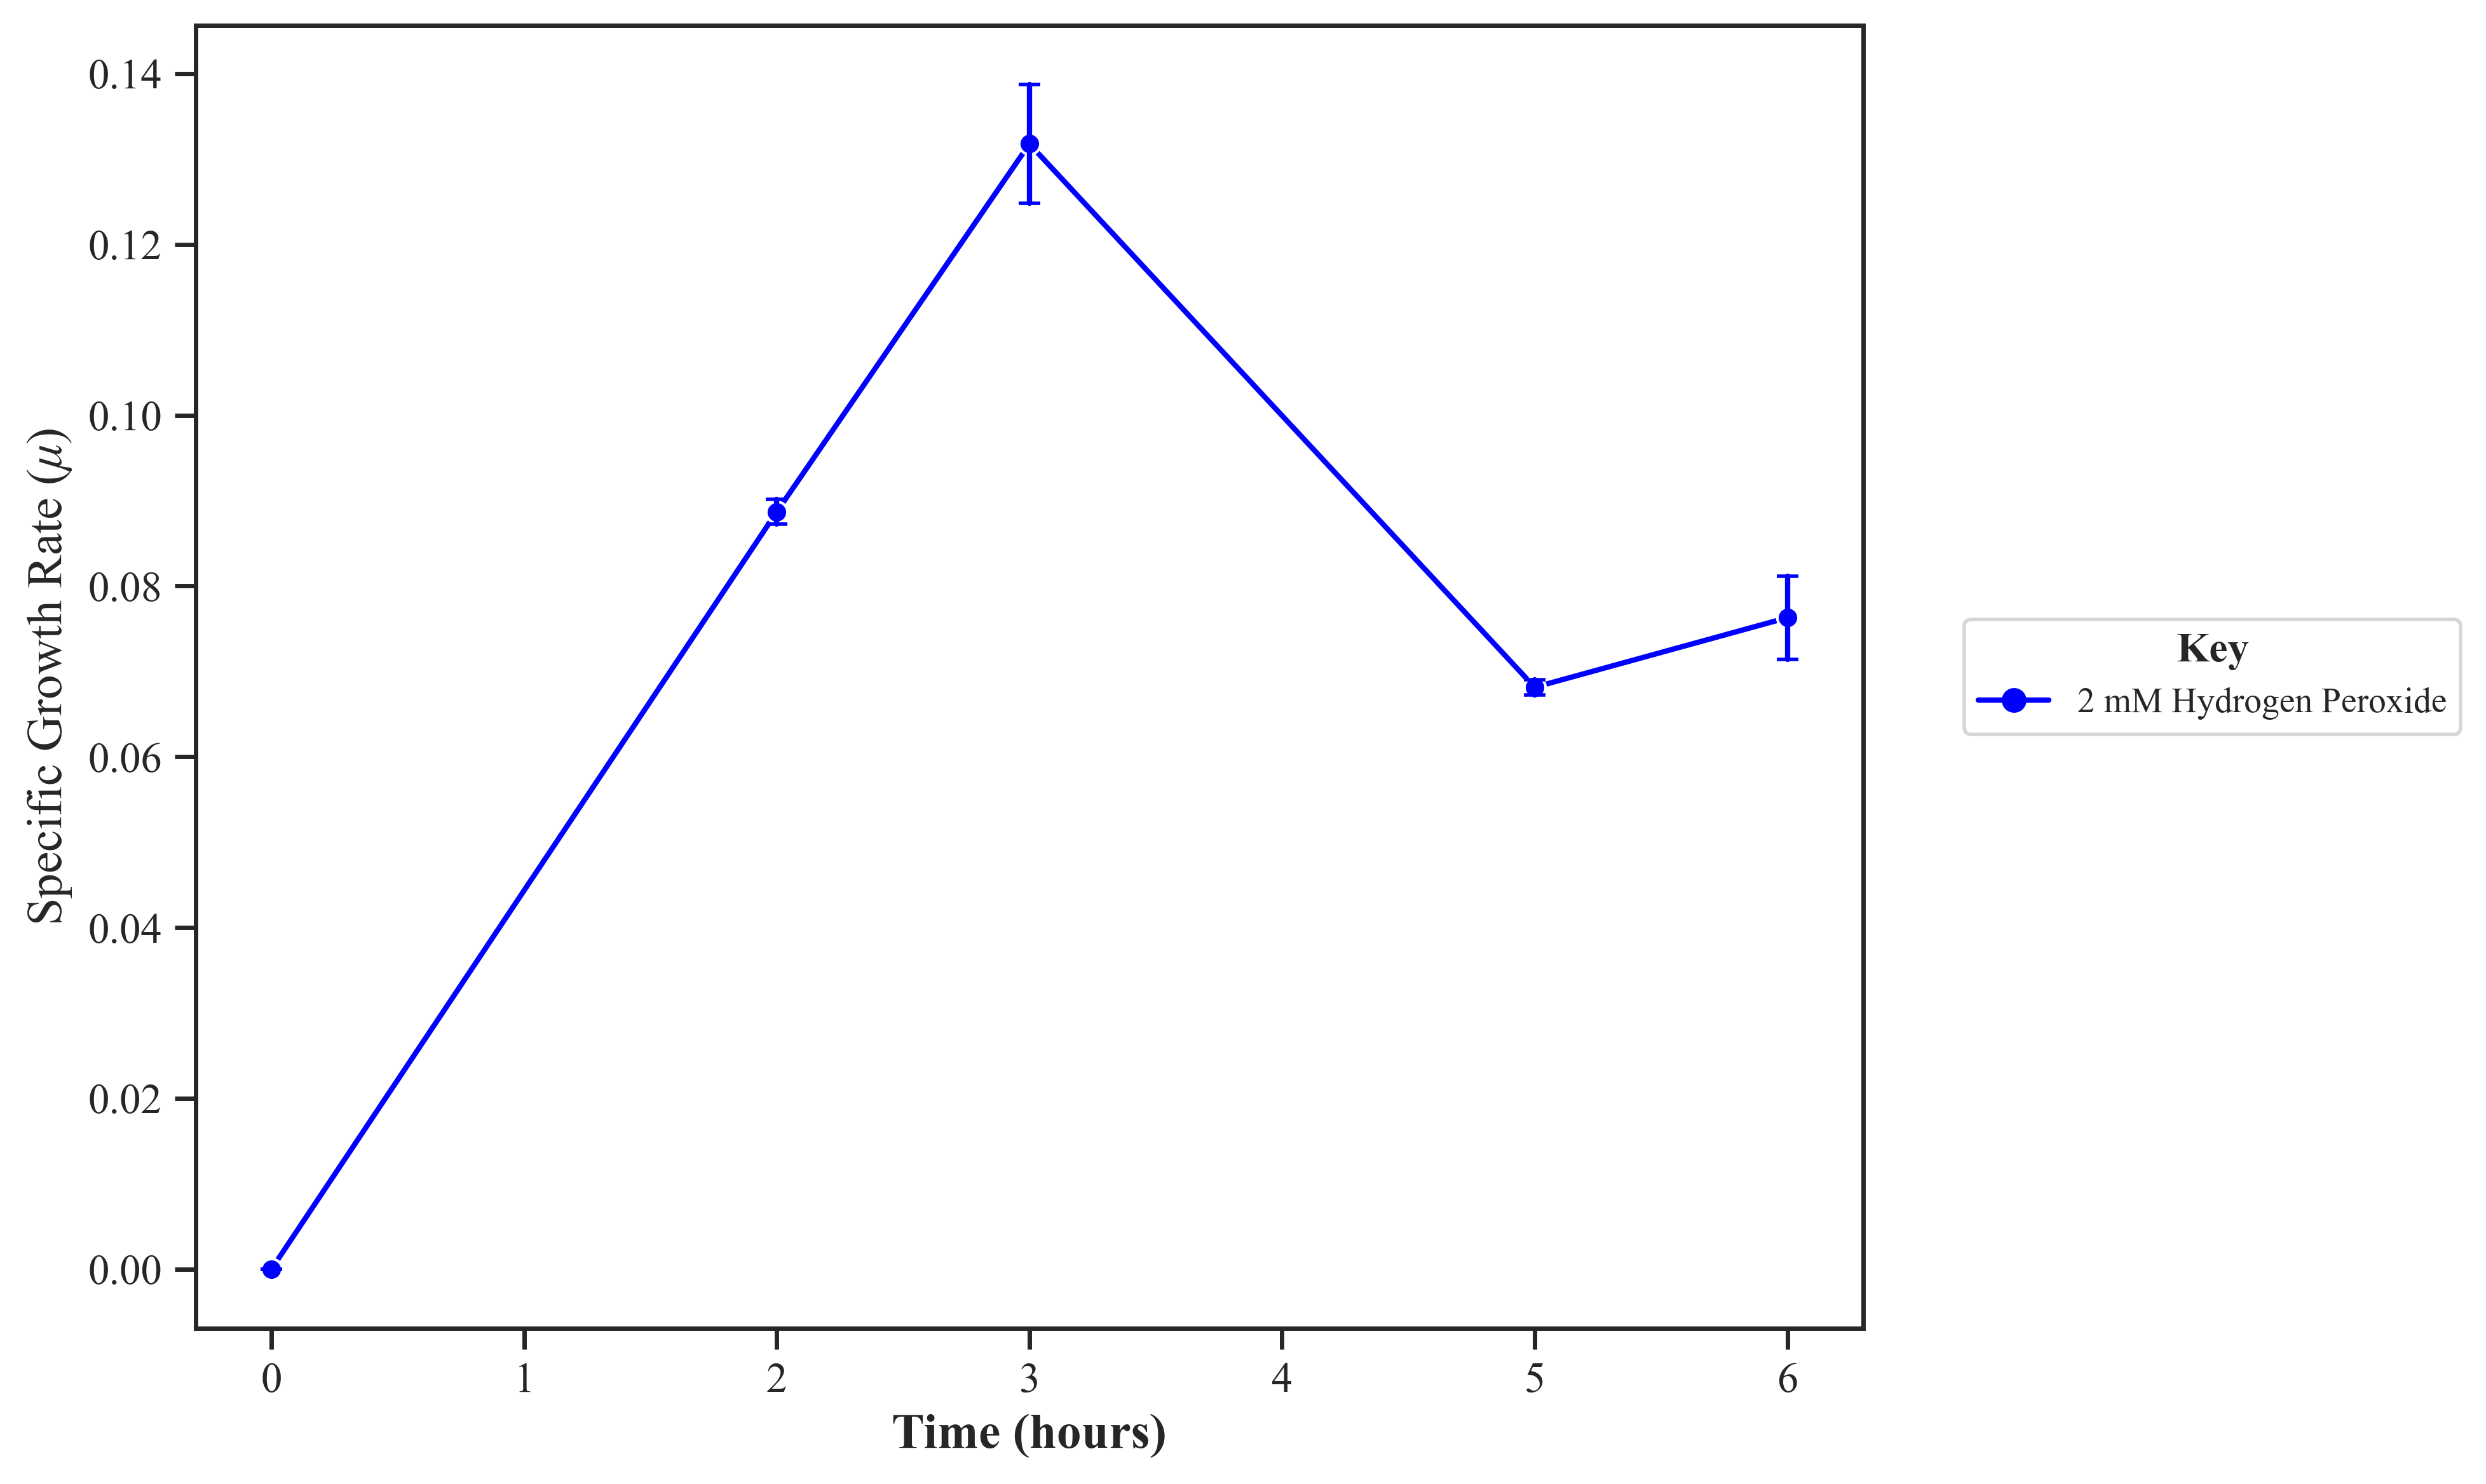

In [493]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

fig, ax = plt.subplots(figsize=(10, 6))
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# 2. Define custom settings
# Define the *single* sample ID you want to plot
TARGET_SAMPLE_ID = '2mM H2O2' # <--- CUSTOMIZATION POINT: Change this to 'B', 'C', 'D', or 'E'

# Define the descriptive labels for your samples
sample_name_mapping = {
    '2mM H2O2': '2 mM Hydrogen Peroxide',
    
}

# Define the colors for the lines
custom_palette_map = {
    '2mM H2O2': 'blue'
}

# Get the specific color and descriptive name for the target sample
plot_color = custom_palette_map.get(TARGET_SAMPLE_ID, 'black')
descriptive_label = sample_name_mapping.get(TARGET_SAMPLE_ID, TARGET_SAMPLE_ID)

# 3. Filter the Data for the Target Sample
HP1_filtered = HP1[HP1['Sample'] == TARGET_SAMPLE_ID].copy()

if HP1_filtered.empty:
    print(f"Error: No data found for sample ID '{TARGET_SAMPLE_ID}'. Please check your HP3 DataFrame.")
    plt.close(fig) # Close the figure if there's an error
else:
    # 4. Generate the Seaborn Lineplot (Single line plot)
    sns.lineplot(
        data=HP1_filtered,
        x="Time",
        y="Growth Rate",
        # NOTE: 'hue' is removed since we only plot one sample
        errorbar="sd",
        marker="o",
        err_style="bars",
        err_kws={'capsize': 3},
        color=plot_color,       # Use the specific color
        legend=False,           
        ax=ax                   
    )

    # 5. Custom Legend Generation (Simplified for one entry)
    handles = []
    labels = []
    
    # Create the single legend entry using the descriptive label
    handle = ax.plot([], [], color=plot_color, marker='o', label=descriptive_label, linestyle='-')[0]
    handles.append(handle)
    labels.append(descriptive_label)

    # Add the custom legend to the plot (outside the plot area)
    legend=ax.legend(
        handles,
        labels,
        title='Key',
        loc='center left',
        bbox_to_anchor=(1.05, 0.5), # Place legend outside plot area
        frameon=True,
        fontsize=10,
        title_fontsize=12
    )

    # --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
    # 6. Custom X and Y Axis Labels
    ax.set_xlabel('Time (hours)', fontsize=14, fontweight='bold',fontfamily='Times New Roman')
    # Custom Y-label using Matplotlib's raw text for subscripts
    ax.set_ylabel('Specific Growth Rate ($\mu$)', fontsize=14,fontfamily='Times New Roman' )


    # 7. Final Plot Aesthetics
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Update the title to reflect the single sample being plotted
 

    # Ensure everything fits nicely
    plt.tight_layout()
    plt.savefig('Specific_Growth_rate_0_6', dpi=400,bbox_inches='tight')
    plt.show()

Looking at the interval growth rates across samples

<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\3519160080.py:71: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Growth Rate ($\mu$)', size=14,fontfamily='Times New Roman')


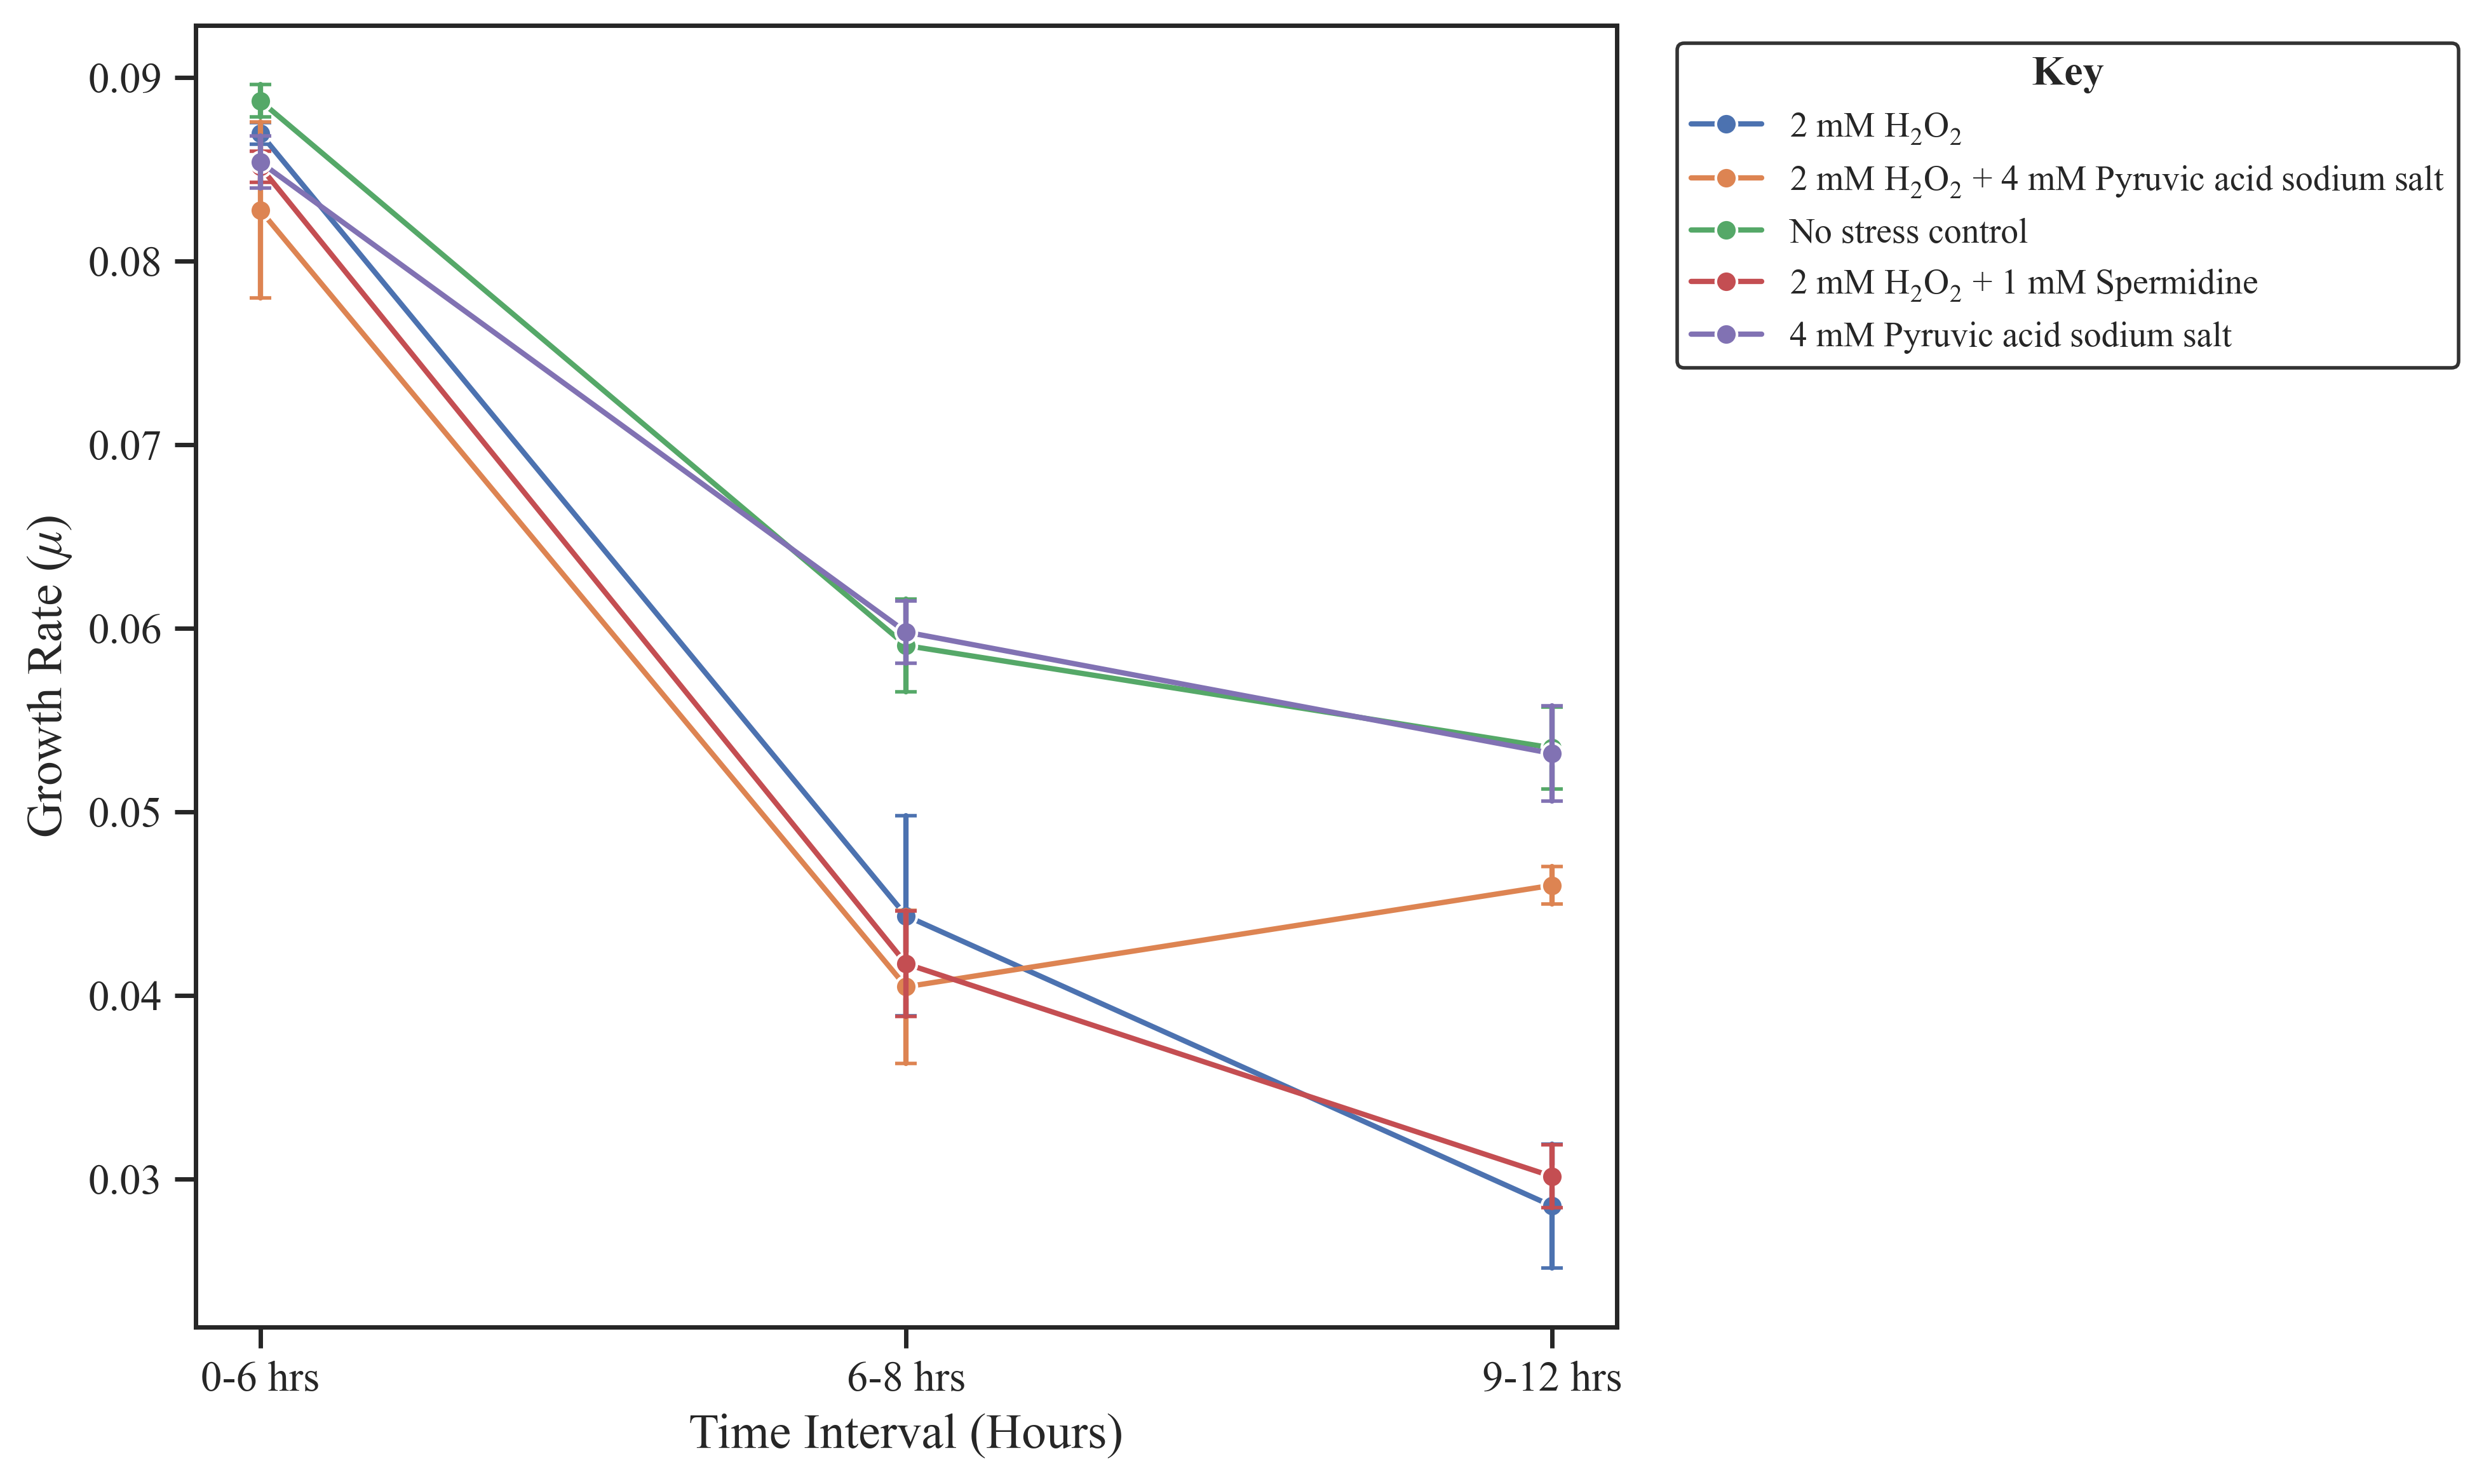

In [495]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

# Assuming Replicate_ID contains A1, B1, C1, etc.:
interval_rate['Main_Sample'] = interval_rate['Replicate_ID'].str[:-1]

# --- STEP 2: PLOT USING THE NEW 'Main_Sample' COLUMN FOR HUE ---
sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# The lineplot now uses 'Main_Sample' for 'hue', averaging all triplicates (A1, A2, A3) into one line (A).
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=interval_rate,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Main_Sample",  # <-- CRITICAL CHANGE
    errorbar="sd",
    marker="o",
    err_style="bars",
    err_kws={'capsize': 3}
)

# --- STEP 3: CUSTOMIZE LEGEND LABELS ---
# Now, 'labels' from ax.get_legend_handles_labels() will be 'A', 'B', 'C', etc.
handles, labels = ax.get_legend_handles_labels()

# Ensure the order of your new_labels matches the order of the unique Main_Sample values (A, B, C, D, E).
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt']

legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1), 
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)
# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---

plt.xlabel('Time Interval (Hours)', size=14,fontfamily='Times New Roman')
plt.ylabel('Growth Rate ($\mu$)', size=14,fontfamily='Times New Roman')

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

plt.tight_layout()
plt.savefig('Specific_Growth_rate_lineplot_all', dpi=400,bbox_inches='tight')
plt.show()

<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\3216370421.py:80: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Growth Rate  ($\mu$)', size=14,fontfamily='Times New Roman')


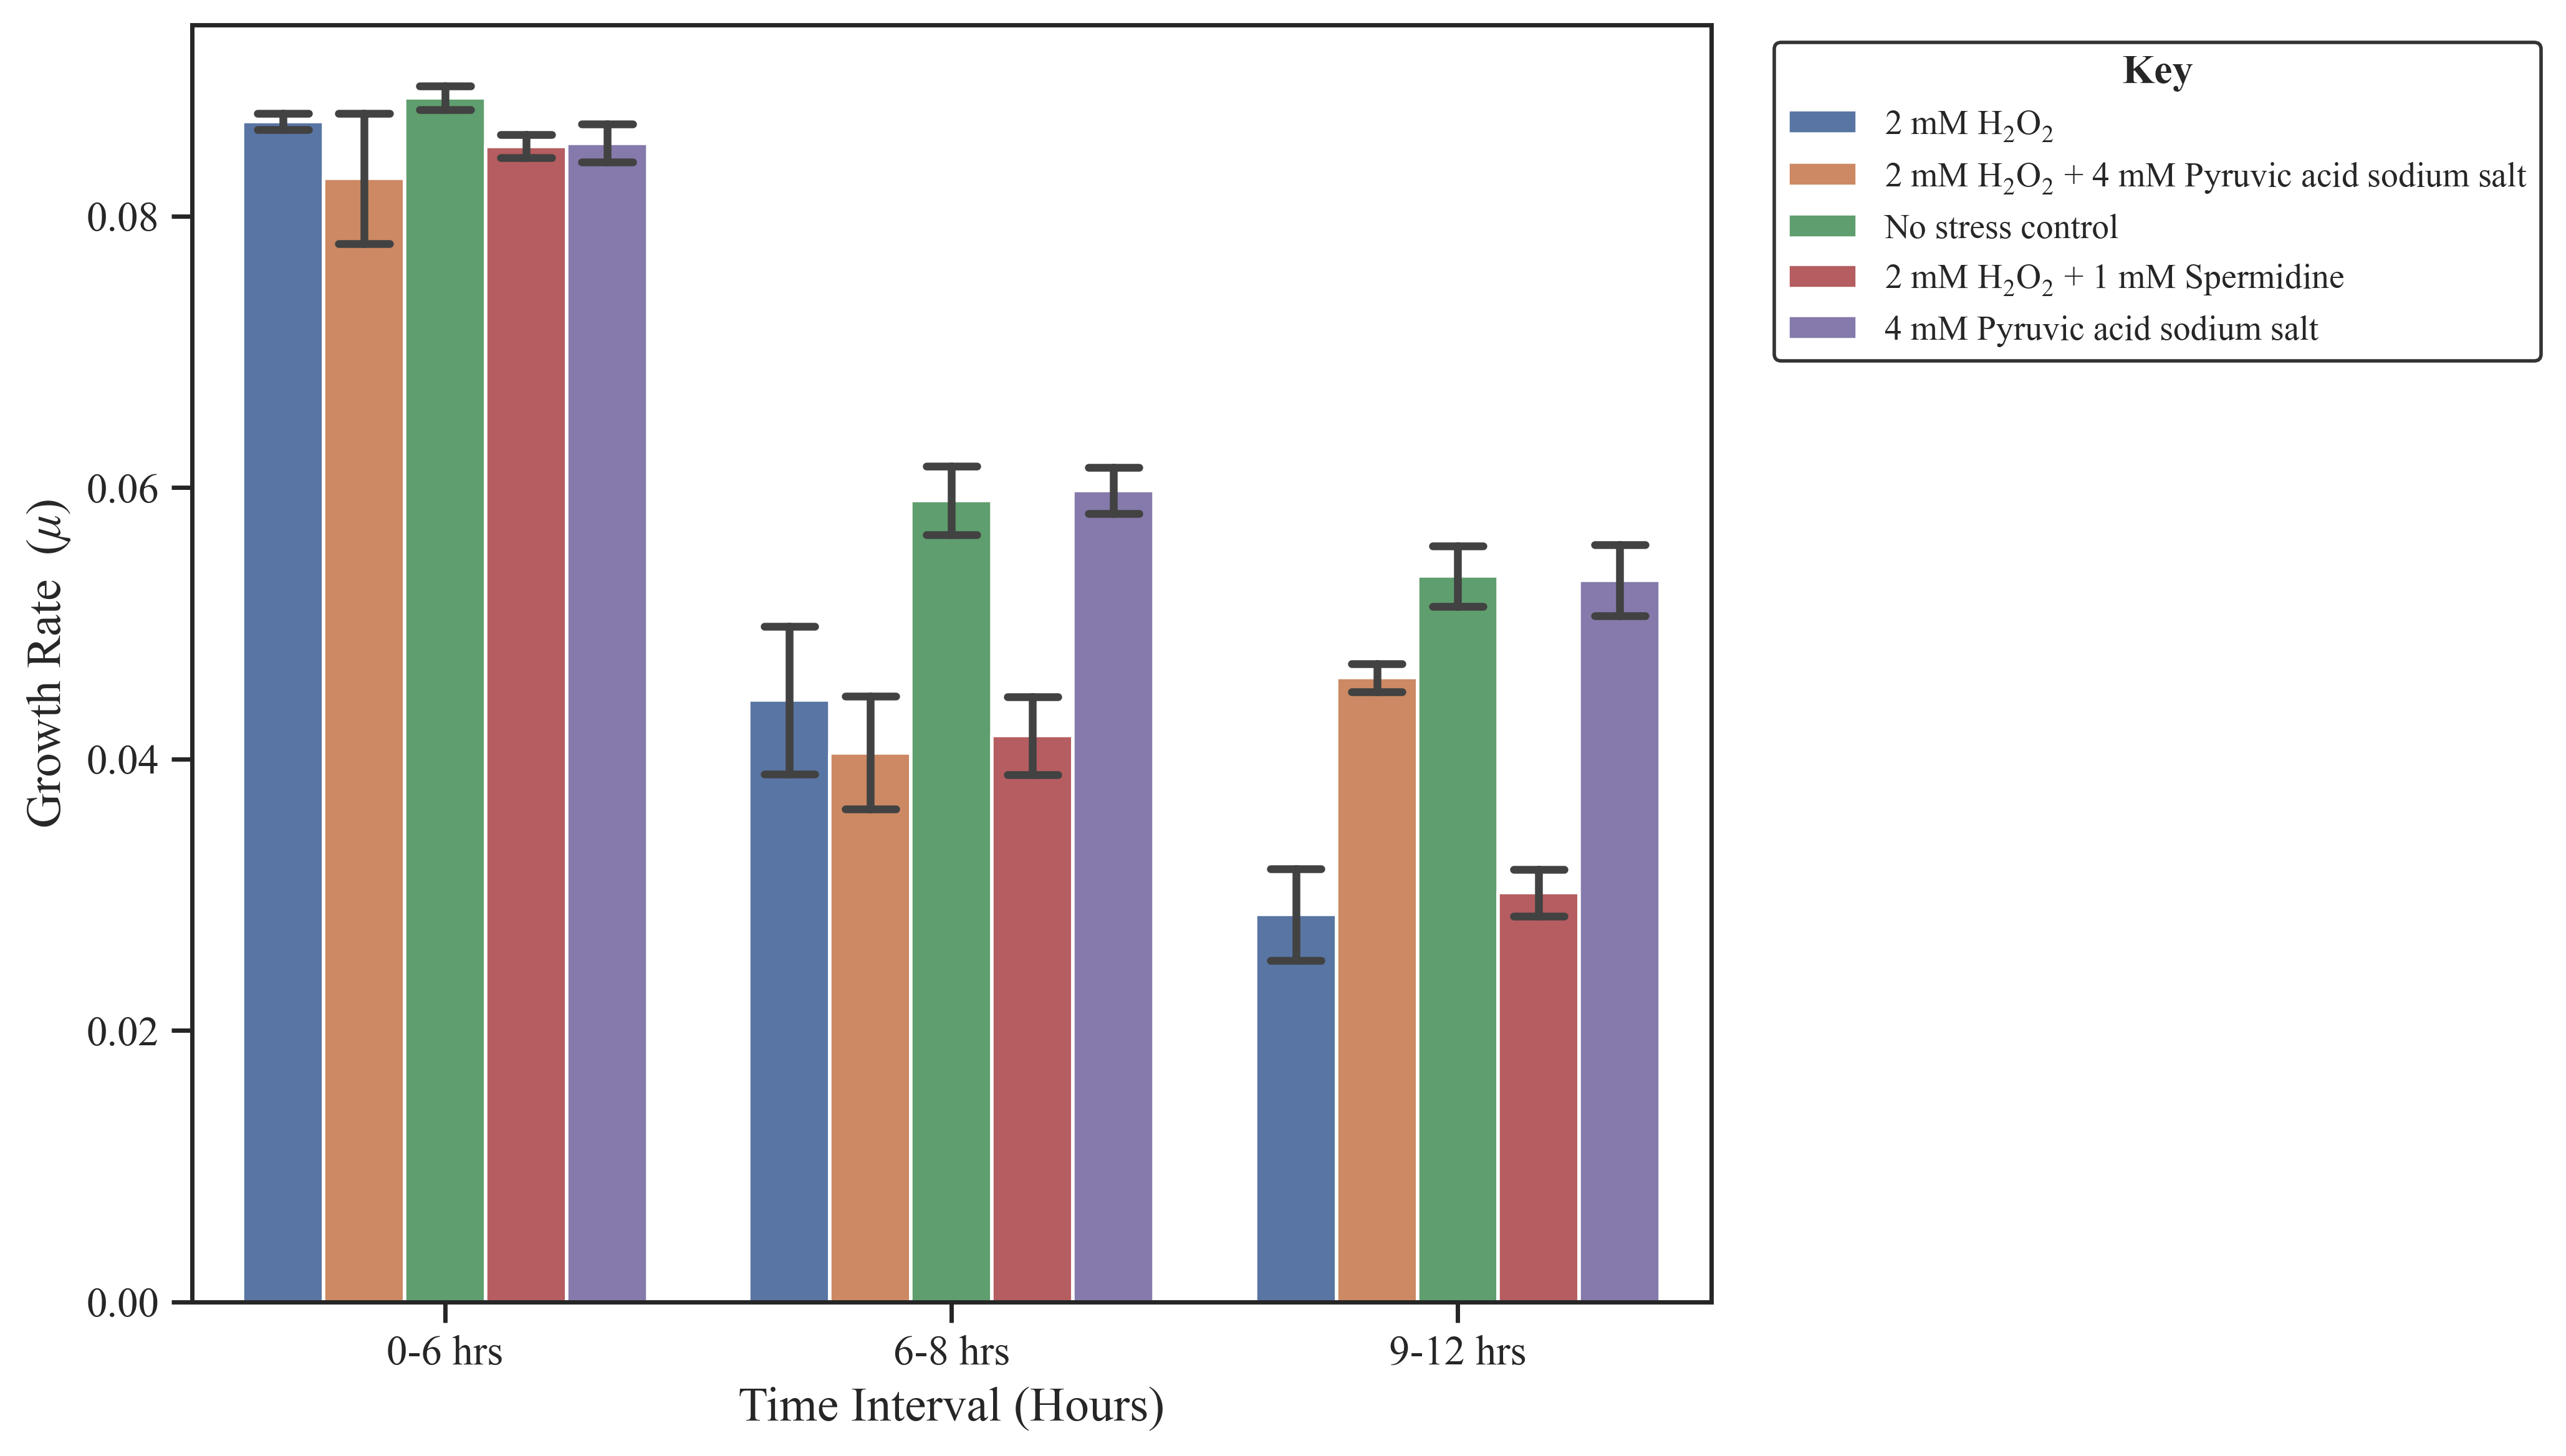

In [496]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

# DATA PREPARATION: Create a column to group triplicates 
# This assumes the main sample name is the Replicate_ID without the last character (the number).
if 'Main_Sample' not in interval_rate.columns and 'Replicate_ID' in interval_rate.columns:
    interval_rate['Main_Sample'] = interval_rate['Replicate_ID'].str[:-1]
elif 'Main_Sample' not in interval_rate.columns and 'Sample' in interval_rate.columns:
     # Fallback if the column is named 'Sample' (e.g., A1, B1)
    interval_rate['Main_Sample'] = interval_rate['Sample'].str[:-1]

# Define the order of your main groups for consistent plotting/legend
main_sample_order = sorted(interval_rate['Main_Sample'].unique())

plt.figure(figsize=(10, 6))

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# CRITICAL CHANGE: Use "Main_Sample" for hue to group triplicates (A1, A2, A3 -> A)
# The capsize argument is correctly passed directly to sns.barplot in this version.
ax = sns.barplot(
    data=interval_rate,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Main_Sample",  # Groups the triplicates
    hue_order=main_sample_order, # Ensures legend order matches 'new_labels'
    errorbar="sd",
    capsize=0.5
)


handles, labels = ax.get_legend_handles_labels()

# These labels must align with the order of 'main_sample_order' (A, B, C, D, E)
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'             # Corresponds to E
]

# Set the custom legend
legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)

# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---
plt.xlabel('Time Interval (Hours)', size=14,fontfamily='Times New Roman')
plt.ylabel('Growth Rate  ($\mu$)', size=14,fontfamily='Times New Roman')

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

plt.tight_layout(rect=[0, 0, 1.05, 1]) # Adjust layout to fit legend
plt.savefig('Growth_rate_barplot_specific_intervals', dpi=400,bbox_inches='tight')
plt.show() 

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\1074305587.py:77: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Growth Rate  ($\mu$)', size=14,fontfamily='Times New Roman')


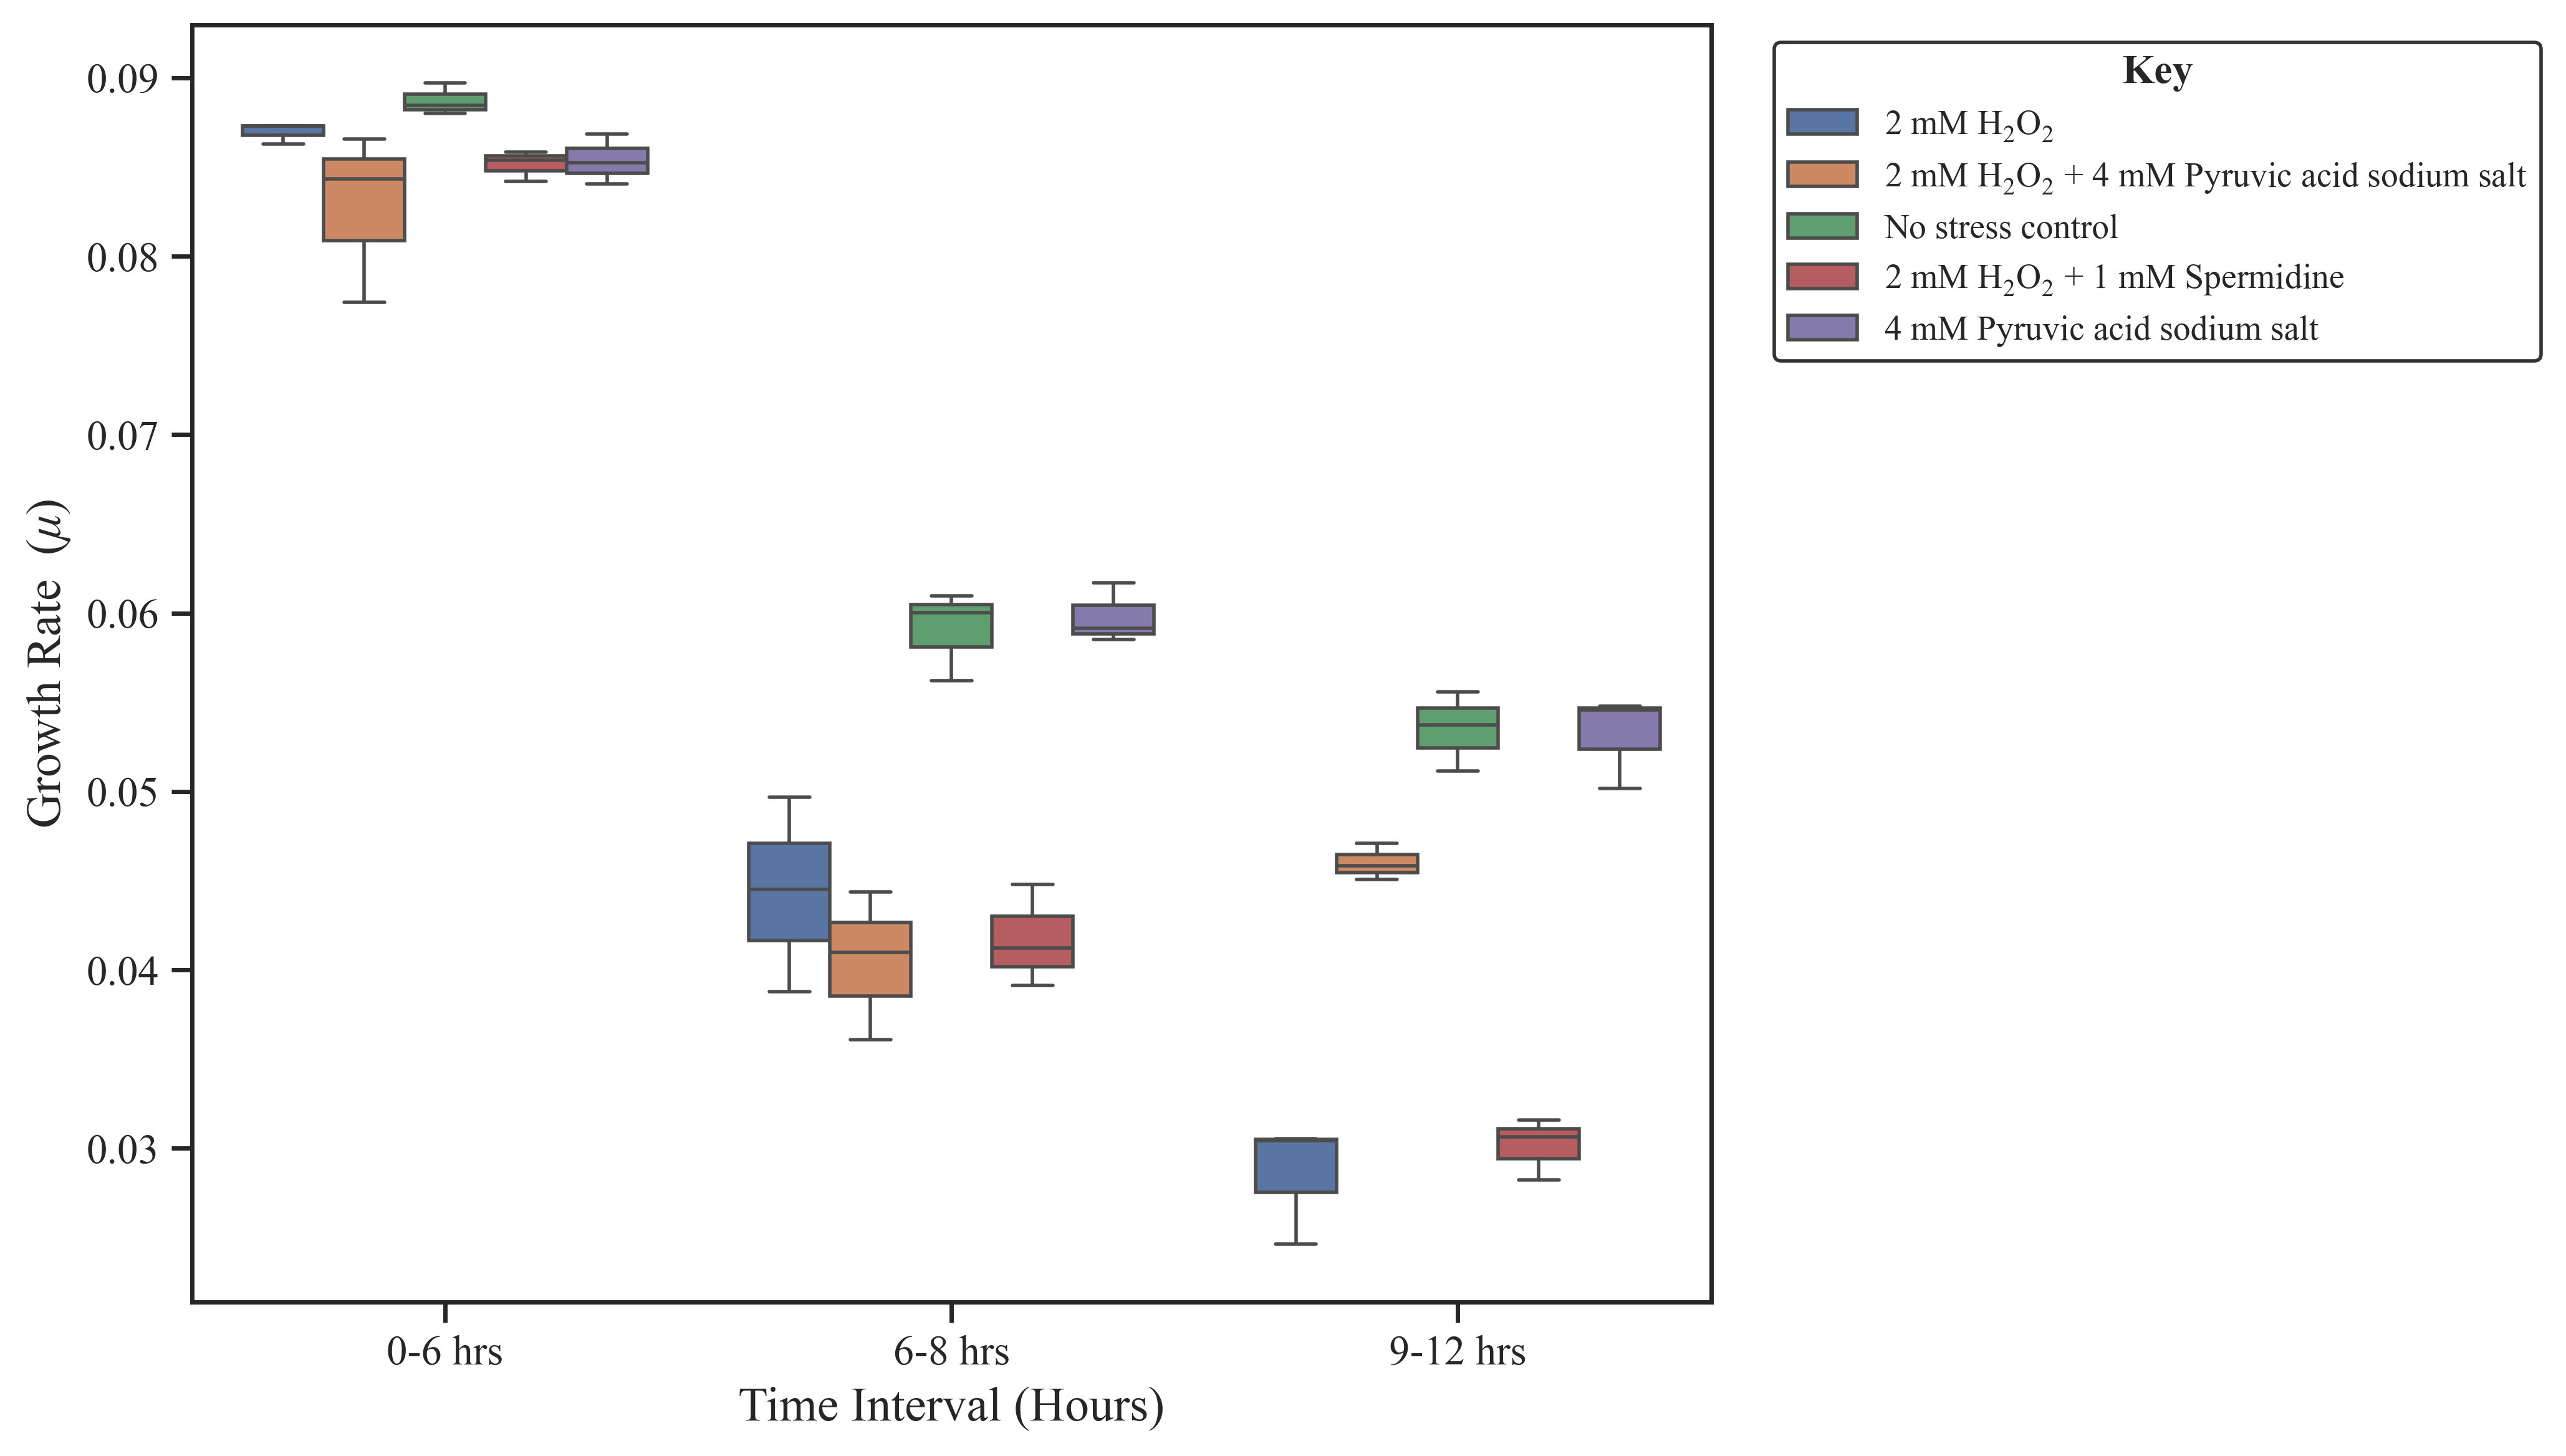

In [497]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---

if 'Main_Sample' not in interval_rate.columns and 'Replicate_ID' in interval_rate.columns:
    interval_rate['Main_Sample'] = interval_rate['Replicate_ID'].str[:-1]
elif 'Main_Sample' not in interval_rate.columns and 'Sample' in interval_rate.columns:
     # Fallback if the column is named 'Sample' (e.g., A1, B1)
    interval_rate['Main_Sample'] = interval_rate['Sample'].str[:-1]

# Define the order of main groups 
main_sample_order = sorted(interval_rate['Main_Sample'].unique())



plt.figure(figsize=(10, 6))

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")


ax = sns.boxplot(
    data=interval_rate,
    x="Time_Interval",
    y="Growth_Rate",
    hue="Main_Sample",  # Groups the triplicates
    hue_order=main_sample_order
)


handles, labels = ax.get_legend_handles_labels()

# These labels must align with the order of 'main_sample_order' (A, B, C, D, E)
new_labels = [
    '2 mM H$_2$O$_2$',
    '2 mM H$_2$O$_2$ + 4 mM Pyruvic acid sodium salt',
    'No stress control',
    '2 mM H$_2$O$_2$ + 1 mM Spermidine',
    '4 mM Pyruvic acid sodium salt'             # Corresponds to E
]

# Set the custom legend
legend=ax.legend(
    handles,
    new_labels,
    loc='upper left',
    title='Key',
    bbox_to_anchor=(1.03, 1),
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    edgecolor='black'
)
# --- LEGEND FONT CUSTOMIZATION START ---
# 1. Customize the font for the Legend Title
# Access the title object using .get_title()
plt.setp(legend.get_title(), fontfamily='Times New Roman', fontweight='bold') 

# 2. Customize the font for all Legend Entries (labels)
# Iterate through the list of text objects using .get_texts()
for text in legend.get_texts():
    text.set_fontfamily('Times New Roman')
# --- LEGEND FONT CUSTOMIZATION END ---

plt.xlabel('Time Interval (Hours)', size=14,fontfamily='Times New Roman')
plt.ylabel('Growth Rate  ($\mu$)', size=14,fontfamily='Times New Roman')

ax.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
ax.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')

plt.tight_layout(rect=[0, 0, 1.05, 1]) # Adjust layout to fit legend
plt.savefig('Growth_rate_boxplot_specific_intervals', dpi=400,bbox_inches='tight')
plt.show() 

<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
C:\Users\damia\AppData\Local\Temp\ipykernel_34496\2884195928.py:65: SyntaxWarning: invalid escape sequence '\m'
  g.set_axis_labels('Time Interval (Hours)', 'Growth Rate  ($\mu$)')


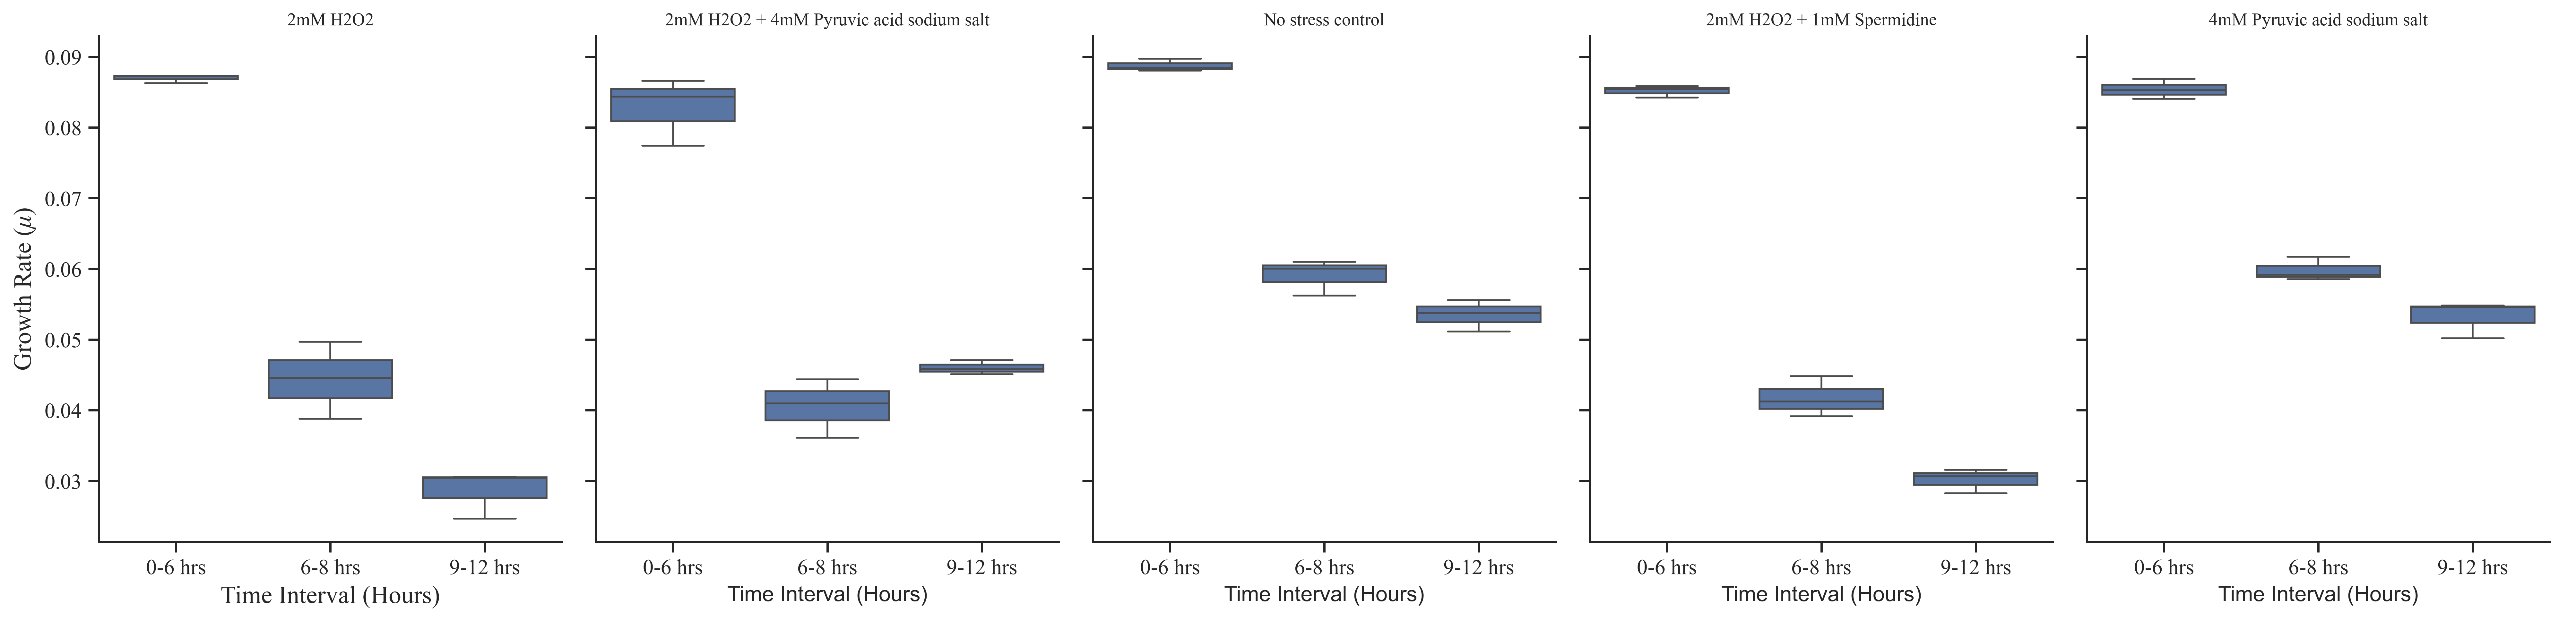

In [568]:
# --- FONT CUSTOMIZATION START ---
# 1. Set the font family to 'serif'
plt.rcParams['font.family'] = 'serif'

# 2. Specify Times New Roman as the preferred serif font
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Sans']

# 3. Ensure mathematical text is also rendered in Times New Roman.
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# --- FONT CUSTOMIZATION END ---


#Create a column to group triplicates
# This ensures A1, A2, A3 are all grouped under 'A' for the plot.
if 'Replicate_ID' in interval_rate.columns:
    interval_rate['Main_Sample'] = interval_rate['Replicate_ID'].str[:-1]
elif 'Sample' in interval_rate.columns:
    interval_rate['Main_Sample'] = interval_rate['Sample'].str[:-1]
else:
    print("Error: Could not find 'Replicate_ID' or 'Sample' column for grouping.")

# Define the order of your main groups for consistent column arrangement
main_sample_order = sorted(interval_rate['Main_Sample'].unique())

# Define the descriptive titles for the columns
column_titles = {
    'A': '2mM H2O2',
    'B': '2mM H2O2 + 4mM Pyruvic acid sodium salt',
    'C': 'No stress control',
    'D': '2mM H2O2 + 1mM Spermidine',
    'E': '4mM Pyruvic acid sodium salt'
}

#using sns.catplot with 'col' 

sns.set()
sns.set_theme(style='white')
sns.set_style("ticks")

# Use 'col' to separate the data into distinct columns (subplots) by Main_Sample
g = sns.catplot(
    data=interval_rate,
    kind="box",
    x="Time_Interval",
    y="Growth_Rate",
    col="Main_Sample",    
    col_order=main_sample_order, # Ensure order is A, B, C, D, E
    
    # Figure size settings for a multi-panel plot
    height=5,
    aspect=0.8, # Makes each subplot narrower
)



# Set descriptive titles for each column using the dictionary mapping
g.set_titles(col_template="{col_name}: {col_name}") # Temporary titles for mapping
for ax, title_key in zip(g.axes.flat, main_sample_order):
    ax.set_title(column_titles.get(title_key, title_key), fontsize=10,fontfamily='Times New Roman')

# Custom axis labels
g.set_axis_labels('Time Interval (Hours)', 'Growth Rate  ($\mu$)')

# Remove the redundant X-axis label from the inner plots
g.set_xlabels('Time Interval (Hours)')
# Apply font to the main Y-axis label
g.fig.axes[0].set_ylabel(r'Growth Rate ($\mu$)', fontname='Times New Roman', size=14)

# Apply font to the main X-axis label
g.fig.axes[0].set_xlabel('Time Interval (Hours)', fontname='Times New Roman', size=14)
g.tick_params(axis='y', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
g.tick_params(axis='x', labelsize=TICK_LABEL_FONTSIZE, labelfontfamily='Times New Roman')
plt.tight_layout()
plt.savefig('Growth_rate_catplot_specific_intervals', dpi=400,bbox_inches='tight')
plt.show()

clean and group the growth rate data by main sample (A, B, C, etc.), and then run a Pairwise Tukey HSD test separately for three specific time intervals (0-5 hrs, 6-8 hrs, 9-12 hrs) to identify which pairs of sample groups have statistically significant differences in their mean growth rate.: 

In [500]:
df = interval_rate
SAMPLE_COLUMN = 'Replicate_ID'
MAIN_SAMPLE_COLUMN = 'Main_Sample' # The column with grouped samples (A, B, C, etc.)
TIME_COLUMN = 'Time_Interval'

# --- STEP 1: Ensure the Main_Sample column is present (Grouping Triplicates) ---
# This ensures A1, A2, A3 are pooled into 'A', 'B', etc.
if MAIN_SAMPLE_COLUMN not in df.columns:
    try:
        df[MAIN_SAMPLE_COLUMN] = df[SAMPLE_COLUMN].str[:-1]
    except KeyError:
        print(f"Error: Column '{SAMPLE_COLUMN}' not found. Please check your DataFrame columns.")
        # If necessary, exit or handle error appropriately here.

# --- Define the specific time intervals you want to analyze ---
target_intervals = ['0-6 hrs', '6-8 hrs', '9-12 hrs']

# Dictionary to store Tukey's HSD results summaries
tukey_results_sample_comparison = {}

# --- STEP 2: ADJUST THE ANALYSIS LOOP AND GROUPING ---

# Perform Tukey's HSD by looping through EACH TIME INTERVAL
for interval in target_intervals:
    # 1. Filter the data for the current TIME INTERVAL
    interval_data = df[df[TIME_COLUMN] == interval].copy()

    # Crucial check: Ensure there is enough data for the test (N > 2 groups)
    unique_samples_count = len(interval_data[MAIN_SAMPLE_COLUMN].unique())
    if unique_samples_count < 2 or len(interval_data) < 6:
        print(f"\n--- Skipping Tukey's HSD for interval {interval} ---")
        print("Not enough unique samples or total data points to perform test.")
        continue
    
    print(f"\n--- Running Tukey's HSD for {interval}: Comparing Samples ---")
    
    # Perform Tukey's HSD test
    try:
        # CRITICAL CHANGE: 'groups' is now the MAIN_SAMPLE_COLUMN
        # This compares Sample A vs B vs C, etc., for the current interval.
        tukey_hsd = pairwise_tukeyhsd(
            endog=interval_data['Growth_Rate'],
            groups=interval_data[MAIN_SAMPLE_COLUMN], # Groups being compared are the samples
            alpha=0.05 
        )
        
        # Store and print the result summary table
        result_text = tukey_hsd.summary().as_text()
        tukey_results_sample_comparison[interval] = result_text
        print(result_text)
        
    except Exception as e:
        error_message = f"Error during Tukey HSD for interval {interval}: {e}"
        tukey_results_sample_comparison[interval] = error_message
        print(error_message)

# Optional: Save all results into a text file
output_filename = 'tukey_hsd_sample_vs_sample_comparison_by_interval.txt'
with open(output_filename, 'w') as f:
    f.write("Tukey's HSD Post-Hoc Analysis: Sample vs. Sample Comparison within Time Intervals\n\n")
    for interval, result in tukey_results_sample_comparison.items():
        f.write(f"\n-----------------------------------------------\n")
        f.write(f"Tukey's HSD Post-Hoc Test for {interval}\n")
        f.write("-----------------------------------------------\n")
        f.write(result)

print(f"\nAll Tukey's HSD results summaries have been saved to {output_filename}")


--- Running Tukey's HSD for 0-6 hrs: Comparing Samples ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -0.0042 0.2487 -0.0104  0.002  False
     A      C   0.0018 0.8765 -0.0044  0.008  False
     A      D  -0.0018 0.8661  -0.008 0.0044  False
     A      E  -0.0016 0.9141 -0.0078 0.0046  False
     B      C   0.0059 0.0619 -0.0003 0.0122  False
     B      D   0.0024  0.722 -0.0038 0.0086  False
     B      E   0.0026 0.6505 -0.0036 0.0088  False
     C      D  -0.0036  0.377 -0.0098 0.0026  False
     C      E  -0.0033 0.4391 -0.0095 0.0029  False
     D      E   0.0002 0.9999  -0.006 0.0065  False
---------------------------------------------------

--- Running Tukey's HSD for 6-8 hrs: Comparing Samples ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------

Replace Sample ID with Treatment descriptions

In [502]:

# CONSTANTS AND MAPPING 
SAMPLE_COLUMN = 'Replicate_ID'
MAIN_SAMPLE_COLUMN = 'Main_Sample' # The column with grouped samples (A, B, C, etc.)
TIME_COLUMN = 'Time_Interval'
VALUE_COLUMN = 'Growth_Rate'
output_filename = 'tukey_hsd_descriptive_comparison_by_interval.txt'

# Define the specific time intervals 
target_intervals = ['0-6 hrs', '6-8 hrs', '9-12 hrs']

# CRITICAL CHANGE: Group Mapping Dictionary
GROUP_MAPPING = {
    'A': '2mM Hydrogen Peroxide',
    'B': '2mM Hydrogen Peroxide + 4mM Pyruvic acid sodium salt',
    'C': 'No Stress Control',
    'D': '2mM Hydrogen Peroxide + 1mM Spermidine',
    'E': '4mM Pyruvic acid sodium salt'
}

df = interval_rate

# --- STEP 1: Ensure the Main_Sample column is present (Grouping Triplicates) ---
# This ensures A1, A2, A3 are pooled into 'A', 'B', etc.
if MAIN_SAMPLE_COLUMN not in df.columns:
    try:
        df[MAIN_SAMPLE_COLUMN] = df[SAMPLE_COLUMN].str[:-1]
    except KeyError:
        print(f"Error: Column '{SAMPLE_COLUMN}' not found. Please check your DataFrame columns.")
        # If necessary, exit or handle error appropriately here.

# Dictionary to store Tukey's HSD results summaries
tukey_results_sample_comparison = {}

# --- STEP 2: ADJUST THE ANALYSIS LOOP AND GROUPING TO USE DESCRIPTIVE NAMES ---

# Perform Tukey's HSD by looping through EACH TIME INTERVAL
for interval in target_intervals:
    # 1. Filter the data for the current TIME INTERVAL
    interval_data = df[df[TIME_COLUMN] == interval].copy()

    # CRITICAL ADDITION: Map the short sample names to their descriptive names
    # This creates a new column used for grouping in the statistical test output
    interval_data['Descriptive_Sample'] = interval_data[MAIN_SAMPLE_COLUMN].map(GROUP_MAPPING)


    # Crucial check: Ensure there is enough data for the test (N > 2 groups)
    unique_samples_count = len(interval_data['Descriptive_Sample'].unique())
    if unique_samples_count < 2 or len(interval_data) < 6:
        print(f"\n--- Skipping Tukey's HSD for interval {interval} ---")
        print("Not enough unique samples or total data points to perform test.")
        continue
    
    print(f"\n--- Running Tukey's HSD for {interval}: Comparing Samples ---")
    
    # Perform Tukey's HSD test
    try:
        # CRITICAL CHANGE: 'groups' is now the 'Descriptive_Sample' column
        # This uses the full, descriptive names in the results table.
        tukey_hsd = pairwise_tukeyhsd(
            endog=interval_data[VALUE_COLUMN],
            groups=interval_data['Descriptive_Sample'], # Groups being compared are the descriptive names
            alpha=0.05 
        )
        
        # Store and print the result summary table
        result_text = tukey_hsd.summary().as_text()
        tukey_results_sample_comparison[interval] = result_text
        print(result_text)
        
    except Exception as e:
        error_message = f"Error during Tukey HSD for interval {interval}: {e}"
        tukey_results_sample_comparison[interval] = error_message
        print(error_message)

# Optional: Save all results into a text file
with open(output_filename, 'w') as f:
    f.write("Tukey's HSD Post-Hoc Analysis: Descriptive Group Comparison within Time Intervals\n\n")
    for interval, result in tukey_results_sample_comparison.items():
        f.write(f"\n-----------------------------------------------\n")
        f.write(f"Tukey's HSD Post-Hoc Test for {interval}\n")
        f.write("-----------------------------------------------\n")
        f.write(result)

print(f"\nAll Tukey's HSD results summaries have been saved to {output_filename}")


--- Running Tukey's HSD for 0-6 hrs: Comparing Samples ---
                                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                                              
                       group1                                               group2                        meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------------------------------------------------
                               2mM Hydrogen Peroxide               2mM Hydrogen Peroxide + 1mM Spermidine  -0.0018 0.8661  -0.008 0.0044  False
                               2mM Hydrogen Peroxide 2mM Hydrogen Peroxide + 4mM Pyruvic acid sodium salt  -0.0042 0.2487 -0.0104  0.002  False
                               2mM Hydrogen Peroxide                         4mM Pyruvic acid sodium salt  -0.0016 0.9141 -0.0078 0.0046  False
                               2mM Hydrogen Peroxide                        

ANOVA Prior to Turkeys HSD test

In [504]:
df = interval_rate


# --- ANOVA SETUP ---
MAIN_SAMPLE_COLUMN = 'Main_Sample' # The column with grouped samples (A, B, C, etc.)
SAMPLE_COLUMN = 'Replicate_ID'
TIME_COLUMN = 'Time_Interval'
GROWTH_RATE_COLUMN = 'Growth_Rate'

# 1. Create the aggregated 'Main_Sample' column (same logic as in your Tukey code)
if MAIN_SAMPLE_COLUMN not in df.columns:
    try:
        # Assuming the structure is SampleLetter + ReplicateNumber (e.g., A1 -> A)
        df[MAIN_SAMPLE_COLUMN] = df[SAMPLE_COLUMN].astype(str).str[:-1]
    except KeyError as e:
        print(f"Error creating {MAIN_SAMPLE_COLUMN}: {e}")
        # Proceed with error handling if necessary

# 2. Define the ANOVA Formula
# Formula: Response_Variable ~ Factor1 * Factor2
# C() tells statsmodels that the variable should be treated as a categorical factor.
# The * symbol includes the main effects (Main_Sample and Time_Interval) AND their interaction.
formula = f'{GROWTH_RATE_COLUMN} ~ C({MAIN_SAMPLE_COLUMN}) * C({TIME_COLUMN})'

print("--- Two-Way Factorial ANOVA Results (Sample x Time) ---")

# 3. Fit the OLS model
try:
    model = ols(formula, data=df).fit()

    # 4. Generate the ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2) # Type 2 is generally preferred for unbalanced designs

    print(anova_table)

    # 5. Interpretation Guidance
    print("\n--- Interpretation ---")
    if anova_table.loc[f'C({MAIN_SAMPLE_COLUMN})', 'PR(>F)'] < 0.05:
        print(f"1. Significant Main Effect of Sample (p < 0.05): There is an overall difference in growth rate among the treatment samples.")
    else:
        print(f"1. Non-Significant Main Effect of Sample (p >= 0.05): No overall difference in growth rate among the treatment samples.")

    if anova_table.loc[f'C({TIME_COLUMN})', 'PR(>F)'] < 0.05:
        print(f"2. Significant Main Effect of Time Interval (p < 0.05): Growth rate changes significantly across the measured time intervals.")
    else:
        print(f"2. Non-Significant Main Effect of Time Interval (p >= 0.05): Growth rate does not significantly change across the time intervals.")

    interaction_p_value = anova_table.loc[f'C({MAIN_SAMPLE_COLUMN}):C({TIME_COLUMN})', 'PR(>F)']
    if interaction_p_value < 0.05:
        print(f"3. Significant Interaction (p = {interaction_p_value:.3f}): The effect of the Sample treatment depends on the Time Interval. This confirms that running post-hoc tests within each time interval (as you did with Tukey's) is the correct approach.")
    elif anova_table.loc[f'C({MAIN_SAMPLE_COLUMN})', 'PR(>F)'] < 0.05:
         print(f"3. Non-Significant Interaction (p >= 0.05): You should focus your post-hoc tests on the significant main effect(s). Since the main effect of Sample is significant, you would run Tukey's HSD across all samples, pooling the time data.")
    else:
        print(f"3. Non-Significant Interaction (p >= 0.05). Since neither main effect nor the interaction is significant, further post-hoc tests (like Tukey's) are not statistically justified.")

except Exception as e:
    print(f"\nAn error occurred during ANOVA calculation: {e}")
    print("Please ensure your data (df) is correctly loaded and the columns contain valid numerical and categorical data.")

--- Two-Way Factorial ANOVA Results (Sample x Time) ---
                                   sum_sq    df            F        PR(>F)
C(Main_Sample)                   0.001799   4.0    57.049987  1.353660e-13
C(Time_Interval)                 0.016443   2.0  1043.167387  1.875225e-28
C(Main_Sample):C(Time_Interval)  0.001137   8.0    18.032409  1.665059e-09
Residual                         0.000236  30.0          NaN           NaN

--- Interpretation ---
1. Significant Main Effect of Sample (p < 0.05): There is an overall difference in growth rate among the treatment samples.
2. Significant Main Effect of Time Interval (p < 0.05): Growth rate changes significantly across the measured time intervals.
3. Significant Interaction (p = 0.000): The effect of the Sample treatment depends on the Time Interval. This confirms that running post-hoc tests within each time interval (as you did with Tukey's) is the correct approach.


In [505]:
long_od=pd.read_excel(r"C:\Users\damia\Documents\Honours_2025_GENETICS\Research project\220013700_GROWTH_CURVE_DATA_30_10_2025.xlsx",sheet_name="Sheet4")
long_od.head(10)

Time             Sample     OD    LOG OD
0     0  No stress control  0.150 -0.823909
1     2  No stress control  0.223 -0.651695
2     3  No stress control  0.301 -0.521434
3     5  No stress control  0.428 -0.368556
4     6  No stress control  0.509 -0.293282
5     7  No stress control  0.567 -0.246417
6     8  No stress control  0.671 -0.173277
7     9  No stress control  0.754 -0.122629
8    10  No stress control  0.859 -0.066007
9    11  No stress control  0.962 -0.016825

In [506]:
filename = "long_od.csv"
filepath = os.path.join('.', filename)
long_od.to_csv(filepath, index=False)


ANOVA prior to Turkeys HSD for LOG OD 

In [508]:
RAW_DATA_FILE = "long_od.csv"

# Columns from the raw data
TIME_COL = 'Time'
SAMPLE_COL = 'Sample'
OD_COL = 'OD' 

# Target time intervals for MEAN OD calculation: (start, end, label)
# We will calculate the mean OD for all data points found within these time windows.
TIME_INTERVALS = [
    (0, 6, '0-6 hrs'),
    (6, 8, '6-8 hrs'),
    (9, 12, '9-12 hrs') 
]

# --- 1. Data Loading and Pre-processing ---

print(f"Loading data from {RAW_DATA_FILE}...")
try:
    # Read the raw data
    raw_df = pd.read_csv(RAW_DATA_FILE)
    
    # Identify unique replicates: A heuristic approach for stacked long format data
    # Create a grouping ID based on when the 'Time' column resets (usually to 0)
    raw_df['Time_Reset'] = (raw_df[TIME_COL] == raw_df[TIME_COL].min()).cumsum()
    # Combine Sample name and Reset ID to get a unique Replicate ID
    raw_df['Replicate_ID'] = raw_df[SAMPLE_COL].astype(str) + '_R' + raw_df['Time_Reset'].astype(str)
    
    print(f"Identified {raw_df['Replicate_ID'].nunique()} unique replicates.")
    
except Exception as e:
    print(f"Error loading or processing raw data: {e}")
    exit()

# --- 2. Calculate Mean OD Value for Target Time Intervals ---

od_values = []
replicate_groups = raw_df.groupby('Replicate_ID')

for rep_id, rep_data in replicate_groups:
    
    # Extract the main sample name (the part before the last '_R')
    main_sample = rep_id.rsplit('_R', 1)[0]
    
    for start, end, label in TIME_INTERVALS:
        
        # Filter data for the specific interval: [start, end]
        # We use >= start and <= end to include all data points within the window.
        interval_data = rep_data[
            (rep_data[TIME_COL] >= start) & 
            (rep_data[TIME_COL] <= end)
        ].copy() # Use .copy() to avoid SettingWithCopyWarning
        
        # Check if we have data in this interval
        if len(interval_data) == 0:
            mean_od = np.nan
        else:
            # Calculate the MEAN OD within the interval
            mean_od = interval_data[OD_COL].mean()
        
        # Append the calculated Mean OD value
        od_values.append({
            'Mean_OD': mean_od,
            'Main_Sample': main_sample,
            'Time_Interval': label,
            'Replicate_ID': rep_id
        })

# Create the final DataFrame for ANOVA
anova_df = pd.DataFrame(od_values).dropna(subset=['Mean_OD'])

print(f"ANOVA DataFrame created with {len(anova_df)} rows of mean OD values per interval.")

# --- 3. Perform Two-Way Factorial ANOVA ---

# Define the ANOVA Formula: Mean_OD ~ Main_Sample * Time_Interval
formula = 'Mean_OD ~ C(Main_Sample) * C(Time_Interval)'

print("\n" + "="*50)
print("--- Two-Way Factorial ANOVA Results (Sample x Time Interval Mean OD) ---")
print("="*50)

try:
    model = ols(formula, data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2) 
    
    print(anova_table)

    # --- 4. Interpretation ---
    print("\n" + "-"*50)
    print("--- Interpretation ---")
    print("-"*50)
    
    # Get P-values
    p_sample = anova_table.loc['C(Main_Sample)', 'PR(>F)']
    p_time = anova_table.loc['C(Time_Interval)', 'PR(>F)']
    p_interaction = anova_table.loc['C(Main_Sample):C(Time_Interval)', 'PR(>F)']

    # 1. Main Effect of Sample
    if p_sample < 0.05:
        print(f"1. Main Effect of Sample (P={p_sample:.4f}): Significant. Treatments result in different overall mean OD values.")
    else:
        print(f"1. Main Effect of Sample (P={p_sample:.4f}): Not Significant. No overall difference in mean OD among treatments.")

    # 2. Main Effect of Time Interval
    if p_time < 0.05:
        print(f"2. Main Effect of Time Interval (P={p_time:.4f}): Significant. Mean OD significantly increases/changes across the measured time intervals.")
    else:
        print(f"2. Main Effect of Time Interval (P={p_time:.4f}): Not Significant. Mean OD is consistent across time intervals.")
    
    # 3. Interaction Effect
    if p_interaction < 0.05:
        print(f"3. Interaction Effect (P={p_interaction:.4f}): Highly Significant.")
        print("This confirms your approach: The effect of a treatment on the mean OD depends on the time interval, so running Tukey's HSD comparing samples separately within each interval (0-6h, 6-8h, 9-12h) is the correct next step.")
        #[Image of interaction plot for two-way anova]
    else:
        print(f"3. Interaction Effect (P={p_interaction:.4f}): Not Significant.")
        print("If this were not significant, you would run Tukey's HSD on the significant main effect(s) by pooling the data across the Time Interval factor.")
        
except Exception as e:
    print(f"\nAn error occurred during ANOVA calculation: {e}")
    print("Please ensure your data (anova_df) contains enough variation and non-NaN data for the model to run.")

Loading data from long_od.csv...
Identified 15 unique replicates.
ANOVA DataFrame created with 45 rows of mean OD values per interval.

--- Two-Way Factorial ANOVA Results (Sample x Time Interval Mean OD) ---
                                   sum_sq    df            F        PR(>F)
C(Main_Sample)                   0.092370   4.0    67.560914  1.432569e-14
C(Time_Interval)                 1.568710   2.0  2294.752458  1.541300e-33
C(Main_Sample):C(Time_Interval)  0.115995   8.0    42.420183  2.841722e-14
Residual                         0.010254  30.0          NaN           NaN

--------------------------------------------------
--- Interpretation ---
--------------------------------------------------
1. Main Effect of Sample (P=0.0000): Significant. Treatments result in different overall mean OD values.
2. Main Effect of Time Interval (P=0.0000): Significant. Mean OD significantly increases/changes across the measured time intervals.
3. Interaction Effect (P=0.0000): Highly Significant

TURKEYS HSD FOR OD INTERVALS

In [510]:
RAW_DATA_FILE = "long_od.csv"

# Columns from the raw data
TIME_COL = 'Time'
SAMPLE_COL = 'Sample'
OD_COL = 'OD' 

# Target time intervals for MEAN OD calculation: (start, end, label)
# We will calculate the mean OD for all data points found within these time windows.
TIME_INTERVALS = [
    (0, 6, '0-6 hrs'),
    (6, 8, '6-8 hrs'),
    (9, 12, '9-12 hrs') 
]

# --- 1. Data Loading and Pre-processing ---

print(f"Loading data from {RAW_DATA_FILE}...")
try:
    # Read the raw data
    raw_df = pd.read_csv(RAW_DATA_FILE)
    
    # Identify unique replicates: A heuristic approach for stacked long format data
    # Create a grouping ID based on when the 'Time' column resets (usually to 0)
    raw_df['Time_Reset'] = (raw_df[TIME_COL] == raw_df[TIME_COL].min()).cumsum()
    # Combine Sample name and Reset ID to get a unique Replicate ID
    raw_df['Replicate_ID'] = raw_df[SAMPLE_COL].astype(str) + '_R' + raw_df['Time_Reset'].astype(str)
    
    print(f"Identified {raw_df['Replicate_ID'].nunique()} unique replicates.")
    
except Exception as e:
    print(f"Error loading or processing raw data: {e}")
    exit()

# --- 2. Calculate Mean OD Value for Target Time Intervals ---

od_values = []
replicate_groups = raw_df.groupby('Replicate_ID')

for rep_id, rep_data in replicate_groups:
    
    # Extract the main sample name (the part before the last '_R')
    main_sample = rep_id.rsplit('_R', 1)[0]
    
    for start, end, label in TIME_INTERVALS:
        
        # Filter data for the specific interval: [start, end]
        # We use >= start and <= end to include all data points within the window.
        interval_data = rep_data[
            (rep_data[TIME_COL] >= start) & 
            (rep_data[TIME_COL] <= end)
        ].copy() # Use .copy() to avoid SettingWithCopyWarning
        
        # Check if we have data in this interval
        if len(interval_data) == 0:
            mean_od = np.nan
        else:
            # Calculate the MEAN OD within the interval
            mean_od = interval_data[OD_COL].mean()
        
        # Append the calculated Mean OD value
        od_values.append({
            'Mean_OD': mean_od,
            'Main_Sample': main_sample,
            'Time_Interval': label,
            'Replicate_ID': rep_id
        })

# Create the final DataFrame for ANOVA
anova_df = pd.DataFrame(od_values).dropna(subset=['Mean_OD'])

print(f"ANOVA DataFrame created with {len(anova_df)} rows of mean OD values per interval.")

# --- 3. Perform Two-Way Factorial ANOVA (as previously requested) ---

# Define the ANOVA Formula: Mean_OD ~ Main_Sample * Time_Interval
formula = 'Mean_OD ~ C(Main_Sample) * C(Time_Interval)'

print("\n" + "="*50)
print("--- Two-Way Factorial ANOVA Results (Sample x Time Interval Mean OD) ---")
print("="*50)

try:
    model = ols(formula, data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2) 
    print(anova_table)
    # Interpretation code removed for brevity in this update
    
except Exception as e:
    print(f"\nAn error occurred during ANOVA calculation: {e}")
    print("Please ensure your data (anova_df) contains enough variation and non-NaN data for the model to run.")


# --- 4. Perform Tukey's HSD Post-Hoc: Comparing Time Intervals within EACH Sample ---

print("\n" + "="*70)
print("--- Tukey's HSD Post-Hoc: Comparing Time Intervals within EACH Sample ---")
print("="*70)

# Get the list of unique samples to loop through
unique_samples = anova_df['Main_Sample'].unique()

for sample in unique_samples:
    
    # Filter the DataFrame to include only the current sample's data
    sample_data = anova_df[anova_df['Main_Sample'] == sample].copy()
    
    if len(sample_data['Time_Interval'].unique()) < 2:
        print(f"\n--- Skipping Tukey's HSD for Sample {sample} ---")
        print("Not enough unique time intervals to perform pairwise comparison.")
        continue

    print(f"\n*** Tukey's HSD for Sample: {sample} (Comparing Time Intervals) ***")
    
    try:
        # Perform Tukey's HSD test
        # endog: The dependent variable (Mean OD)
        # groups: The independent variable whose levels are being compared (Time Intervals)
        tukey_hsd = pairwise_tukeyhsd(
            endog=sample_data['Mean_OD'],
            groups=sample_data['Time_Interval'], 
            alpha=0.05
        )
        
        # Print the result summary table
        print(tukey_hsd.summary())
        
    except Exception as e:
        print(f"Error during Tukey HSD for Sample {sample}: {e}")

Loading data from long_od.csv...
Identified 15 unique replicates.
ANOVA DataFrame created with 45 rows of mean OD values per interval.

--- Two-Way Factorial ANOVA Results (Sample x Time Interval Mean OD) ---
                                   sum_sq    df            F        PR(>F)
C(Main_Sample)                   0.092370   4.0    67.560914  1.432569e-14
C(Time_Interval)                 1.568710   2.0  2294.752458  1.541300e-33
C(Main_Sample):C(Time_Interval)  0.115995   8.0    42.420183  2.841722e-14
Residual                         0.010254  30.0          NaN           NaN

--- Tukey's HSD Post-Hoc: Comparing Time Intervals within EACH Sample ---

*** Tukey's HSD for Sample: 2 mM Hydrogen Peroxide + 1  mM Spermidine (Comparing Time Intervals) ***
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2  meandiff p-adj lower  upper  reject
----------------------------------------------------
0-6 hrs  6-8 hrs   0.2301   0.0 0.2243  0.236   True
0-6 hrs 9-12 hrs   0.3446  

In [511]:
RAW_DATA_FILE = "long_od.csv"
OUTPUT_FILE = "long_od_mean.csv" # The file name requested by the user

# Columns from the raw data
TIME_COL = 'Time'
SAMPLE_COL = 'Sample'
OD_COL = 'OD' 

# Target time intervals for MEAN OD calculation: (start, end, label)
# These are the intervals you specified: [0, 6], [6, 8], [9, 12]
TIME_INTERVALS = [
    (0, 6, '0-6 hrs'),
    (6, 8, '6-8 hrs'),
    (9, 12, '9-12 hrs') 
]

# --- 1. Data Loading and Preparation ---

print(f"Loading data from {RAW_DATA_FILE}...")
try:
    # Read the raw data
    raw_df = pd.read_csv(RAW_DATA_FILE)
    
    # --- Critical Step: Identify Unique Biological Replicates ---
    # We assume a new replicate starts when the Time column resets to its minimum value (usually 0).
    raw_df['Time_Reset'] = (raw_df[TIME_COL] == raw_df[TIME_COL].min()).cumsum()
    # Create a unique ID for each replicate (e.g., "Control_R1", "Control_R2")
    raw_df['Replicate_ID'] = raw_df[SAMPLE_COL].astype(str) + '_R' + raw_df['Time_Reset'].astype(str)
    
    print(f"Identified {raw_df['Replicate_ID'].nunique()} unique replicates.")
    
except Exception as e:
    print(f"Error loading or processing raw data: {e}")
    exit()

# --- 2. Calculate Mean OD Value for Target Time Intervals ---

# This list will store the result for each replicate and each interval
od_values_list = []
replicate_groups = raw_df.groupby('Replicate_ID')

for rep_id, rep_data in replicate_groups:
    
    # Extract the main sample name (e.g., 'No stress control')
    main_sample = rep_id.rsplit('_R', 1)[0]
    
    for start, end, label in TIME_INTERVALS:
        
        # Filter the raw data to include only points within the current interval [start, end]
        interval_data = rep_data[
            (rep_data[TIME_COL] >= start) & 
            (rep_data[TIME_COL] <= end)
        ].copy()
        
        # Calculate the MEAN OD for the filtered data points
        if len(interval_data) > 0:
            mean_od = interval_data[OD_COL].mean()
        else:
            mean_od = np.nan # Use NaN if no data points fall in the window
        
        # Store the result
        od_values_list.append({
            'Main_Sample': main_sample,
            'Time_Interval': label,
            'Mean_OD': mean_od,
            'Replicate_ID': rep_id
        })

# Create the final result DataFrame and drop rows where Mean_OD could not be calculated
mean_od_df = pd.DataFrame(od_values_list)
final_df = mean_od_df.dropna(subset=['Mean_OD'])


final_df.to_csv(OUTPUT_FILE, index=False)

Loading data from long_od.csv...
Identified 15 unique replicates.


In [512]:
long_od_mean=pd.read_csv("long_od_mean.csv")
long_od_mean.head(10)

Main_Sample Time_Interval   Mean_OD  \
0          2 mM Hydrogen Peroxide + 1  mM Spermidine       0-6 hrs  0.310400   
1          2 mM Hydrogen Peroxide + 1  mM Spermidine       6-8 hrs  0.538333   
2          2 mM Hydrogen Peroxide + 1  mM Spermidine      9-12 hrs  0.651500   
3          2 mM Hydrogen Peroxide + 1  mM Spermidine       0-6 hrs  0.310600   
4          2 mM Hydrogen Peroxide + 1  mM Spermidine       6-8 hrs  0.540000   
5          2 mM Hydrogen Peroxide + 1  mM Spermidine      9-12 hrs  0.654500   
6          2 mM Hydrogen Peroxide + 1  mM Spermidine       0-6 hrs  0.309600   
7          2 mM Hydrogen Peroxide + 1  mM Spermidine       6-8 hrs  0.542667   
8          2 mM Hydrogen Peroxide + 1  mM Spermidine      9-12 hrs  0.658250   
9  2 mM Hydrogen Peroxide + 4 mM Pyruvic Sodium A...       0-6 hrs  0.280000   

                                        Replicate_ID  
0      2 mM Hydrogen Peroxide + 1  mM Spermidine_R10  
1      2 mM Hydrogen Peroxide + 1  mM Spermidine_R10  
2      2 mM Hydrogen Peroxide + 1  mM Spermidine_R10  
3      2 mM Hydrogen Peroxide + 1  mM Spermidine_R11  
4      2 mM Hydrogen Peroxide + 1  mM Spermidine_R11  
5      2 mM Hydrogen Peroxide + 1  mM Spermidine_R11  
6      2 mM Hydrogen Peroxide + 1  mM Spermidine_R12  
7      2 mM Hydrogen Peroxide + 1  mM Spermidine_R12  
8      2 mM Hydrogen Peroxide + 1  mM Spermidine_R12  
9  2 mM Hydrogen Peroxide + 4 mM Pyruvic Sodium A...

TURKEYS HSD AGAINST EACH OD SAMPLE PER INTERVAL AGAINST EACH SAMPLE

In [514]:
RAW_DATA_FILE = "long_od.csv"

# Columns from the raw data
TIME_COL = 'Time'
SAMPLE_COL = 'Sample'
OD_COL = 'OD' 

# Target time intervals for MEAN OD calculation: (start, end, label)
TIME_INTERVALS = [
    (0, 6, '0-6 hrs'),
    (6, 8, '6-8 hrs'),
    (9, 12, '9-12 hrs') 
]

# --- 1. Data Loading and Preparation ---

print(f"Loading data from {RAW_DATA_FILE}...")
try:
    # Read the raw data
    raw_df = pd.read_csv(RAW_DATA_FILE)
    
    # --- Identify Unique Biological Replicates ---
    # Create a grouping ID based on when the 'Time' column resets
    raw_df['Time_Reset'] = (raw_df[TIME_COL] == raw_df[TIME_COL].min()).cumsum()
    # Create a unique ID for each replicate (e.g., "Control_R1", "Control_R2")
    raw_df['Replicate_ID'] = raw_df[SAMPLE_COL].astype(str) + '_R' + raw_df['Time_Reset'].astype(str)
    
    print(f"Identified {raw_df['Replicate_ID'].nunique()} unique replicates.")
    
except Exception as e:
    print(f"Error loading or processing raw data: {e}")
    exit()

# --- 2. Calculate Mean OD Value for Target Time Intervals ---

od_values_list = []
replicate_groups = raw_df.groupby('Replicate_ID')

for rep_id, rep_data in replicate_groups:
    
    # Extract the main sample name
    main_sample = rep_id.rsplit('_R', 1)[0]
    
    for start, end, label in TIME_INTERVALS:
        
        # Filter the raw data to include only points within the current interval [start, end]
        interval_data = rep_data[
            (rep_data[TIME_COL] >= start) & 
            (rep_data[TIME_COL] <= end)
        ].copy()
        
        # Calculate the MEAN OD for the filtered data points
        mean_od = interval_data[OD_COL].mean() if len(interval_data) > 0 else np.nan
        
        # Store the result
        od_values_list.append({
            'Mean_OD': mean_od,
            'Main_Sample': main_sample,
            'Time_Interval': label,
            'Replicate_ID': rep_id
        })

# Create the final DataFrame for analysis, dropping any rows where mean OD couldn't be calculated
analysis_df = pd.DataFrame(od_values_list).dropna(subset=['Mean_OD'])

print(f"Analysis DataFrame created with {len(analysis_df)} rows of mean OD values per interval.")


# --- 3. Tukey's HSD Post-Hoc: Comparing Samples within EACH Time Interval ---

print("\n" + "="*80)
print("--- Tukey's HSD Post-Hoc: Comparing SAMPLES within EACH Time Interval ---")
print("Goal: Is the mean OD of Sample A significantly different from Sample B at a fixed time phase?")
print("="*80)

# Get the list of unique time intervals to loop through
unique_time_intervals = analysis_df['Time_Interval'].unique()

for interval in unique_time_intervals:
    
    # Filter the DataFrame to include only the current time interval's data
    interval_data = analysis_df[analysis_df['Time_Interval'] == interval].copy()
    
    # Ensure there are at least two samples to compare
    if len(interval_data['Main_Sample'].unique()) < 2:
        print(f"\n--- Skipping Tukey's HSD for Interval {interval} ---")
        print("Not enough unique samples to perform pairwise comparison.")
        continue

    print(f"\n*** Tukey's HSD for Time Interval: {interval} (Comparing All Samples) ***")
    
    try:
        # Perform Tukey's HSD test
        # endog: The dependent variable (Mean OD)
        # groups: The independent variable whose levels are being compared (Main_Sample)
        tukey_hsd = pairwise_tukeyhsd(
            endog=interval_data['Mean_OD'],
            groups=interval_data['Main_Sample'], 
            alpha=0.05 # Standard significance level
        )
        
        # Print the result summary table
        print(tukey_hsd.summary())
        
    except Exception as e:
        print(f"Error during Tukey HSD for Interval {interval}: {e}")

Loading data from long_od.csv...
Identified 15 unique replicates.
Analysis DataFrame created with 45 rows of mean OD values per interval.

--- Tukey's HSD Post-Hoc: Comparing SAMPLES within EACH Time Interval ---
Goal: Is the mean OD of Sample A significantly different from Sample B at a fixed time phase?

*** Tukey's HSD for Time Interval: 0-6 hrs (Comparing All Samples) ***
                                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                
                        group1                                                 group2                         meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------------------------------------------------------------------
                                2 mM Hydrogen Peroxide              2 mM Hydrogen Peroxide + 1  mM Spermidine  -0.0095 0.7513 -0.0354 0.0165  False
                             